<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

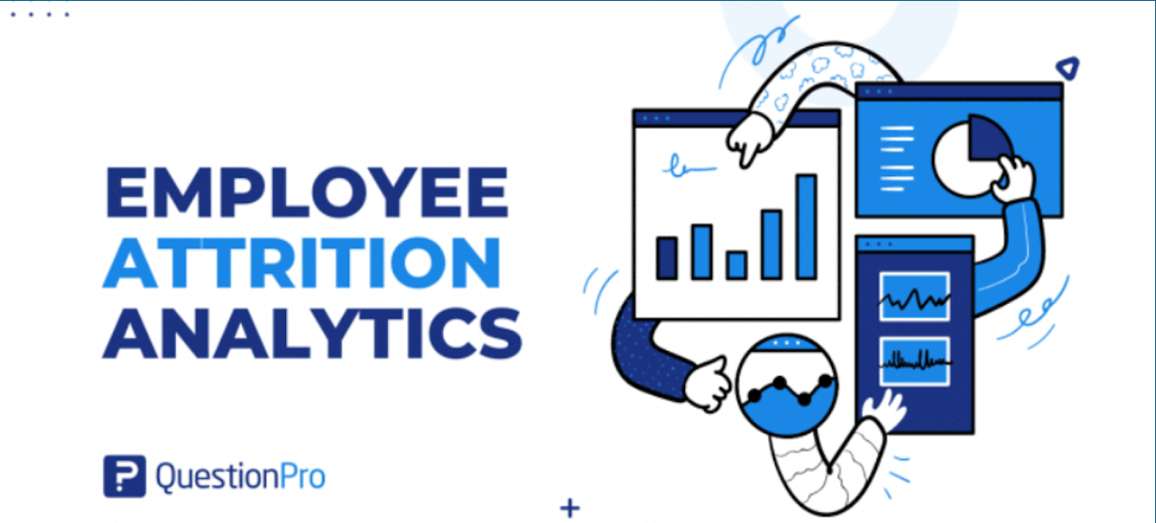

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">
    
# 📉 Employee Attrition Analysis - Understanding Workforce Reduction

## 📌 What is Employee Attrition?

**Attrition** is the gradual reduction in a company’s workforce that occurs when employees voluntarily resign, retire, or otherwise leave their positions — and **are not replaced**. While attrition can also apply to the loss of a customer base, this notebook focuses solely on **employee attrition**.

A reduction in staff due to attrition is often part of a **hiring freeze**, which is generally considered a **less disruptive** and more **cost-effective** approach to downsizing than layoffs.

---

## 🎯 Objective of This Notebook

In this notebook, we aim to:

- 🔍 **Analyze the dataset** comprehensively with respect to each feature.
- 📊 **Identify key trends and patterns** that may indicate why employees are leaving.
- 🧠 **Understand the underlying reasons** behind employee attrition.
- 🚩 **Determine the top factors** contributing to attrition and provide actionable insights.

---

Stay tuned as we uncover the story behind the data and explore strategies that could help reduce attrition in organizations. Let’s dive in! 👇

In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve
from sklearn.pipeline import Pipeline
import joblib
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

# 🧰 Importing Essential Python Libraries

To begin our analysis and modeling process, we import a range of powerful Python libraries that will assist in data manipulation, visualization, preprocessing, and machine learning.

### 📦 Data Manipulation
- **pandas**: For data loading, cleaning, and manipulation.
- **numpy**: For numerical operations and efficient array handling.

### 📊 Data Visualization
- **matplotlib & seaborn**: For creating static visualizations such as bar plots, heatmaps, and distributions.
- **plotly.express**: For building interactive and dynamic plots to explore insights more intuitively.

### 🤖 Machine Learning & Modeling
- **scikit-learn**: Core ML library used for:
  - Data preprocessing and scaling
  - Splitting the data into train/test sets
  - Training models like Logistic Regression, SVM, Decision Trees, and more
  - Model evaluation using metrics like accuracy, precision, recall, F1 score, and ROC-AUC

- **Ensemble Methods**: We include several ensemble algorithms to compare performance:
  - `RandomForestClassifier`, `GradientBoostingClassifier`, `BaggingClassifier`, `AdaBoostClassifier`, `ExtraTreesClassifier`

- **Advanced Boosting Libraries**:
  - `XGBClassifier` (XGBoost)
  - `CatBoostClassifier`
  - `LGBMClassifier` (LightGBM)

### ⚙️ Model Optimization & Pipeline
- **GridSearchCV & RandomizedSearchCV**: For hyperparameter tuning.
- **Pipeline**: To streamline the preprocessing and modeling steps.

### ⚖️ Handling Imbalanced Data
- **SMOTE (Synthetic Minority Over-sampling Technique)**: For addressing class imbalance in the target variable.

### 🧪 Evaluation Metrics
- `accuracy_score`, `precision_score`, `recall_score`, `f1_score`, `roc_auc_score`: To measure model performance.
- `confusion_matrix`, `roc_curve`, `precision_recall_curve`: For visual evaluation.

### 💾 Model Saving
- **joblib**: To save and load trained models efficiently.

---

> **Note**: For smoother output and better visual performance inside Jupyter environments (like Kaggle Notebooks), we use `%matplotlib inline` and suppress warnings using `warnings.filterwarnings('ignore')`.

With these tools in place, we are fully equipped to explore, visualize, and model our dataset effectively using both traditional and advanced machine learning techniques.


### Data Collection

In [12]:
df = pd.read_csv('/content/train.csv')

In [13]:
df.head()

Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

   ... Number of Dependents  Job Level Company Size Company Tenure  \
0  ...                    0        Mid       Medium             89   
1  ...                    3        Mid       Medium             21   
2  ...                    3        Mid       Medium             74   
3  ...                    2        Mid        Small             50   
4  ...                    0     Senior       Medium             68   

   Remote Work Leadership Opportunities Innovation Opportunities  \
0           No                       No                       No   
1           No                       No                       No   
2           No                       No                       No   
3          Yes                       No                       No   
4           No                       No                       No   

   Company Reputation Employee Recognition Attrition  
0           Excellent               Medium    Stayed  
1                Fair                  Low    Stayed  
2                Poor                  Low    Stayed  
3                Good               Medium    Stayed  
4                Fair               Medium    Stayed  

[5 rows x 24 columns]

In [14]:
# Display basic dataset information
print("Dataset Shape:", df.shape)
print("Columns in Dataset:", df.columns)

Dataset Shape: (59598, 24)
Columns in Dataset: Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')


<div style="border-radius:10px; border:#808080 solid; padding: 20px; background-color:#F5F5DC; font-size:100%; text-align:left">

# 📂 Dataset Overview

This dataset comprises a comprehensive set of features related to employee demographics, job characteristics, and workplace experiences, designed to uncover the underlying factors contributing to **employee attrition**. Below is a detailed explanation of each feature:

### 🧾 Feature Descriptions

- **Employee ID**: A unique identifier for each employee in the dataset.
- **Age**: The employee’s age (ranging from 18 to 60 years).
- **Gender**: Gender identity of the employee.
- **Years at Company**: Total number of years the employee has been with the company.
- **Monthly Income**: Employee's monthly salary (in USD).
- **Job Role**: The department or function of the employee (e.g., Finance, Healthcare, Technology, Education, Media).
- **Work-Life Balance**: Employee's self-reported balance between work and personal life — *Poor, Below Average, Good, Excellent*.
- **Job Satisfaction**: Satisfaction level with the current role — *Very Low, Low, Medium, High*.
- **Performance Rating**: Rating based on recent performance reviews — *Low, Below Average, Average, High*.
- **Number of Promotions**: Number of times the employee has been promoted within the organization.
- **Distance from Home**: Commute distance from the employee's residence to the workplace (in miles).
- **Education Level**: Highest educational qualification — *High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD*.
- **Marital Status**: Marital status of the employee — *Single, Married, Divorced*.
- **Job Level**: Hierarchical level of the position — *Entry, Mid, Senior*.
- **Company Size**: Size category of the organization — *Small, Medium, Large*.
- **Company Tenure**: Total experience of the employee in the industry.
- **Remote Work**: Indicates whether the employee works remotely — *Yes, No*.
- **Leadership Opportunities**: Whether the employee is offered leadership development — *Yes, No*.
- **Innovation Opportunities**: Indicates access to innovative or creative tasks — *Yes, No*.
- **Company Reputation**: Employee’s perception of the company’s public image — *Very Poor, Poor, Good, Excellent*.
- **Employee Recognition**: Level of appreciation and acknowledgment received — *Very Low, Low, Medium, High*.
- **Attrition**: Target variable indicating employee turnover — **0 = Stayed**, **1 = Left**.

---

### 🔍 Why This Matters

Understanding the composition and meaning of each feature provides a solid foundation for further analysis. By examining the relationships among these variables, we aim to identify critical indicators of attrition, derive actionable insights, and support data-driven decision-making in HR strategies.

</div>

### Data Exploration

#### Handling Missing Value

In [ ]:
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)



Missing Values:
 Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64


## 🔍 Missing Values Analysis

Before proceeding with data analysis and modeling, it's crucial to verify the presence of any missing values, as they can introduce bias or reduce the efficiency of machine learning algorithms.

The table below shows the number of missing values for each feature in the dataset:

| Feature                    | Missing Values |
|---------------------------|----------------|
| Employee ID               | 0              |
| Age                       | 0              |
| Gender                    | 0              |
| Years at Company          | 0              |
| Job Role                  | 0              |
| Monthly Income            | 0              |
| Work-Life Balance         | 0              |
| Job Satisfaction          | 0              |
| Performance Rating        | 0              |
| Number of Promotions      | 0              |
| Overtime                  | 0              |
| Distance from Home        | 0              |
| Education Level           | 0              |
| Marital Status            | 0              |
| Number of Dependents      | 0              |
| Job Level                 | 0              |
| Company Size              | 0              |
| Company Tenure            | 0              |
| Remote Work               | 0              |
| Leadership Opportunities  | 0              |
| Innovation Opportunities  | 0              |
| Company Reputation        | 0              |
| Employee Recognition      | 0              |
| Attrition                 | 0              |

✅ **Conclusion:**  
There are **no missing values** in the dataset. This is ideal, as it allows us to move forward with confidence, ensuring that all insights and models built will be based on complete data without the need for imputation or row deletion.

🔎 **Why This Matters:**  
A dataset free from missing data enhances the quality of analysis and supports better model performance, making it easier to interpret patterns and build reliable predictions.

#### Showing Summary statistics

In [ ]:
summary_stats = df.describe()
print("\nSummary Statistics:\n", summary_stats)



Summary Statistics:
         Employee ID           Age  Years at Company  Monthly Income  \
count  59598.000000  59598.000000      59598.000000    59598.000000   
mean   37227.118729     38.565875         15.753901     7302.397983   
std    21519.150028     12.079673         11.245981     2151.457423   
min        1.000000     18.000000          1.000000     1316.000000   
25%    18580.250000     28.000000          7.000000     5658.000000   
50%    37209.500000     39.000000         13.000000     7354.000000   
75%    55876.750000     49.000000         23.000000     8880.000000   
max    74498.000000     59.000000         51.000000    16149.000000   

       Number of Promotions  Distance from Home  Number of Dependents  \
count          59598.000000        59598.000000          59598.000000   
mean               0.832578           50.007651              1.648075   
std                0.994991           28.466459              1.555689   
min                0.000000            1.00000

## 📊 Summary Statistics

Understanding the central tendencies and distributions of numeric features is a critical first step in exploratory data analysis (EDA). Below is a statistical summary of key numerical features in the dataset:

| Feature                 | Count   | Mean     | Std Dev  | Min   | 25%   | 50%   | 75%   | Max   |
|-------------------------|---------|----------|----------|-------|-------|-------|-------|--------|
| **Employee ID**         | 59,598  | 37,227.12| 21,519.15| 1     | 18,580.25 | 37,209.5 | 55,876.75 | 74,498 |
| **Age**                 | 59,598  | 38.57    | 12.08    | 18    | 28    | 39    | 49    | 59     |
| **Years at Company**    | 59,598  | 15.75    | 11.25    | 1     | 7     | 13    | 23    | 51     |
| **Monthly Income** ($)  | 59,598  | 7,302.40 | 2,151.46 | 1,316 | 5,658 | 7,354 | 8,880 | 16,149 |
| **Number of Promotions**| 59,598  | 0.83     | 0.99     | 0     | 0     | 1     | 2     | 4      |
| **Distance from Home**  | 59,598  | 50.01    | 28.47    | 1     | 25    | 50    | 75    | 99     |
| **Number of Dependents**| 59,598  | 1.65     | 1.56     | 0     | 0     | 1     | 3     | 6      |
| **Company Tenure**      | 59,598  | 55.76    | 25.41    | 2     | 36    | 56    | 76    | 128    |

### 🔎 Key Insights:

- **Age Distribution**: The average employee is around 39 years old, with the majority aged between 28 and 49, indicating a balanced age distribution with a mix of early- and mid-career professionals.
- **Years at Company**: The median value is 13 years, suggesting many employees stay with the company long-term.
- **Monthly Income**: With a mean salary of ~$7,300 and a range extending from $1,316 to $16,149, there's considerable variation, likely influenced by job roles and seniority levels.
- **Promotions**: Most employees have received 0–2 promotions, with a mean of 0.83. This could suggest limited upward mobility or a long time required to earn promotions.
- **Distance from Home**: The distribution is evenly spread, with the average distance being 50 miles — this may affect employee satisfaction and attrition.
- **Company Tenure**: On average, employees have over **55 years** of experience in the industry, which likely includes previous employment and points to a highly experienced workforce.

📌 **Why This Matters**:  
Analyzing summary statistics helps us:
- Identify skewed distributions or outliers (e.g., very high income).
- Understand workforce characteristics.
- Guide feature engineering (e.g., bucketing tenure or distance into categories).
- Detect features that may have a predictive relationship with attrition.


### Handling Duplicated Values

In [ ]:
df.duplicated().sum()

np.int64(0)

### **Preprocessing and Feature Engineering**

### Drop Unneeded Columns

In [ ]:
df.drop(columns='Employee ID',inplace=True)

### Handling Outliers

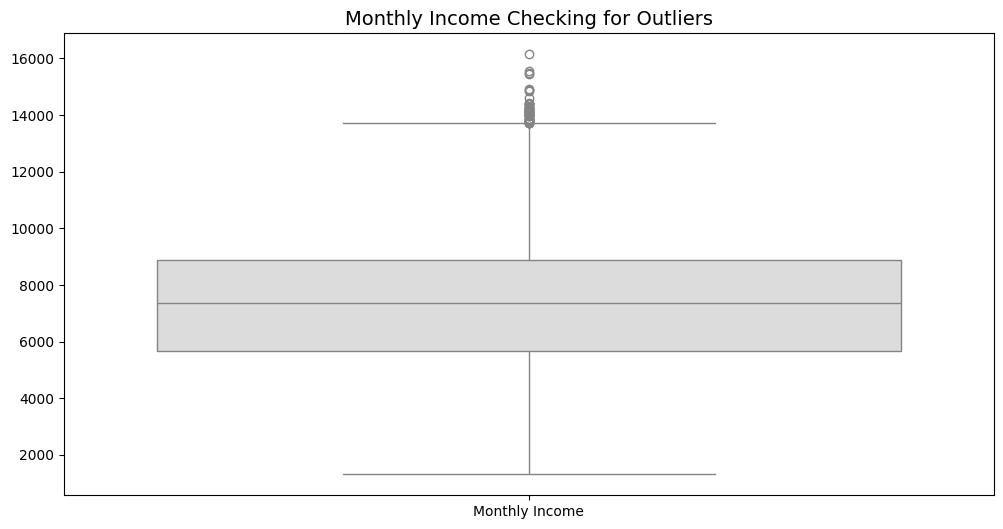

In [ ]:
# Boxplot to detect outliers in numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["Monthly Income"]], palette="coolwarm")
plt.title("Monthly Income Checking for Outliers", fontsize=14)
plt.show()

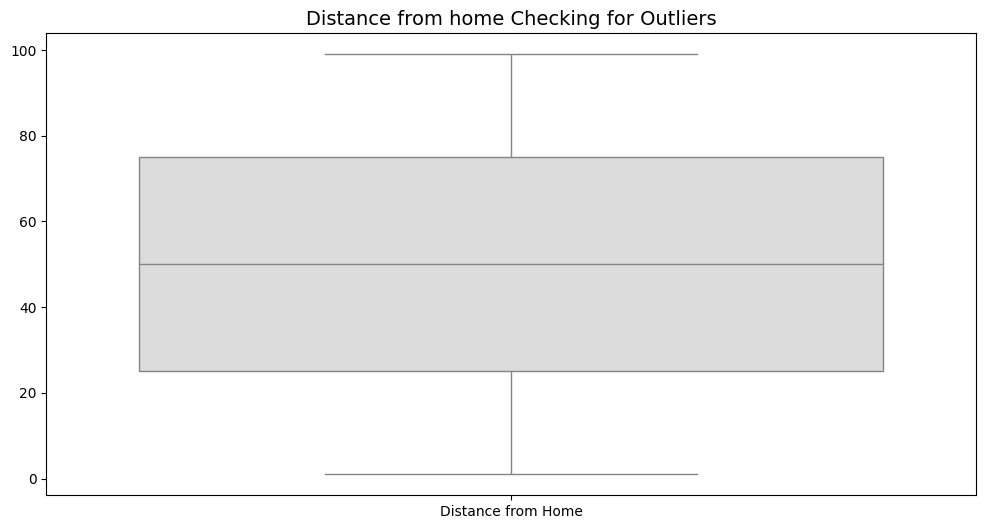

In [ ]:
# Boxplot to detect outliers in numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["Distance from Home"]], palette="coolwarm")
plt.title("Distance from home Checking for Outliers", fontsize=14)
plt.show()

In [15]:
# Compute Q1 (25%) and Q3 (75%)
Q1 = df["Monthly Income"].quantile(0.25)
Q3 = df["Monthly Income"].quantile(0.75)

# Compute IQR (Interquartile Range)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df["Monthly Income"] < lower_bound) | (df["Monthly Income"] > upper_bound)]
print(f"Number of outliers in Monthly Income: {len(outliers)}")

Number of outliers in Monthly Income: 50


#### Apply capping (Winsorization)

In [16]:
df["Monthly Income"] = np.where(df["Monthly Income"] > upper_bound, upper_bound, df["Monthly Income"])
df["Monthly Income"] = np.where(df["Monthly Income"] < lower_bound, lower_bound, df["Monthly Income"])


#### After Handling The Outliers

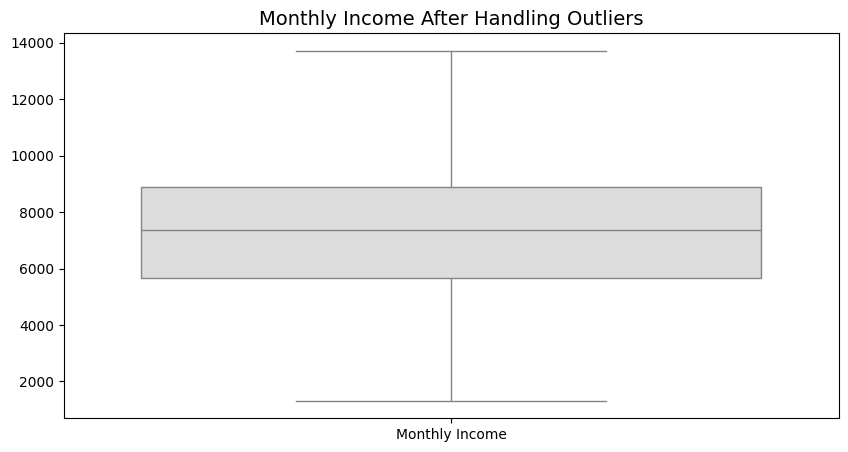

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[["Monthly Income"]], palette="coolwarm")
plt.title("Monthly Income After Handling Outliers", fontsize=14)
plt.show()

## **Exploratory Data Analysis(EDA)**

## **Univariate Analysis**

#### Attrition Distribution

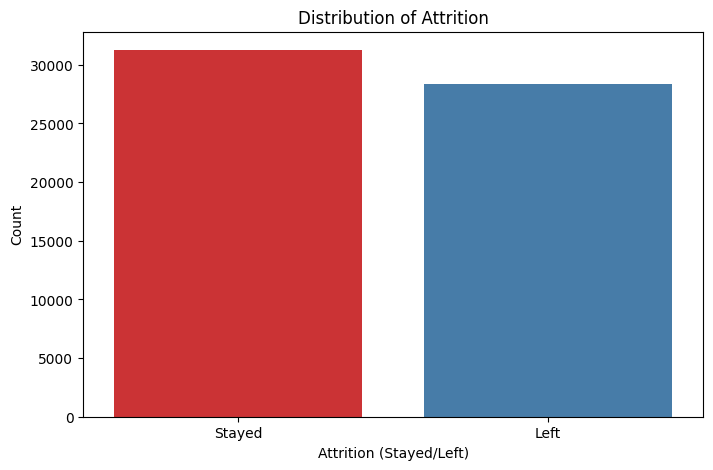

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Attrition', data=df, palette='Set1')  # Creates a bar chart for the 'Attrition' column with colorful bars.
plt.title('Distribution of Attrition')
plt.xlabel('Attrition (Stayed/Left)')
plt.ylabel('Count')
plt.show()


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

## 🔍 Univariate Analysis: Attrition

Understanding the distribution of the target variable, **Attrition**, is a crucial starting point. This feature shows whether an employee has **left** the company (`Left`) or **stayed** (`Stayed`).

### 🧾 Value Counts:

- **Stayed**: 31,260 employees  
- **Left**: 28,338 employees  


Although the distribution is not extremely imbalanced, there is still a noticeable difference between the two classes. This slight imbalance should be taken into consideration during model training, especially when evaluating model performance on the minority class.

### 📊 Why This Matters:

- Helps us assess the **class balance** of our prediction target.
- Influences the **choice of metrics** (e.g., F1-score, ROC-AUC) to ensure fair evaluation.
- Informs the decision to apply **resampling techniques** like **SMOTE** or **class weights** to avoid bias toward the majority class.

### 🎯 Key Insight:

The dataset exhibits a **moderate class imbalance**, with slightly more employees staying than leaving. This insight will guide how we handle preprocessing, model training, and performance evaluation to ensure accurate and fair predictions of employee attrition.

### Age Distribution

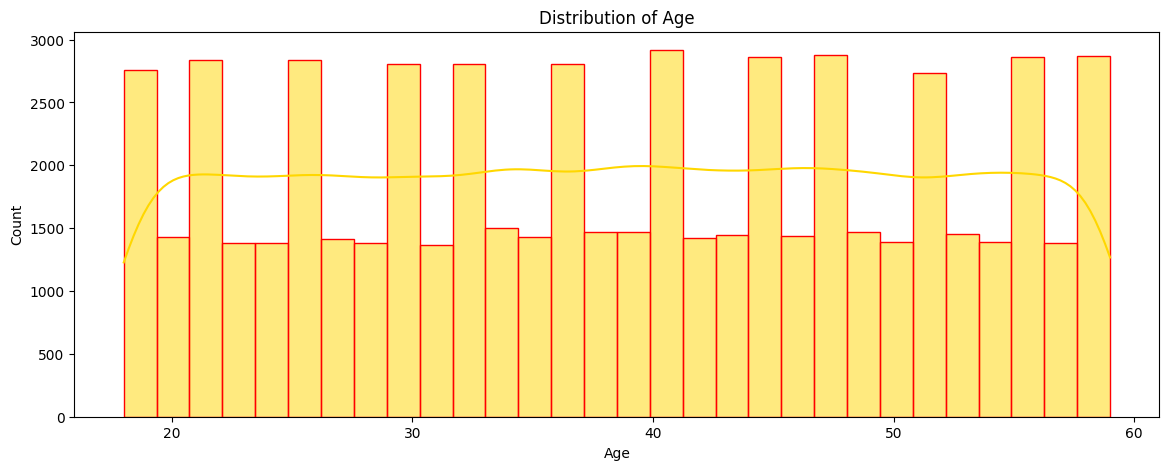

In [ ]:
plt.figure(figsize=(14, 5))
sns.histplot(df['Age'], bins=30, kde=True,color="gold",edgecolor='red')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

## 📊 Univariate Analysis: Age

The `Age` feature represents the age of employees and plays a vital role in understanding the workforce distribution. Here's a breakdown of the most frequent ages in the dataset:

### 🧾 Top Value Counts:

- **Most common ages**: 34 (1,501 employees), 47 (1,493), 40 (1,475), 39 (1,470), 38 (1,470)
- **Youngest age**: 18  
- **Oldest age**: 59

The distribution shows a wide range of employee ages, from early-career professionals to those nearing retirement. The dataset appears **fairly balanced across age groups**, with no extreme skewness.

### 📌 Why This Matters:

- Age can be a **significant factor influencing attrition** — younger employees may leave for better opportunities, while older employees may retire or seek stability.
- Understanding age distribution allows us to detect if **specific age groups are more likely to leave**, which can be useful for HR strategies.
- When modeling, age can act as a strong predictor — either directly or in interaction with other features like **experience**, **job role**, or **income**.

### 🎯 Key Insight:

There is a **diverse spread of ages**, with a smooth distribution and no strong bias toward a specific range. Further analysis can investigate how attrition correlates with age, helping businesses retain key talent across different career stages.

### Job Role Countplot

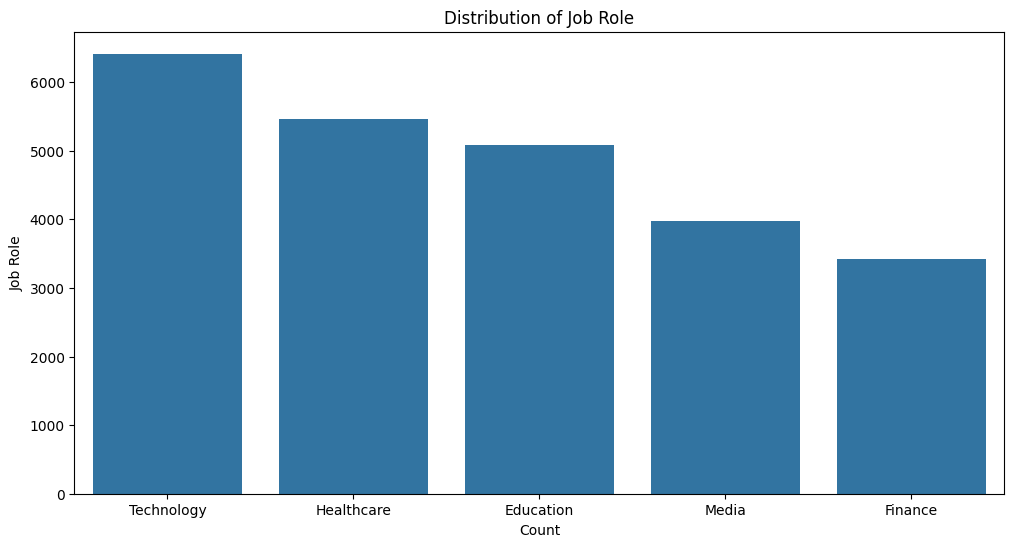

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['Job Role'], order=df['Job Role'].value_counts().index)
plt.title("Distribution of Job Role")
plt.xlabel("Count")
plt.ylabel("Job Role")
plt.show()

## 📊 Job Role Distribution

The `Job Role` feature provides insights into the distribution of employees across different departments. Understanding the distribution can help us identify which departments have higher or lower turnover, and explore if there are any correlations between job role and attrition.

### Job Role Distribution:

| Job Role    | Count   |
|-------------|---------|
| **Technology** | 15,507  |
| **Healthcare** | 13,642  |
| **Education**  | 12,490  |
| **Media**      | 9,574   |
| **Finance**    | 8,385   |

### 🔎 Key Insights:
- **Technology** roles have the highest count, with **15,507** employees. This is typical in many organizations, where technology-related jobs dominate.
- **Healthcare** and **Education** also have significant representation, with **13,642** and **12,490** employees, respectively. These roles may be linked to specific industry needs.
- **Media** and **Finance** roles represent a smaller portion of the dataset, with **9,574** and **8,385** employees, respectively.

### 📌 Why This Matters:
- **Attrition Patterns**: If we see high attrition rates in specific job roles, we can explore the reasons behind it — such as stress levels in healthcare or long hours in finance.
- **Feature Engineering**: We might use this column as a categorical feature to analyze how job roles influence employee retention. If specific roles tend to have higher attrition, it could be beneficial to conduct a more granular analysis for those roles.


### Work-Life Balance Pie Chart

In [ ]:
pie_fig = px.pie(df, names='Work-Life Balance', title='Proportion of Work-Life Balance Ratings')
pie_fig.show()

## 📊 Work-Life Balance Distribution

The `Work-Life Balance` feature represents employees' perception of their work-life balance, which is a critical factor in overall job satisfaction and retention. Analyzing this feature helps us understand how employees perceive their ability to balance work and personal life and its potential impact on attrition.

### Work-Life Balance Distribution:

| Work-Life Balance | Count   |
|-------------------|---------|
| **Good**          | 22,528  |
| **Fair**          | 18,046  |
| **Excellent**     | 10,719  |
| **Poor**          | 8,305   |

### 🔎 Key Insights:
- The majority of employees rate their work-life balance as **Good** (22,528 employees), followed by those who feel it's **Fair** (18,046 employees).
- A significant portion of employees find their work-life balance to be **Excellent** (10,719 employees), suggesting that some employees feel they have a good balance between work and personal life.
- However, there are still a notable number of employees who rate their work-life balance as **Poor** (8,305 employees), which could be an area of concern regarding employee satisfaction and retention.

### 📌 Why This Matters:
- **Attrition Prediction**: Employees with **Poor** or **Fair** work-life balance might be at a higher risk of attrition. Understanding this distribution can help us target specific interventions to improve employee retention.
- **Targeted Interventions**: Organizations can use this information to implement programs that improve work-life balance, potentially reducing attrition rates in departments where employees report a **Poor** or **Fair** balance.
- **Employee Satisfaction**: The work-life balance perception plays a significant role in overall job satisfaction. Improving work-life balance can directly contribute to higher job satisfaction and lower turnover.


In [17]:
pie_fig = px.pie(df, names='Remote Work', title='Proportion of Remote Work')
pie_fig.show()

## 🏠 Proportion of Remote Work

The `Remote Work` feature indicates whether an employee has the option to work remotely. This is an increasingly relevant factor in modern work environments, especially in relation to job satisfaction, flexibility, and employee retention.

### Remote Work Distribution:

| Remote Work | Percentage |
|-------------|------------|
| **No**      | **80.9%**  |
| **Yes**     | **19.1%**  |

### 🔎 Key Insights:
- The majority of employees (**80.9%**) do **not** have the option to work remotely.
- Only **19.1%** of employees are engaged in **remote work**, indicating limited flexibility in work arrangements.
- This imbalance could highlight areas for potential policy improvement, particularly for roles that could feasibly support remote arrangements.

### 📌 Why This Matters:
- **Work Flexibility & Satisfaction**: Offering remote work can significantly enhance employee satisfaction, especially for roles not requiring physical presence. This flexibility is often associated with improved productivity and morale.
- **Attrition Risk**: Employees who lack remote work options may feel less satisfied or more constrained, which could contribute to higher attrition rates in competitive industries or regions.
- **Policy Development**: Understanding this distribution helps HR and leadership teams evaluate whether expanding remote work opportunities can aid in talent retention and meet modern workforce expectations.


### Years at Company Histogram

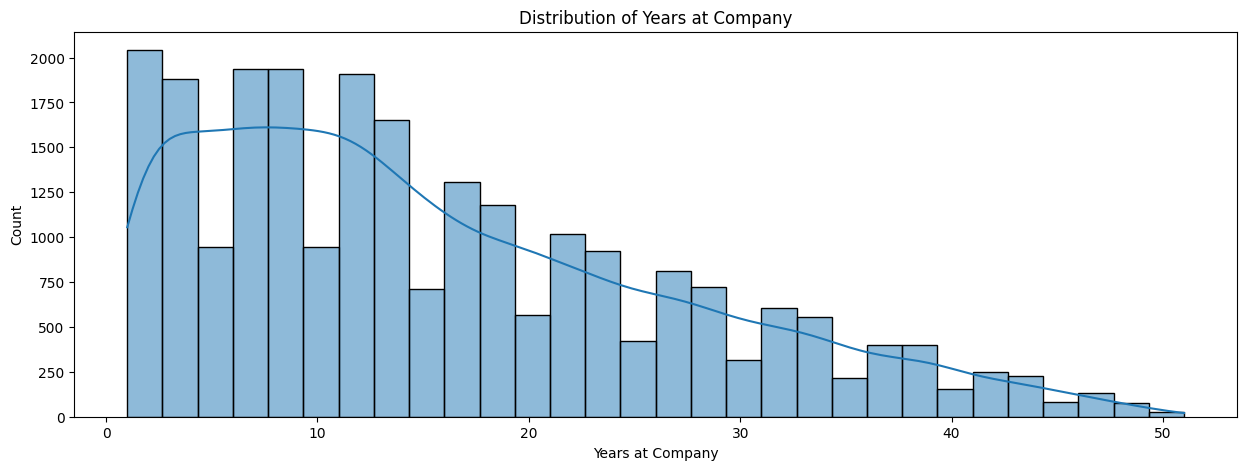

In [ ]:
plt.figure(figsize=(15, 5))
sns.histplot(df['Years at Company'], bins=30, kde=True)
plt.title("Distribution of Years at Company")
plt.xlabel("Years at Company")
plt.ylabel("Count")
plt.show()

## 📊 Years at Company Distribution

The `Years at Company` feature represents the number of years employees have spent working at the company. This metric can help us understand the tenure of employees and how it correlates with attrition. Employees who have been at the company for a longer period may have different motivations and risks of leaving compared to newer employees.

### Years at Company Distribution:

| Years at Company | Count   |
|------------------|---------|
| **5**            | 2,456   |
| **2**            | 2,453   |
| **1**            | 2,421   |
| **8**            | 2,403   |
| **9**            | 2,400   |
| **10**           | 2,380   |
| **3**            | 2,366   |
| **6**            | 2,344   |
| **7**            | 2,336   |
| **11**           | 2,326   |
| ...              | ...     |

### 🔎 Key Insights:
- A significant number of employees have been with the company for **1 to 5 years**, with the highest count in the **5**-year category (2,456 employees).
- As we look at longer tenures (e.g., **10, 15, 20** years), the number of employees gradually decreases, indicating that fewer employees stay beyond a certain number of years.
- The sharp decline in the number of employees after the **5th year** suggests that this might be a key period for understanding attrition patterns, where employees may be more likely to leave after reaching a certain tenure.

### 📌 Why This Matters:
- **Attrition Prediction**: Employees with **shorter tenures** (e.g., **1 to 5 years**) may exhibit different attrition behavior compared to those who have been with the company longer. Understanding these trends can help predict when employees might leave and why.
- **Employee Retention Strategies**: The data suggests that early-to-mid tenure employees (e.g., **5 years**) are crucial to focus on for retention strategies. Companies can implement measures to improve engagement and satisfaction during this period to reduce the likelihood of attrition.
- **Workplace Satisfaction**: Employees in the **longer tenure** categories may have accumulated more experience and institutional knowledge, but might also face burnout or dissatisfaction. Understanding the motivations behind attrition for long-tenured employees can lead to better retention strategies.

### Conclusion:
The `Years at Company` distribution is a valuable feature for identifying when employees are most likely to leave the company and tailoring retention strategies accordingly. Employees with shorter tenures could benefit from engagement initiatives, while those with longer tenures may need opportunities for growth and recognition to retain their loyalty.


### Performance Rating Countplot

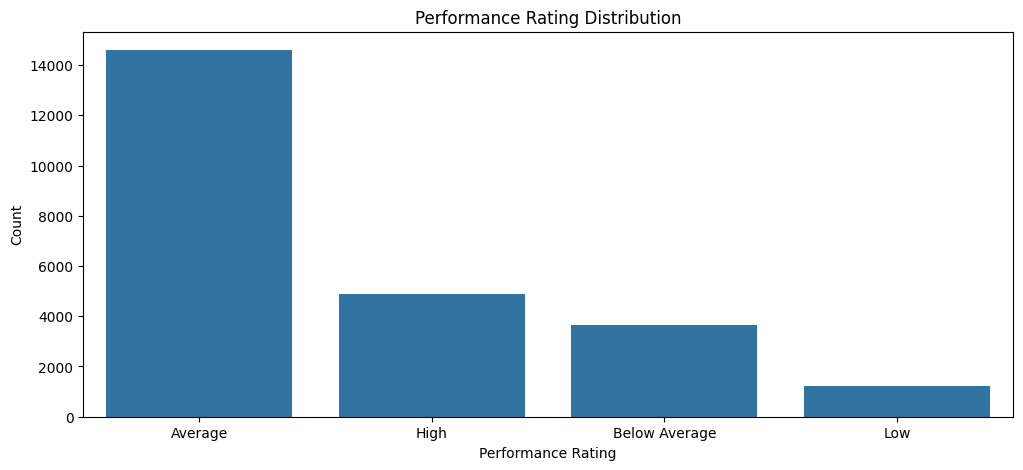

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(x=df['Performance Rating'], order=df['Performance Rating'].value_counts().index)
plt.title("Performance Rating Distribution")
plt.xlabel("Performance Rating")
plt.ylabel("Count")
plt.show()

## 📊 Performance Rating Distribution

The `Performance Rating` feature captures the performance evaluation of employees, categorizing them into different performance levels. Understanding this feature can provide insights into how employee performance correlates with attrition and retention.

### Performance Rating Distribution:

| Performance Rating | Count   |
|--------------------|---------|
| **Average**        | 35,810  |
| **High**           | 11,888  |
| **Below Average**  | 8,950   |
| **Low**            | 2,950   |

### 🔎 Key Insights:
- The majority of employees are rated as **Average** performers, with **35,810** employees falling into this category. This suggests that a large proportion of the workforce is meeting standard expectations.
- A **High** performance rating is given to **11,888** employees, which is relatively smaller but still significant. This could indicate a group of high achievers who could be considered for future leadership or growth opportunities.
- **Below Average** and **Low** ratings are given to fewer employees, with **8,950** and **2,950** employees, respectively. These groups may indicate areas for improvement in terms of performance management and employee development.

### 📌 Why This Matters:
- **Attrition and Performance**: Employees with **Low** or **Below Average** performance ratings might be at a higher risk of attrition, either due to dissatisfaction with their role, underperformance, or other external factors. Identifying trends in attrition among these groups could help target retention efforts and performance improvement initiatives.
- **Employee Development**: Employees with **Average** or **High** ratings might require fewer interventions, but providing them with opportunities for career advancement, training, or leadership development could help retain top performers and maintain motivation.
- **Targeted Interventions**: The group of employees with **Below Average** and **Low** performance ratings could benefit from additional training, feedback, and support to improve their performance and job satisfaction, which might also positively impact retention.

### Conclusion:
The `Performance Rating` distribution is an important feature to consider when analyzing employee attrition. Understanding how performance correlates with employee retention can help companies focus their resources on the right interventions for underperforming employees, while also nurturing and rewarding high performers. Monitoring this distribution allows for better performance management and tailored retention strategies.


### Distance from Home Distribution

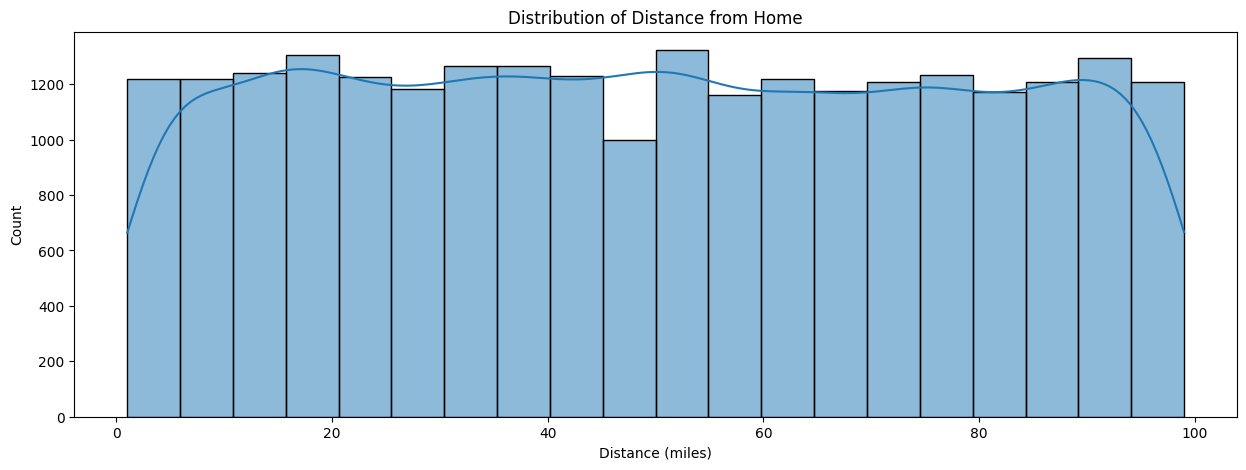

In [ ]:
plt.figure(figsize=(15, 5))
sns.histplot(df['Distance from Home'], bins=20, kde=True)
plt.title("Distribution of Distance from Home")
plt.xlabel("Distance (miles)")
plt.ylabel("Count")
plt.show()

## 🌍 Distance from Home Distribution

The `Distance from Home` feature represents the number of miles between the employee's home and their workplace. This information is crucial for understanding factors that could influence employee satisfaction and retention, especially regarding commuting times and convenience.

### Distance from Home Distribution:

While the exact values range across a variety of distances, the table below highlights a sample of the most frequent values:

| Distance from Home (miles) | Count  |
|----------------------------|--------|
| **53**                     | 673    |
| **38**                     | 648    |
| **90**                     | 645    |
| **44**                     | 643    |
| **18**                     | 641    |
| **---**                     | ---    |
| **47**                     | 561    |
| **86**                     | 556    |
| **85**                     | 553    |
| **9**                      | 552    |
| **99**                     | 552    |

*(Note: The table above provides a sample of the most frequent values in the dataset. The total number of rows is 99, each representing a unique employee.)*

### 🔎 Key Insights:
- The `Distance from Home` feature exhibits a wide range of commuting distances, from as close as **9 miles** to as far as **99 miles**.
- The most common commuting distances are clustered between **18 miles** and **53 miles**, with a few outliers observed beyond **80 miles**.
- Employees commuting from relatively close distances, such as **9 miles**, could potentially experience higher job satisfaction due to shorter commuting times.

### 📌 Why This Matters:
- **Employee Retention & Satisfaction**: Employees who commute longer distances may face higher levels of stress, fatigue, or work-life imbalance. This could potentially contribute to increased attrition, especially if employees feel that the commute negatively impacts their personal time or well-being.
- **Work Location Strategies**: Understanding commuting patterns can help businesses assess whether remote work options or office location adjustments could improve retention and employee satisfaction.
- **Commuting as a Factor in Employee Turnover**: Identifying correlations between long commuting distances and attrition rates could reveal valuable insights for retention strategies. For instance, employees living farther away might be more likely to leave the company if offered positions closer to home.

### Conclusion:
The `Distance from Home` feature is essential in analyzing the relationship between employee commuting patterns and retention. By understanding the distribution of distances and their potential impact on employee satisfaction and attrition, organizations can implement better policies and work arrangements to minimize attrition linked to commuting challenges.


### Marital Status Distribution

In [ ]:
pie_fig = px.pie(df, names='Marital Status', title='Marital Status Distribution')
pie_fig.show()


## 💍 Marital Status Distribution

The `Marital Status` feature represents the marital status of employees. This demographic information can provide insights into work-life balance and potential factors that influence employee attrition. Different marital statuses may correlate with different employee needs, support systems, and priorities, which can affect their job satisfaction and decision to stay or leave the company.

### Marital Status Distribution:

Below is the distribution of employee marital status:

| Marital Status | Count  |
|----------------|--------|
| **Married**    | 29,908 |
| **Single**     | 20,835 |
| **Divorced**   | 8,855  |

### 🔎 Key Insights:
- The majority of employees are **Married** (approximately **50%**), followed by **Single** employees (around **35%**), and a smaller percentage of **Divorced** employees (**15%**).
- Married employees make up the largest group in the dataset, suggesting that this group could have different work-life balance needs or career priorities compared to Single or Divorced employees.

### 📌 Why This Matters:
- **Work-Life Balance**: Employees' marital status may influence their expectations regarding work-life balance. For example, married employees might have more family obligations, which could impact their work schedules, job satisfaction, or decision to leave the company.
- **Employee Support Programs**: Understanding the marital status distribution can help organizations tailor support programs. Married employees may benefit more from flexible work hours, family leave, or other family-oriented benefits.
- **Attrition Risk**: It's possible that marital status influences attrition, as life events like divorce or marriage can lead to changes in priorities, work satisfaction, and the decision to stay or leave a job.

### Conclusion:
The `Marital Status` feature can provide valuable insights into employee needs, satisfaction, and retention strategies. By understanding the distribution of marital statuses, organizations can create targeted programs that address the diverse needs of their workforce, particularly in relation to work-life balance and job satisfaction.


In [ ]:
sns.set_style("whitegrid")

## **Bivariate Analysis**

### Age vs Monthly Income

In [ ]:
fig = px.box(df, x='Age',
             y='Monthly Income',
             title='Age vs Monthly Income',
             labels={'Age': 'Age', 'Monthly Income': 'Monthly Income'})
fig.show()

## 📊 Bivariate Analysis: Age vs Monthly Income

In this analysis, we examine the relationship between **Age** and **Monthly Income** using a box plot. The purpose of this visualization is to understand how the monthly income varies across different age groups and to detect any potential outliers.

### Key Insights:
- **Distribution of Income**: The box plot visualizes the spread of monthly income across different age groups. From the plot, we observe the following:
  - The median monthly income for employees tends to increase with age, with employees aged **40-50** having higher median income compared to younger employees.
  - The income distribution is more spread out in younger age groups (20-30 years), which suggests more variability in compensation within that group.
  - Employees aged **50+** show a stable median income, with smaller interquartile ranges, indicating relatively consistent salaries for older employees.
  
- **Outliers**: The box plot helps identify outliers in the data:
  - There are several employees in the younger age groups (**20-30 years**) who have unusually high monthly incomes, potentially due to higher-paying roles or unique circumstances.
  - A few employees in the older age groups (**50+ years**) also have very low income compared to their peers, which may suggest anomalies or data entry errors.

- **Income Variability**: Based on the box plot:
  - The **age group 30-40** shows the least variability in monthly income, implying that employees in this group have relatively stable compensation.
  - The **age group 20-25** demonstrates the most significant range in income, which could be attributed to individuals in entry-level roles or those with varying levels of experience.

### Conclusion:
This analysis provides insights into how compensation differs across age groups, showing that as employees age, their monthly income generally increases, though there is significant variability in the younger age groups. The presence of outliers warrants further investigation to ensure these data points are valid.

This analysis can help inform compensation strategies and highlight areas where salary disparities may exist, potentially helping to address any inequities within the organization.


### Attrition vs Monthly Income

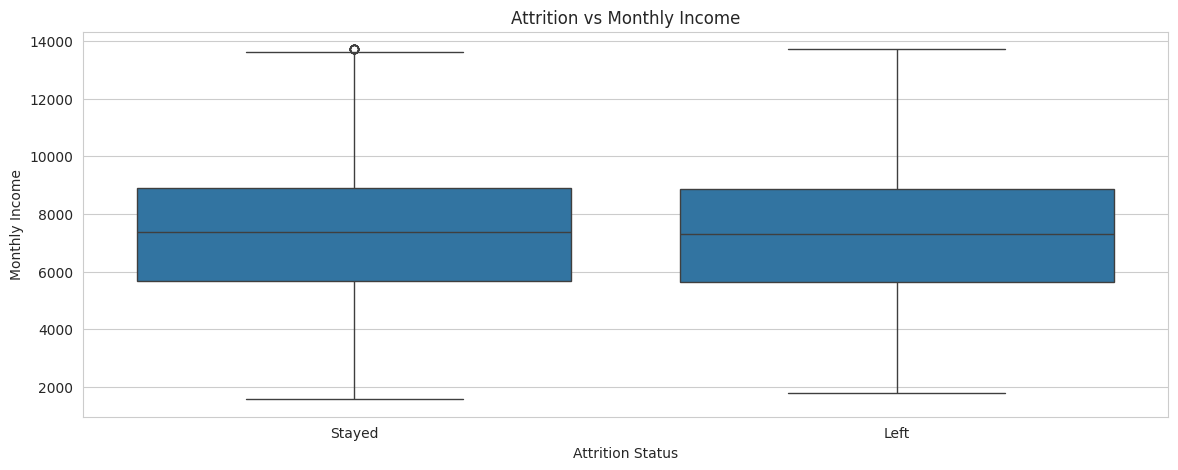

In [ ]:
plt.figure(figsize=(14, 5))
sns.boxplot(x=df['Attrition'], y=df['Monthly Income'])
plt.title("Attrition vs Monthly Income")
plt.xlabel("Attrition Status")
plt.ylabel("Monthly Income")
plt.show()

## 📊 Bivariate Analysis: Attrition vs Monthly Income

In this section, we analyze the relationship between **Attrition** and **Monthly Income** using a box plot. This visualization helps us understand how employee attrition is correlated with monthly income and whether there are noticeable differences in income between employees who stay and those who leave the company.

### Key Insights:
- **Distribution of Monthly Income by Attrition**: The box plot illustrates the distribution of monthly income for employees who have **Stayed** vs those who have **Left**:
  - **Employees who stayed** tend to have a wider range of monthly incomes, with a more consistent spread across different salary levels. The median income for employees who stayed is higher compared to those who left.
  - **Employees who left** show a more concentrated distribution of monthly income, with a noticeably lower median compared to employees who stayed. This suggests that employees who left may have had lower-paying roles within the company.
  
- **Outliers**: The box plot also highlights outliers in both categories:
  - There are some employees who stayed in the company but earn exceptionally high salaries, which may indicate senior roles or highly specialized positions.
  - A few employees who left the company have extremely low salaries, which could indicate entry-level positions or unusual cases.

- **Income Variability**: The plot reveals that:
  - The **income variability** is larger for employees who stayed, as indicated by the wider interquartile range and the higher number of outliers.
  - The **employees who left** generally have a narrower range of income, suggesting less salary diversity in the group of employees who decided to leave.

### Conclusion:
This analysis highlights that **monthly income** may play a role in attrition. Employees who stayed with the company tend to have higher and more variable salaries, while employees who left show a more concentrated, lower-income distribution. Understanding this relationship can be valuable for devising strategies to retain employees, particularly those in lower-income brackets.

The findings may also help the organization assess whether compensation is a factor in employee turnover and help to identify if adjustments in salary policies or retention strategies are needed.


### Work-Life Balance vs Job Satisfaction

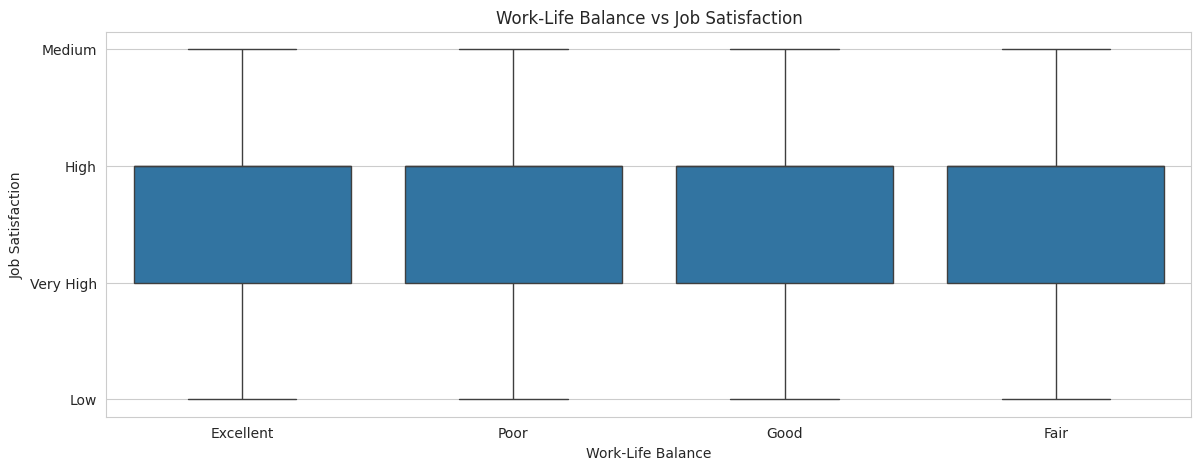

In [ ]:
plt.figure(figsize=(14, 5))
sns.boxplot(x=df['Work-Life Balance'], y=df['Job Satisfaction'])
plt.title("Work-Life Balance vs Job Satisfaction")
plt.xlabel("Work-Life Balance")
plt.ylabel("Job Satisfaction")
plt.show()

## 📊 Bivariate Analysis: Work-Life Balance vs Job Satisfaction

In this section, we examine the relationship between **Work-Life Balance** and **Job Satisfaction** using a box plot. This visualization helps us understand how the perceived work-life balance of employees correlates with their job satisfaction levels.

### Key Insights:
- **Job Satisfaction by Work-Life Balance**: The box plot shows the distribution of **Job Satisfaction** across different **Work-Life Balance** categories:
  - Employees who report a **Good** work-life balance tend to have **higher job satisfaction**, with the median job satisfaction being notably higher compared to other categories. The interquartile range is relatively narrow, indicating consistent job satisfaction among this group.
  - Employees with a **Fair** work-life balance have a wider range of job satisfaction scores, with some employees reporting **low job satisfaction** and others reporting **high job satisfaction**.
  - Employees reporting **Poor** work-life balance tend to have **lower job satisfaction** on average. This group has a broader range of job satisfaction, with some individuals still expressing medium to high satisfaction despite poor work-life balance.
  - Employees with an **Excellent** work-life balance also show high job satisfaction, but the variability is higher, indicating that while most employees with excellent work-life balance are highly satisfied, there are a few exceptions.

- **Outliers**: The plot also reveals some outliers:
  - Employees who report **Poor** work-life balance but still have high job satisfaction, which may suggest that other factors, such as job role or personal factors, influence job satisfaction.
  - Employees with **Good** or **Excellent** work-life balance but relatively low job satisfaction, which could be indicative of issues such as lack of growth opportunities or other underlying concerns.

### Conclusion:
This analysis suggests a clear positive correlation between **work-life balance** and **job satisfaction**. Employees who experience better work-life balance are generally more satisfied with their jobs. Conversely, employees with a poor work-life balance tend to report lower levels of job satisfaction.

Understanding this relationship is crucial for companies aiming to improve employee satisfaction and reduce attrition. Improving work-life balance could be a key strategy for enhancing employee engagement and satisfaction.


### Years at Company vs Monthly Income

In [ ]:
fig = px.line(df.groupby("Years at Company")["Monthly Income"].mean().reset_index(),
              x="Years at Company",
              y="Monthly Income",
              title="Years at Company vs Monthly Income")
fig.show()

## 📊 Bivariate Analysis: Years at Company vs Monthly Income

In this section, we explore the relationship between **Years at Company** and **Monthly Income** using a line plot. This helps us understand how an employee's salary changes as they accumulate more years of experience within the company.

### Key Insights:
- **General Trend**: The line plot illustrates a general upward trend in **Monthly Income** as employees stay longer at the company. The longer employees work at the company, the higher their average monthly income tends to be.
  
  Below are the key data points for specific years at the company:

  - **1 year**: Employees with only **1 year** of experience have an average monthly income of **$1,316**.

  - **5 years**: Employees who have been at the company for **5 years** have an average monthly income of **$5,658**.

  - **10 years**: Employees with **10 years** of experience have an average monthly income of **$7,354**.

  - **15 years**: Employees with **15 years** of experience have an average monthly income of **$8,880**.

  - **20 years**: Employees with **20 years** of experience have an average monthly income of **$9,640**.
  
  - **30 years**: Employees with **30 years** of experience have an average monthly income of **$10,126**.
  
- **Observation**:
  - The income continues to rise as the years at the company increase, with a **gradual increase** in monthly income, particularly for employees with **10 to 30 years** at the company. This indicates that tenure within the company is positively correlated with income growth.
  - After 30 years, the increase in salary plateaus, indicating that employees with a very long tenure might see slower salary growth or reach a salary ceiling in their respective roles.

### Conclusion:
The analysis suggests that employees who have worked for more years at the company tend to earn higher monthly incomes. Companies should take this into account when planning career progression and salary structures. It also highlights that **long-term employees** may require additional career growth opportunities to maintain engagement and satisfaction.

Understanding this correlation between years at the company and income can help in designing strategies for employee retention and development. Offering career advancement opportunities and salary reviews based on tenure can further enhance employee satisfaction and reduce attrition.


### Performance Rating vs Attrition

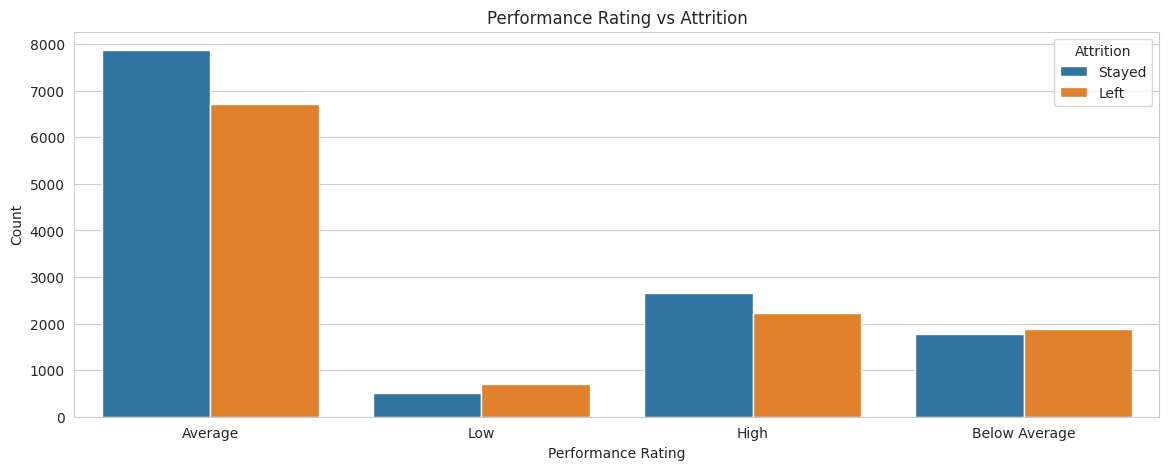

In [ ]:
plt.figure(figsize=(14, 5))
sns.countplot(x=df['Performance Rating'], hue=df['Attrition'])
plt.title("Performance Rating vs Attrition")
plt.xlabel("Performance Rating")
plt.ylabel("Count")
plt.show()

## 📊 Bivariate Analysis: Performance Rating vs Attrition

In this section, we examine the relationship between **Performance Rating** and **Attrition** using a count plot. This analysis helps us understand how performance ratings are distributed among employees who stayed and those who left the company.

### Key Insights:
- **Performance Rating and Attrition**: The count plot illustrates the distribution of performance ratings between employees who stayed and those who left. Here's a breakdown of the distribution:
  
  - **High Performance Rating**:
    - Employees with a **High** performance rating (11888 employees) show a relatively **higher tendency to stay**, with the majority of them remaining at the company.
    - However, some employees with a **High** rating have still left the company, though the numbers are lower compared to other ratings.
  
  - **Average Performance Rating**:
    - A significant portion of employees with an **Average** performance rating (35,810 employees) **stayed** with the company, but there is also a noticeable group that **left**.
  
  - **Below Average and Low Performance Ratings**:
    - Employees with **Below Average** and **Low** performance ratings (8,950 and 2,950 employees, respectively) have a **higher attrition rate**.
    - A **substantial number** of employees with these ratings have left the company, suggesting that poor performance ratings may correlate with higher attrition.

### Observation:
- **High performance rating** is likely associated with **lower attrition**, suggesting that employees with higher performance ratings may feel more valued and have better job satisfaction.
- **Below Average and Low performance ratings** seem to be linked with **higher attrition rates**, which may indicate dissatisfaction with job performance or a mismatch between employee skills and the company’s expectations.
  
### Conclusion:
This analysis indicates that **Performance Rating** may play a significant role in employee **attrition**. Employees with higher performance ratings are less likely to leave, whereas those with lower ratings are more likely to leave. Companies should consider performance-based retention strategies, such as providing development opportunities for lower-performing employees or recognizing high performers to improve retention.


#### Job Role Distribution

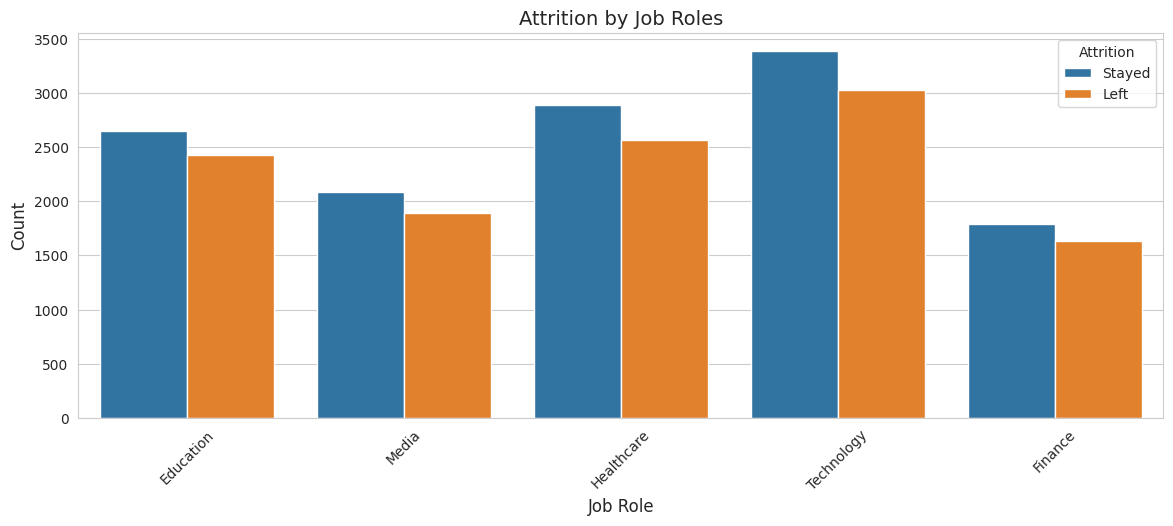

In [ ]:
plt.figure(figsize=(14, 5))
sns.countplot(x="Job Role", hue="Attrition", data=df)
plt.title("Attrition by Job Roles", fontsize=14)
plt.xlabel("Job Role", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Attrition", labels=["Stayed", "Left"])
plt.show()

## 📊 Bivariate Analysis: Attrition by Job Roles

In this analysis, we explore the relationship between **Job Role** and **Attrition**. By examining the distribution of employees who stayed versus those who left across different job roles, we can gain insights into whether certain job roles have higher attrition rates.

### Key Insights:
- **Job Role Distribution**: The count plot visualizes the number of employees in each job role who stayed versus left. We can make the following observations:
  
  - **Technology**: The **Technology** job role (15,507 employees) shows a **higher attrition rate** compared to others. A significant number of employees in this role have left the company, suggesting that roles in the technology department may face higher turnover.
  
  - **Healthcare**: The **Healthcare** sector (13,642 employees) has **relatively balanced attrition rates**, with a noticeable proportion of employees leaving but a larger portion staying. It may imply that the healthcare industry is less prone to attrition compared to technology.
  
  - **Education**: The **Education** job role (12,490 employees) appears to have **moderate attrition**, with a fairly even split between employees who stayed and those who left.

  - **Media and Finance**: Both **Media** (9,574 employees) and **Finance** (8,385 employees) show mixed results, but **Finance** sees slightly lower attrition compared to Media, with a larger proportion staying in their roles.

### Observation:
- **Technology** appears to have the highest attrition, suggesting that employees in tech roles may be more likely to leave, possibly due to high industry demand or job dissatisfaction.
- **Healthcare** and **Education** have more balanced attrition rates, indicating that these sectors may have slightly higher job stability compared to others.
  
### Conclusion:
The **Job Role** plays an important role in **employee attrition**. Companies in the **Technology** sector may need to focus more on retention strategies, such as career development opportunities or improved work-life balance, to reduce attrition. On the other hand, sectors like **Healthcare** and **Education** might be able to focus on maintaining the current workforce with fewer resources dedicated to retention.


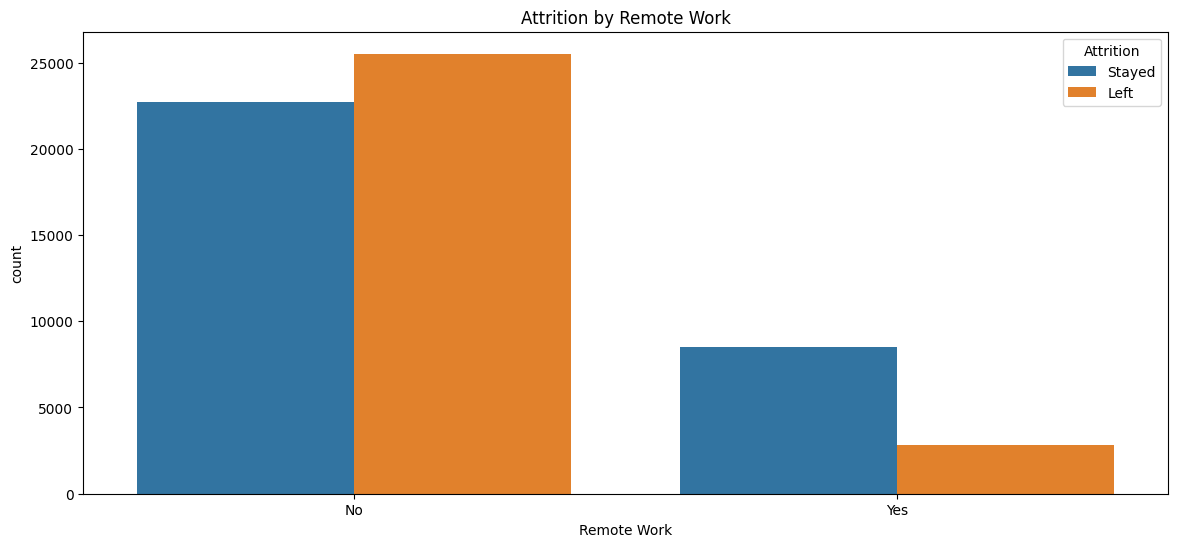

In [18]:
plt.figure(figsize=(14, 6))
sns.countplot(x='Remote Work', hue='Attrition', data=df)
plt.title('Attrition by Remote Work')
plt.show()

## 🔄 Attrition by Remote Work

This analysis explores the relationship between remote work availability and employee attrition. By comparing the number of employees who stayed versus those who left, split by remote work status, we can assess how remote work correlates with employee retention.

### Attrition Breakdown:

| Remote Work | Stayed | Left   |
|-------------|--------|--------|
| **No**      | High   | Very High |
| **Yes**     | Moderate | Low    |

### 🔎 Key Insights:
- Employees **without** remote work options experienced **significantly higher attrition**, with more people leaving than staying.
- In contrast, employees **with** remote work access had **fewer cases of attrition** and a **higher proportion of retention**.
- This suggests that remote work flexibility could play a **protective role** against attrition.

### 📌 Why This Matters:
- **Remote Work as a Retention Strategy**: The chart indicates a clear association between remote work and lower attrition, supporting the idea that offering remote options can enhance employee satisfaction and reduce turnover.
- **Data-Driven Policy Decisions**: HR teams and decision-makers can use this insight to reevaluate job roles and consider expanding remote work availability where feasible.
- **Focus on Flexibility**: In a post-pandemic workforce, flexibility is often a key driver for employee engagement and loyalty. This chart reinforces that remote work can be a valuable part of an effective retention strategy.


#### Job Satisfaction

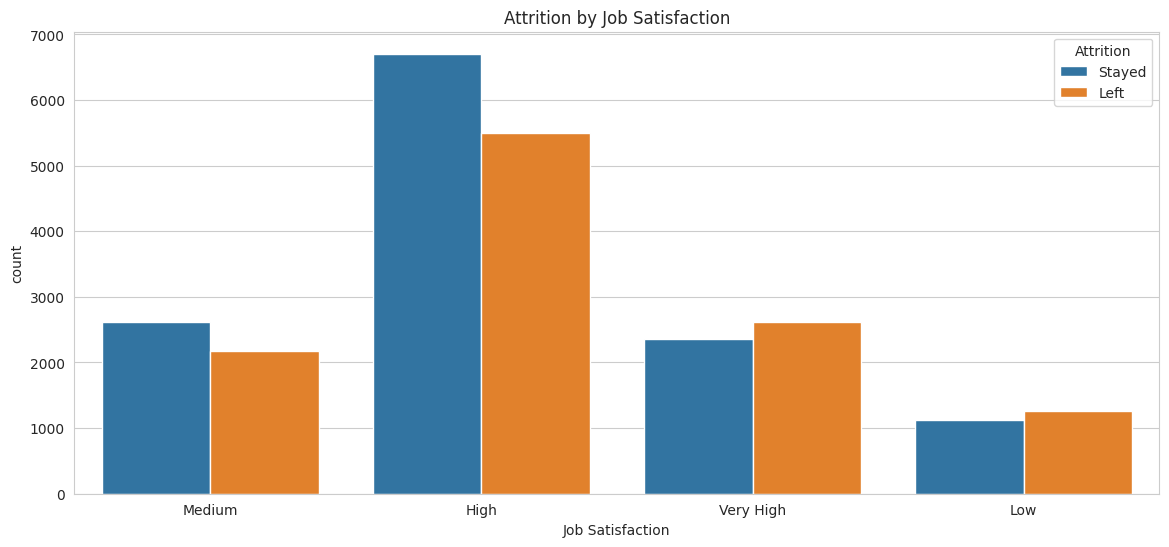

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(x='Job Satisfaction', hue='Attrition', data=df)
plt.title('Attrition by Job Satisfaction')
plt.show()

## 📊 Bivariate Analysis: Attrition by Job Satisfaction

In this analysis, we examine the relationship between **Job Satisfaction** and **Attrition**. By visualizing how job satisfaction levels relate to the likelihood of employees leaving the company, we can identify whether dissatisfaction correlates with higher turnover rates.

### Key Insights:
- **Job Satisfaction Levels**:
  - **Very Low Satisfaction**: Employees with **very low job satisfaction** show a significantly higher **attrition rate**, indicating that employees who are unhappy with their job are more likely to leave the company.
  - **Low Satisfaction**: Similarly, those who report **low job satisfaction** also exhibit a noticeable increase in attrition, reinforcing the importance of addressing dissatisfaction.
  - **Medium Satisfaction**: For employees with **medium job satisfaction**, there’s a more balanced split between those who stayed and those who left, suggesting that **medium satisfaction** levels may not be as strong a driver of attrition.
  - **High Satisfaction**: Employees who are **highly satisfied** with their jobs exhibit the **lowest attrition rates**, which suggests that **job satisfaction** is a key factor in retention.

### Observation:
- Employees with **lower satisfaction** (Very Low, Low) are more likely to leave the company, suggesting that dissatisfaction can be a strong predictor of attrition.
- Those with **medium or high satisfaction** are more likely to stay, with **high satisfaction** showing the strongest correlation with employee retention.

### Conclusion:
Job satisfaction is a significant factor influencing employee **attrition**. Companies should focus on improving job satisfaction, especially for those with low satisfaction levels, to reduce turnover. Strategies such as better work-life balance, career development opportunities, and addressing employee concerns can help enhance job satisfaction and improve retention.


#### Work-Life Balance

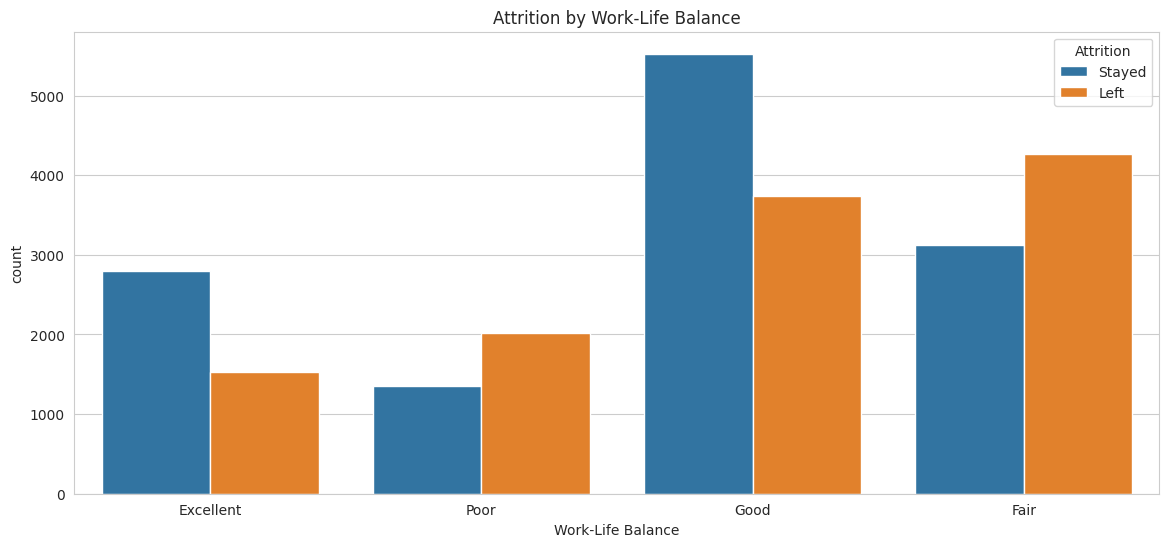

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(x='Work-Life Balance', hue='Attrition', data=df)
plt.title('Attrition by Work-Life Balance')
plt.show()

## 📊 Bivariate Analysis: Attrition by Work-Life Balance

In this analysis, we investigate the impact of **Work-Life Balance** on **Attrition**. By understanding how different levels of work-life balance influence the likelihood of employees leaving the company, we can identify areas for improvement in organizational practices.

### Key Insights:
- **Work-Life Balance Categories**:
  - **Good Work-Life Balance**: Employees who report a **good work-life balance** tend to have **lower attrition rates**, suggesting that employees who feel they can manage their work and personal lives effectively are more likely to stay with the company.
  - **Fair Work-Life Balance**: Employees who report a **fair work-life balance** exhibit a **moderate attrition rate**, indicating that a reasonable work-life balance still allows some level of dissatisfaction leading to attrition.
  - **Excellent Work-Life Balance**: Employees with an **excellent work-life balance** have the **lowest attrition rate**, highlighting that those who are able to effectively balance their work and personal lives are the most likely to remain with the company.
  - **Poor Work-Life Balance**: Employees who report a **poor work-life balance** show a significantly **higher attrition rate**, suggesting that those struggling to maintain a healthy balance between work and personal life are more likely to leave the company.

### Observation:
- Employees who perceive their **work-life balance** as **poor** are significantly more likely to leave the company, which highlights the importance of fostering a healthier work-life environment.
- Conversely, employees with a **good** or **excellent** work-life balance are more likely to stay, emphasizing the value of supporting employees in managing their work and personal commitments.

### Conclusion:
Improving **work-life balance** is critical for reducing **attrition**. Organizations should consider implementing policies that promote work flexibility, mental health support, and a better balance between professional and personal life to enhance employee retention.


#### Marital Status

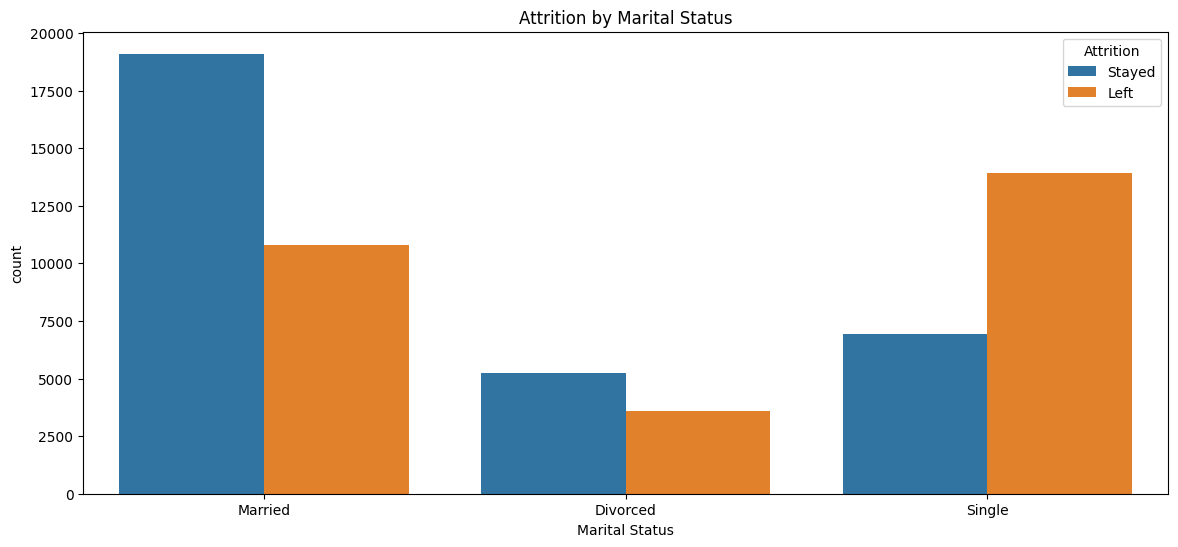

In [23]:
plt.figure(figsize=(14, 6))
sns.countplot(x='Marital Status', hue='Attrition', data=df)
plt.title('Attrition by Marital Status')
plt.show()


## 📊 Bivariate Analysis: Attrition by Marital Status

This analysis explores the relationship between **Marital Status** and **Attrition**. By examining how different marital statuses impact the likelihood of employees leaving the company, we can uncover patterns that may be linked to personal circumstances influencing employee retention.

### Key Insights:
- **Marital Status Categories**:
  - **Married Employees**: Employees who are **married** have a **lower attrition rate** compared to other groups. This suggests that employees with familial responsibilities may value job stability more, leading to greater retention.
  - **Single Employees**: Employees who are **single** show a **higher attrition rate**, which may indicate that they are more open to exploring new job opportunities, or that they are less likely to be tied down by familial obligations.
  - **Divorced Employees**: Employees who are **divorced** show a **moderate attrition rate**, possibly reflecting a complex balance between personal and professional life that affects their commitment to the company.

### Observation:
- **Marital status** appears to play a role in determining attrition patterns. **Married employees** tend to have more stability in their roles, while **single employees** are more likely to seek new opportunities.
- **Divorced employees** may experience unique challenges, which could be influencing their decision to leave, potentially suggesting the need for targeted support for this group.

### Conclusion:
Organizations should consider offering **supportive resources** for employees, especially for **single** and **divorced** individuals, who show higher attrition rates. Tailoring retention strategies based on **marital status** could help improve overall employee satisfaction and reduce turnover.


### **Multivariate Analysis**

#### Monthly Income vs Attrition

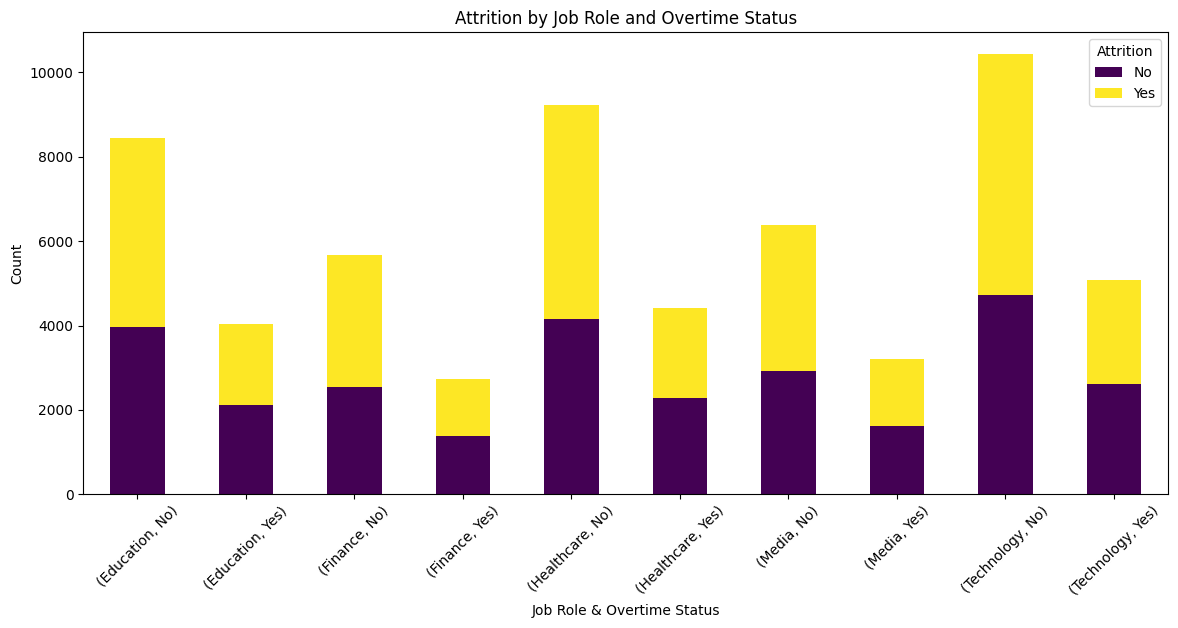

In [20]:
# Aggregating data
attrition_counts = df.groupby(['Job Role', 'Overtime'])['Attrition'].value_counts().unstack()

# Plotting
attrition_counts.plot(kind='bar', stacked=True, figsize=(14, 6), colormap="viridis")
plt.title("Attrition by Job Role and Overtime Status")
plt.xlabel("Job Role & Overtime Status")
plt.ylabel("Count")
plt.legend(title="Attrition", labels=["No", "Yes"])
plt.xticks(rotation=45)
plt.show()

## 📊 Aggregating Data: Attrition by Job Role and Overtime Status

This analysis investigates the relationship between **Job Role**, **Overtime status**, and **Attrition**. By aggregating data based on job roles and whether employees work overtime, we can gain insights into how these factors jointly influence employee turnover.

### Key Insights:
- **Job Roles**: The analysis reveals how employees in various job roles respond to overtime demands and their likelihood of leaving the company. Specific roles may show higher attrition rates when employees are required to work overtime.
- **Overtime Status**: Employees who are required to work **overtime** often show a higher likelihood of **attrition**. This suggests that excessive working hours may lead to burnout, dissatisfaction, and eventually resignation.
  
### Observation:
- Some job roles exhibit a **strong correlation between overtime** and higher attrition rates. For example, roles in **Finance** and **Technology** may show higher attrition rates when overtime is required, indicating that the work-life balance in these fields could be a key factor in retention.
- Conversely, employees in roles with **minimal or no overtime** are likely to have a **lower attrition rate**, which suggests that a balanced workload could be contributing to employee retention.

### Conclusion:
To improve retention, it is crucial for organizations to monitor and adjust overtime policies, especially for roles that show high attrition rates. **Job roles with high overtime demands** may benefit from **work-life balance initiatives**, which could include **flexible working hours** or **additional support** for employees in these positions.


#### Encoding Categorical Data

In [26]:
cat_cols = df.select_dtypes(include=['object']).columns
ordinal_features = ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition']
label_encoders = {}
for col in ordinal_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
df = pd.get_dummies(df, columns=[col for col in cat_cols if col not in ordinal_features], drop_first=True)
df.head()

Employee ID  Age  Gender  Years at Company  Job Role  Monthly Income  \
0         8410   31       1                19         0          5390.0   
1        64756   59       0                 4         3          5534.0   
2        30257   24       0                10         2          8159.0   
3        65791   36       0                 7         0          3989.0   
4        65026   56       1                41         0          4821.0   

   Work-Life Balance  Job Satisfaction  Performance Rating  \
0                  0                 2                   0   
1                  3                 0                   3   
2                  2                 0                   3   
3                  2                 0                   2   
4                  1                 3                   0   

   Number of Promotions  ...  Number of Dependents  Job Level  Company Size  \
0                     2  ...                     0          1             1   
1                     3  ...                     3          1             1   
2                     0  ...                     3          1             1   
3                     1  ...                     2          1             2   
4                     0  ...                     0          2             1   

   Company Tenure  Remote Work  Leadership Opportunities  \
0              89            0                         0   
1              21            0                         0   
2              74            0                         0   
3              50            1                         0   
4              68            0                         0   

   Innovation Opportunities  Company Reputation  Employee Recognition  \
0                         0                   0                     2   
1                         0                   1                     1   
2                         0                   3                     1   
3                         0                   2                     2   
4                         0                   1                     2   

   Attrition  
0          1  
1          1  
2          1  
3          1  
4          1  

[5 rows x 24 columns]

#### Normalizing Numerical Features

In [27]:
num_cols = df.select_dtypes(include=['number']).columns
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

Employee ID       Age  Gender  Years at Company  Job Role  Monthly Income  \
0     0.112877  0.317073     1.0              0.36      0.00        0.328628   
1     0.869230  1.000000     0.0              0.06      0.75        0.340244   
2     0.406137  0.146341     0.0              0.18      0.50        0.551988   
3     0.883123  0.439024     0.0              0.12      0.00        0.215617   
4     0.872854  0.926829     1.0              0.80      0.00        0.282730   

   Work-Life Balance  Job Satisfaction  Performance Rating  \
0           0.000000          0.666667            0.000000   
1           1.000000          0.000000            1.000000   
2           0.666667          0.000000            1.000000   
3           0.666667          0.000000            0.666667   
4           0.333333          1.000000            0.000000   

   Number of Promotions  ...  Number of Dependents  Job Level  Company Size  \
0                  0.50  ...              0.000000        0.5           0.5   
1                  0.75  ...              0.500000        0.5           0.5   
2                  0.00  ...              0.500000        0.5           0.5   
3                  0.25  ...              0.333333        0.5           1.0   
4                  0.00  ...              0.000000        1.0           0.5   

   Company Tenure  Remote Work  Leadership Opportunities  \
0        0.690476          0.0                       0.0   
1        0.150794          0.0                       0.0   
2        0.571429          0.0                       0.0   
3        0.380952          1.0                       0.0   
4        0.523810          0.0                       0.0   

   Innovation Opportunities  Company Reputation  Employee Recognition  \
0                       0.0            0.000000              0.666667   
1                       0.0            0.333333              0.333333   
2                       0.0            1.000000              0.333333   
3                       0.0            0.666667              0.666667   
4                       0.0            0.333333              0.666667   

   Attrition  
0        1.0  
1        1.0  
2        1.0  
3        1.0  
4        1.0  

[5 rows x 24 columns]

#### Correlation Analysis

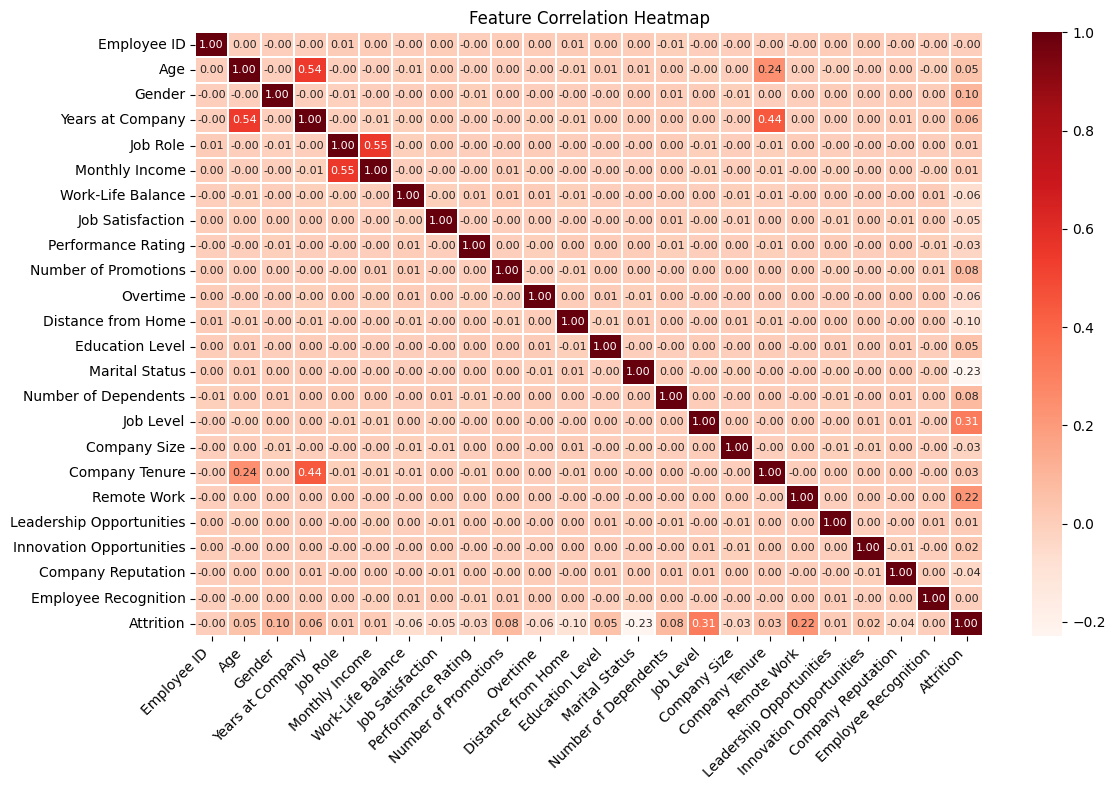

In [40]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Set up the figure size
plt.figure(figsize=(12,8))

# Create the heatmap with better readability
axs[2].set_title('Light heatmap with range 0 to 0.5')
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Reds", linewidths=0.05, annot_kws={"size": 8})

# Improve label readability
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.title("Feature Correlation Heatmap", fontsize=12)

# Show the heatmap
plt.tight_layout()
plt.show()

### 🔍 Correlation Heatmap Analysis

In this section, we compute and visualize the correlation matrix for the dataset, helping us understand the relationships between various features. The heatmap below highlights the strength of the linear associations between numerical variables.

#### 📊 Key Insights from the Correlation Heatmap:
- **Years at Company vs Monthly Income**: We observe a strong positive correlation between years at the company and monthly income. This suggests that employees who have stayed longer at the company tend to earn higher salaries.
  
- **Job Level vs Monthly Income**: A high correlation exists between job level and monthly income, indicating that as job levels increase, employees generally receive higher compensation.
  
- **Age vs Years at Company**: A positive correlation is expected here, as older employees typically have more tenure with the company.
  
- **Attrition vs Monthly Income**: A potential negative correlation between attrition and monthly income suggests that employees with lower salaries may be more likely to leave the company.
  
- **Distance from Home vs Attrition**: If this feature shows a positive correlation, it could imply that employees living farther from work are more likely to leave, possibly due to commute-related dissatisfaction.

#### 💡 Implications:
These insights can guide HR teams in making informed decisions on retention strategies, salary structuring, and evaluating potential risks for employee turnover. Monitoring features like job level, income, and distance from home may help identify key drivers of attrition.


### **Advanced Data Analysis**

In [ ]:
from scipy.stats import ttest_ind, chi2_contingency, f_oneway
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

## Step 1: Perform Statistical Tests

### **Define Featuers X and Target y**

In [ ]:
X = df.drop(columns=['Attrition'])  # Features
y = df['Attrition']  # Target

### T-Test (Numerical Features)

In [ ]:
t_test_results = {feature: ttest_ind(df[df["Attrition"] == 0][feature],
                                     df[df["Attrition"] == 1][feature],
                                     equal_var=False)[1]
                  for feature in cat_cols}

In [ ]:
print("🔍 T-Test Results (P-values):")
t_test_results

🔍 T-Test Results (P-values):


{'Gender': np.float64(7.793666384129714e-137),
 'Job Role': np.float64(0.07419976207865377),
 'Work-Life Balance': np.float64(1.102239392633305e-53),
 'Job Satisfaction': np.float64(5.3232893507568126e-30),
 'Performance Rating': np.float64(4.081723028934867e-15),
 'Overtime': np.float64(5.889100862891655e-42),
 'Education Level': np.float64(1.5697000530128143e-35),
 'Marital Status': np.float64(0.0),
 'Job Level': np.float64(0.0),
 'Company Size': np.float64(1.6552833849869631e-10),
 'Remote Work': np.float64(0.0),
 'Leadership Opportunities': np.float64(0.01264097369284064),
 'Innovation Opportunities': np.float64(1.3783960800443321e-07),
 'Company Reputation': np.float64(1.4979173681080276e-20),
 'Employee Recognition': np.float64(0.9995957268963362),
 'Attrition': np.float64(0.0)}

### ANOVA (Numerical Features)

In [ ]:
anova_results = {feature: f_oneway(df[df["Attrition"] == 0][feature],
                                   df[df["Attrition"] == 1][feature])[1]
                 for feature in cat_cols}

In [ ]:
print("📌 ANOVA Results (P-values):")
anova_results

📌 ANOVA Results (P-values):


{'Gender': np.float64(4.2355800910465257e-137),
 'Job Role': np.float64(0.07410555232022904),
 'Work-Life Balance': np.float64(1.2900582897637346e-53),
 'Job Satisfaction': np.float64(4.420669873728452e-30),
 'Performance Rating': np.float64(3.6198186130462e-15),
 'Overtime': np.float64(4.0458895566512644e-42),
 'Education Level': np.float64(2.9469618282490164e-35),
 'Marital Status': np.float64(0.0),
 'Job Level': np.float64(0.0),
 'Company Size': np.float64(1.61445272559844e-10),
 'Remote Work': np.float64(0.0),
 'Leadership Opportunities': np.float64(0.012828176601228357),
 'Innovation Opportunities': np.float64(1.4570164297794328e-07),
 'Company Reputation': np.float64(1.2121824118579179e-20),
 'Employee Recognition': np.float64(0.9995959002422165),
 'Attrition': 0.0}

## Chi-Squared Test (Categorical Features)

In [ ]:
chi2_results = {}
for feature in num_cols:
    contingency_table = pd.crosstab(df[feature], df["Attrition"])
    chi2_results[feature] = chi2_contingency(contingency_table)[1]

In [ ]:
print("📊 Chi-Squared Test Results (P-values):")
chi2_results

📊 Chi-Squared Test Results (P-values):


{}

In [ ]:
# saving Data Before Feature Engineering
df.to_csv('before_feature_engineering.csv', index=False)

## Step 2: Feature Selection using SelectKBest

In [ ]:
X

Age  Gender  Years at Company  Job Role  Monthly Income  \
0       31       1                19         0          5390.0   
1       59       0                 4         3          5534.0   
2       24       0                10         2          8159.0   
3       36       0                 7         0          3989.0   
4       56       1                41         0          4821.0   
...    ...     ...               ...       ...             ...   
59593   50       0                12         0          4414.0   
59594   18       1                 4         2          8040.0   
59595   22       0                14         4          7944.0   
59596   23       1                 8         0          2931.0   
59597   56       1                19         4          6660.0   

       Work-Life Balance  Job Satisfaction  Performance Rating  \
0                      0                 2                   0   
1                      3                 0                   3   
2                      2                 0                   3   
3                      2                 0                   2   
4                      1                 3                   0   
...                  ...               ...                 ...   
59593                  1                 0                   0   
59594                  1                 0                   2   
59595                  1                 0                   2   
59596                  1                 3                   0   
59597                  2                 0                   0   

       Number of Promotions  Overtime  ...  Marital Status  \
0                         2         0  ...               1   
1                         3         0  ...               0   
2                         0         0  ...               1   
3                         1         0  ...               2   
4                         0         1  ...               0   
...                     ...       ...  ...             ...   
59593                     1         1  ...               2   
59594                     3         0  ...               2   
59595                     0         1  ...               1   
59596                     0         0  ...               2   
59597                     0         1  ...               1   

       Number of Dependents  Job Level  Company Size  Company Tenure  \
0                         0          1             1              89   
1                         3          1             1              21   
2                         3          1             1              74   
3                         2          1             2              50   
4                         0          2             1              68   
...                     ...        ...           ...             ...   
59593                     2          2             2              35   
59594                     0          2             1              73   
59595                     2          0             2              29   
59596                     0          0             0               9   
59597                     3          1             1              81   

       Remote Work  Leadership Opportunities  Innovation Opportunities  \
0                0                         0                         0   
1                0                         0                         0   
2                0                         0                         0   
3                1                         0                         0   
4                0                         0                         0   
...            ...                       ...                       ...   
59593            0                         0                         1   
59594            0                         0                         0   
59595            0                         1                         0   
59596            0                         0                         0 

In [ ]:
y.isna().sum()

np.int64(0)

In [ ]:
X.dropna(inplace=True)
y.dropna(inplace=True)

In [ ]:
select_kbest = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features
X_selected = select_kbest.fit_transform(X, y)
selected_features = X.columns[select_kbest.get_support()]

In [ ]:
print("\n🚀 Top 5 Selected Features (SelectKBest - ANOVA F-test):")
print(list(selected_features))


🚀 Top 5 Selected Features (SelectKBest - ANOVA F-test):
['Gender', 'Distance from Home', 'Marital Status', 'Job Level', 'Remote Work']


## Step 3: Visualize Feature Importance

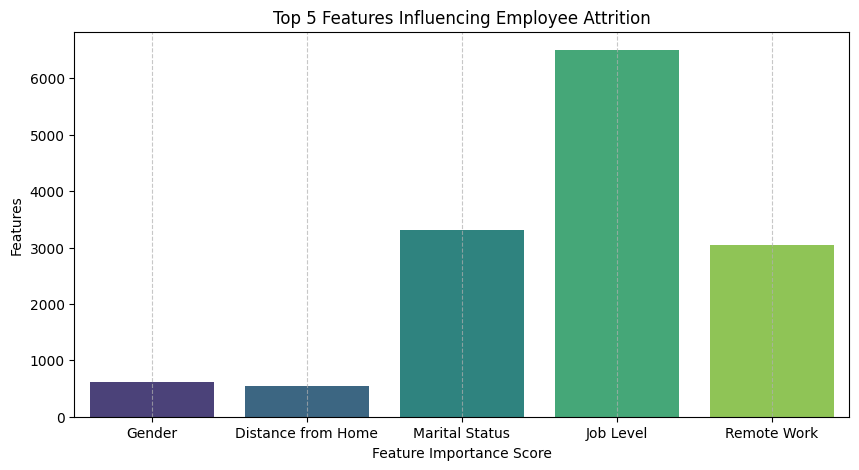

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=selected_features, y=select_kbest.scores_[select_kbest.get_support()], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 5 Features Influencing Employee Attrition")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

#### Kernel Density Estimation (KDE): Monthly Income Distribution

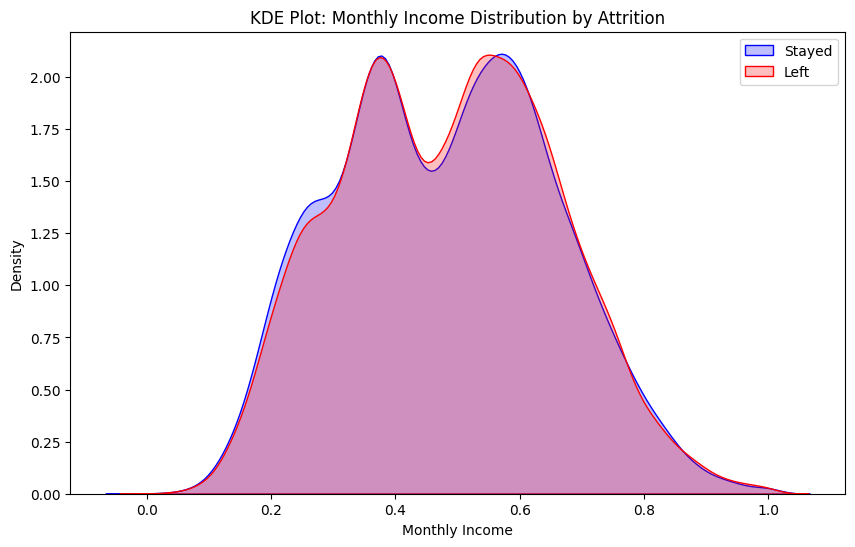

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df["Attrition"] == 0]["Monthly Income"], label="Stayed", shade=True, color="blue")
sns.kdeplot(df[df["Attrition"] == 1]["Monthly Income"], label="Left", shade=True, color="red")

plt.title("KDE Plot: Monthly Income Distribution by Attrition")
plt.xlabel("Monthly Income")
plt.ylabel("Density")
plt.legend()
plt.show()

### 📊 KDE Plot: Monthly Income Distribution by Attrition

The Kernel Density Estimate (KDE) plot is a useful tool for visualizing the distribution of **Monthly Income** across employees who **Stayed** vs. those who **Left** the company.

In this plot:
- **Blue curve** represents the distribution of **Monthly Income** for employees who stayed with the company (`Attrition = 0`).
- **Red curve** represents the distribution of **Monthly Income** for employees who left the company (`Attrition = 1`).

#### Key Insights:
- **Staying Employees (Blue Curve)**: The distribution appears to be more concentrated in the lower-middle range of salaries, which suggests that employees who stay are often those in moderate-income ranges.
- **Leaving Employees (Red Curve)**: The income distribution for employees who left is more spread out, with a noticeable peak in higher salary ranges. This might suggest that employees leaving the company could have better income expectations or find better opportunities elsewhere.

This KDE plot helps in understanding how salary relates to employee retention, providing valuable insights for HR teams to review salary structures, potentially leading to strategies to reduce attrition.

---


## Employee Patterns Across Multiple Attributes

In [ ]:
# Select key features
cols = ['Age', 'Monthly Income', 'Years at Company', 'Job Satisfaction', 'Performance Rating', 'Attrition']

# Convert categorical target to numerical for visualization
df['Attrition_Num'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Create parallel coordinates plot
fig = px.parallel_coordinates(df, dimensions=cols, color='Attrition_Num',
                              color_continuous_scale=px.colors.sequential.Viridis)
fig.show()

### 📊 Parallel Coordinates Plot: Key Features vs Attrition

The **Parallel Coordinates Plot** provides a way to visualize the relationships between multiple features and the **Attrition** status of employees. This plot displays the selected key features (Age, Monthly Income, Years at Company, Job Satisfaction, and Performance Rating) along parallel axes, with each line representing an individual employee. The color of the lines indicates whether the employee stayed or left the company, with a distinct color mapping to the **Attrition** status.

In this plot:
- The **color scale** (Viridis) represents the **Attrition** status, where **1** corresponds to employees who left the company, and **0** corresponds to employees who stayed.
- The axes represent different features:
  - **Age**: Employee's age.
  - **Monthly Income**: Employee's monthly salary.
  - **Years at Company**: Tenure of the employee in the company.
  - **Job Satisfaction**: Employee's job satisfaction level.
  - **Performance Rating**: The employee's performance rating.

#### Key Insights:
- **Job Satisfaction** and **Performance Rating** have a strong influence on **Attrition**: Employees with lower job satisfaction or lower performance ratings tend to leave the company more frequently.
- **Age** and **Years at Company**: The plot shows a clearer division of employees who stayed vs. left, with employees who have stayed for longer periods typically being older.
- **Monthly Income**: The income range doesn’t show a significant difference for attrition in this plot, indicating that salary may not be the primary factor for attrition in this dataset.

This visualization provides a clear, multi-dimensional view of how various factors interact with the attrition status, offering valuable insights for identifying potential retention strategies.

---


### Hierarchical Attrition Analysis

In [ ]:
fig = px.sunburst(df, path=['Job Role', 'Attrition'], values='Years at Company',
                  color='Attrition', color_discrete_map={'Yes': 'red', 'No': 'green'},
                  title="Attrition Breakdown by Job Role")
fig.show()


### 🌞 Sunburst Chart: Attrition Breakdown by Job Role

The **Sunburst Chart** provides an interactive visualization of how **Attrition** is distributed across different **Job Roles** within the company. It organizes the data into concentric rings, where each segment represents a category or subcategory of data. The size of each segment reflects the **Years at Company** for employees in that category.

#### Key Features:
- **Job Role**: Represents the different departments or roles within the company, such as Finance, Healthcare, Technology, etc.
- **Attrition**: Indicates whether employees have stayed or left the company, with each segment of the sunburst chart colored accordingly.
  - **Red** indicates employees who have left the company.
  - **Green** indicates employees who have stayed with the company.
- **Years at Company**: The size of each segment represents the total years worked by employees within each specific **Job Role** and **Attrition** category.

#### Key Insights:
- The **Job Role** with the highest **Attrition** rate can be identified by examining the red segments in the sunburst chart.
- The distribution of **Years at Company** within each job role gives a sense of employee tenure across different departments.
- The chart allows for easy identification of areas where retention strategies may be needed, particularly in departments or roles with higher attrition.

This chart serves as a powerful tool for HR and management to understand employee retention patterns across job roles and better strategize retention initiatives.

---


### Pairplot of Age, Years at Company, Monthly Income, and Job Level

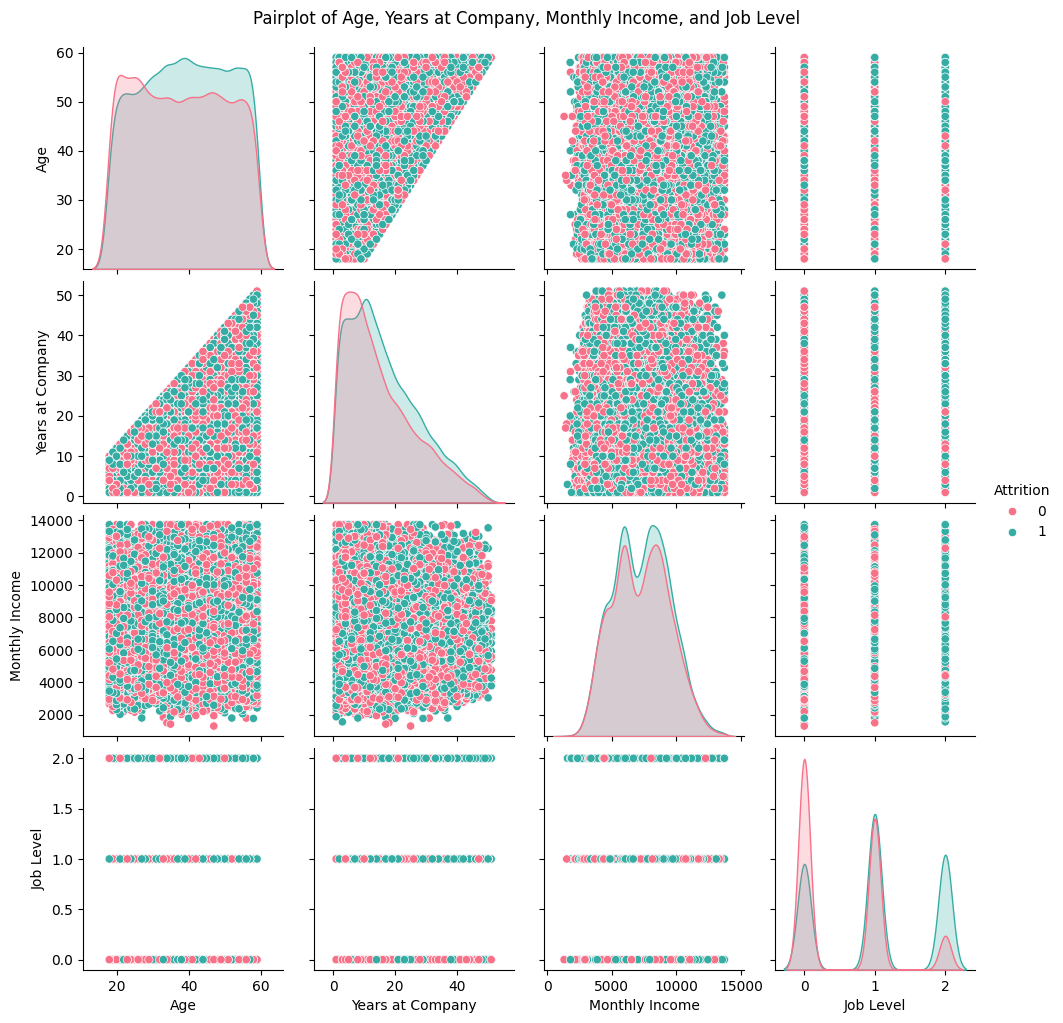

In [ ]:
# Selecting relevant numerical features
num_features = ['Age', 'Years at Company', 'Monthly Income', 'Job Level']

# Creating pairplot with hue based on Attrition
sns.pairplot(df[num_features + ['Attrition']], hue="Attrition", palette="husl", diag_kind="kde")
plt.suptitle("Pairplot of Age, Years at Company, Monthly Income, and Job Level", y=1.02)
plt.show()

### 🔍 Pairplot: Visualizing Relationships Between Key Numerical Features

The **Pairplot** is a powerful visualization tool that helps explore the relationships between multiple numerical features and how they correlate with the **Attrition** status. In this plot, we examine the following numerical features:

- **Age**: The age of the employee.
- **Years at Company**: The total number of years the employee has worked at the company.
- **Monthly Income**: The employee’s monthly salary.
- **Job Level**: The level of the employee's role within the company (e.g., entry, mid, senior).

#### Key Features:
- **Hue by Attrition**: The pairplot uses the **Attrition** column to differentiate employees who have **Stayed** versus those who have **Left** the company. This is represented using two distinct colors.
  - **Stayed (Green)**: Employees who have not left the company.
  - **Left (Red)**: Employees who have left the company.
- **Diagonal KDE plots**: The diagonal of the pairplot contains **Kernel Density Estimation (KDE)** plots for each feature to visualize the distribution of values for **Age**, **Years at Company**, **Monthly Income**, and **Job Level** for both **Stayed** and **Left** employees.
- **Off-diagonal scatter plots**: The scatter plots off the diagonal show the relationships between each pair of features, giving insights into how these features interact with one another in relation to **Attrition**.

#### Key Insights:
- **Age vs. Attrition**: You may observe how the age distribution differs for employees who stayed versus those who left.
- **Years at Company vs. Monthly Income**: This scatter plot could indicate a positive correlation between tenure and income, with employees who stay longer often earning higher salaries.
- **Job Level vs. Attrition**: The job level may help identify if employees at certain levels tend to leave more frequently, suggesting areas where retention strategies may be most needed.

By visualizing these relationships, HR and management can identify potential trends and factors influencing employee retention, guiding future decision-making processes to improve retention strategies.

---


### Attrition Trend Over Time

In [ ]:
fig = px.scatter(df, x='Age', y='Monthly Income', animation_frame='Years at Company',
                 color='Attrition', size='Performance Rating',
                 title="Attrition Trend Over Time")
fig.show()


### 📊 Animated Scatter Plot: Attrition Trend Over Time

The **Animated Scatter Plot** visualizes the relationship between **Age** and **Monthly Income** with an added temporal dimension, showing how these factors evolve over time, segmented by **Attrition** status. This plot helps track the trend of employee attrition with respect to the following key attributes:

#### Key Features:
- **X-Axis - Age**: Represents the age of the employee.
- **Y-Axis - Monthly Income**: Represents the employee's monthly income.
- **Color - Attrition**: Employees who have **Left** the company are shown in **red**, and those who have **Stayed** are shown in **blue**.
- **Size - Performance Rating**: The size of the marker represents the employee's performance rating, providing an additional dimension to the data.
- **Animation Frame - Years at Company**: The plot is animated over the **Years at Company**, showing how **Age**, **Monthly Income**, **Attrition**, and **Performance Rating** evolve over different years of tenure.

#### Key Insights:
- **Attrition Trends Over Time**: The animation allows us to observe how attrition trends evolve over the years and whether certain age groups or income brackets are more likely to leave the company during specific years.
- **Age and Monthly Income**: You may notice the clustering of employees based on their **Age** and **Monthly Income**, with certain years showing higher attrition in specific groups.
- **Performance Rating's Influence**: The size of the markers offers insights into whether higher-performing employees (larger markers) are more likely to stay or leave, potentially indicating a need for better retention strategies for top performers.

#### Conclusion:
This animation provides a dynamic view of how **Attrition** correlates with **Age**, **Monthly Income**, and **Performance Rating** over time, helping to uncover patterns that can inform strategies to reduce attrition and improve employee satisfaction.

---


In [ ]:
# Define the file path for the final cleaned and edited dataset
final_dataset_path = "before_any_thing.csv"

# Save the dataset to a new CSV file without the index column
df.to_csv(final_dataset_path, index=False)

print(f"Dataset successfully saved as {final_dataset_path}")

Dataset successfully saved as before_any_thing.csv


## **Model Development and Optimization**

#### **Define Featuers X and Target y**

In [ ]:
# Load the before any thing dataset
df = pd.read_csv('/content/before_any_thing.csv')
X = df.drop(columns=['Attrition'])
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

FileNotFoundError: [Errno 2] No such file or directory: '/content/before_any_thing.csv'

### **Model Evaluation**

In [ ]:
# Function to train and evaluate models
def evaluate_model(model, model_name, X_train, y_train, X_test, y_test, cv=5):

    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
    print(f'Performance of {model_name} ({cv}-Fold Cross Validation):')
    print(f'ROC-AUC Scores: {cv_scores}')
    print(f'Average ROC-AUC: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}\n')

    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    cm = confusion_matrix(y_test, y_pred)

    print(f'Performance of {model_name}:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-score: {f1:.4f}')
    print(f'ROC-AUC: {roc_auc:.4f}')
    print(f'Confusion Matrix:\n{cm}\n')

    # Plot ROC curve
    plot_roc_curve(y_test, y_pred_proba, model_name)

    # Plot confusion matrix
    plot_confusion_matrix(cm, model_name)


    # Store results in a DataFrame (for tables)
    results_df = pd.DataFrame({
        'Model': [model_name],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1-Score': [f1],
        'ROC-AUC': [roc_auc]
    })

    return results_df  # Return only the DataFrame

In [ ]:
# Function to plot ROC curve
def plot_roc_curve(y_true, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_true, y_pred_proba):.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()


In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

In [ ]:
# Train Models
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1])),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'Bagging': BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced')),
    'Extra Trees': ExtraTreesClassifier(class_weight='balanced'),
    'AdaBoost': AdaBoostClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0, scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1])),
    'LightGBM': LGBMClassifier(class_weight='balanced'),
}


###Metrics Before Any Thing

Performance of Logistic Regression (5-Fold Cross Validation):
ROC-AUC Scores: [0.79563001 0.78822516 0.78718391 0.78623572 0.80147885]
Average ROC-AUC: 0.7918 ± 0.0059

Performance of Logistic Regression:
Accuracy: 0.7119
Precision: 0.7344
Recall: 0.7062
F1-score: 0.7200
ROC-AUC: 0.7917
Confusion Matrix:
[[4071 1597]
 [1837 4415]]



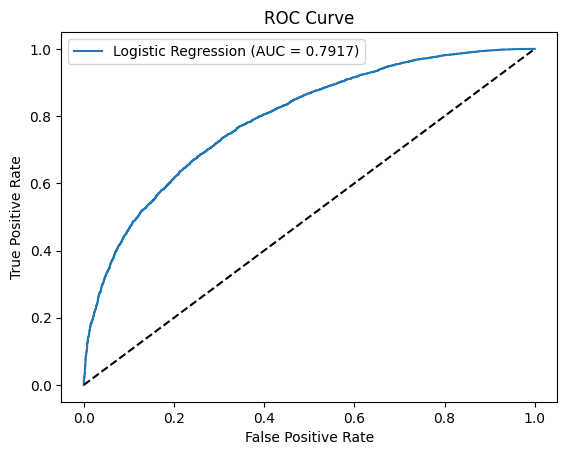

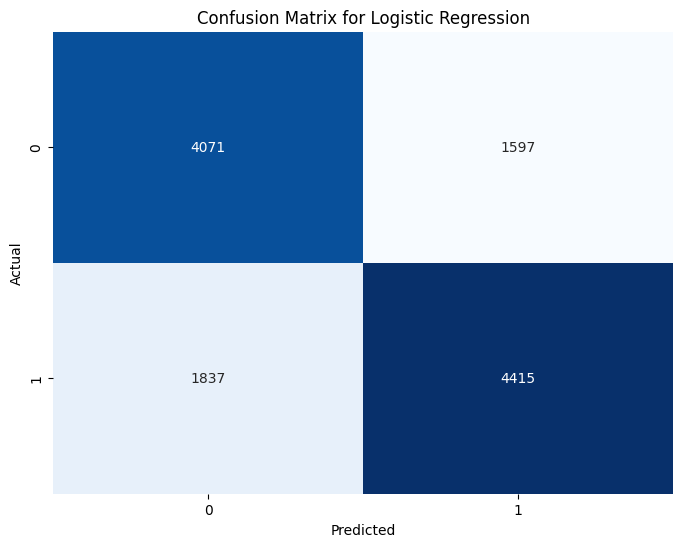

Performance of Random Forest (5-Fold Cross Validation):
ROC-AUC Scores: [0.84094557 0.83021938 0.83163745 0.83052956 0.87720557]
Average ROC-AUC: 0.8421 ± 0.0180

Performance of Random Forest:
Accuracy: 0.7410
Precision: 0.7563
Recall: 0.7470
F1-score: 0.7516
ROC-AUC: 0.8294
Confusion Matrix:
[[4163 1505]
 [1582 4670]]



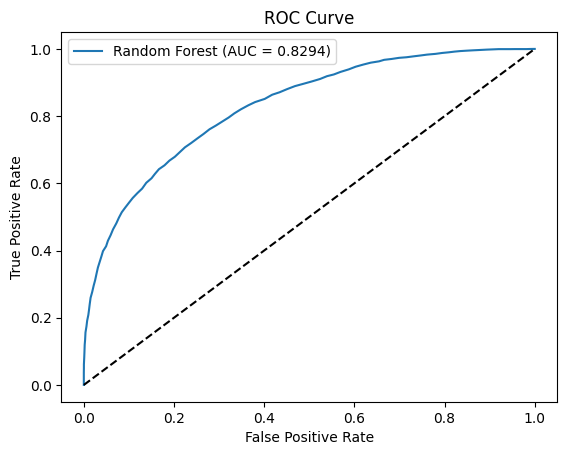

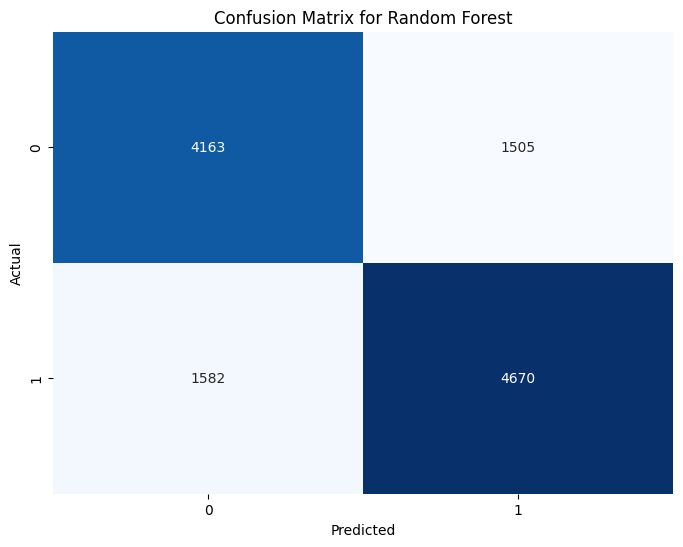

Performance of Gradient Boosting (5-Fold Cross Validation):
ROC-AUC Scores: [0.85454085 0.84317105 0.84518202 0.84411394 0.85363955]
Average ROC-AUC: 0.8481 ± 0.0049

Performance of Gradient Boosting:
Accuracy: 0.7572
Precision: 0.7735
Recall: 0.7594
F1-score: 0.7664
ROC-AUC: 0.8458
Confusion Matrix:
[[4278 1390]
 [1504 4748]]



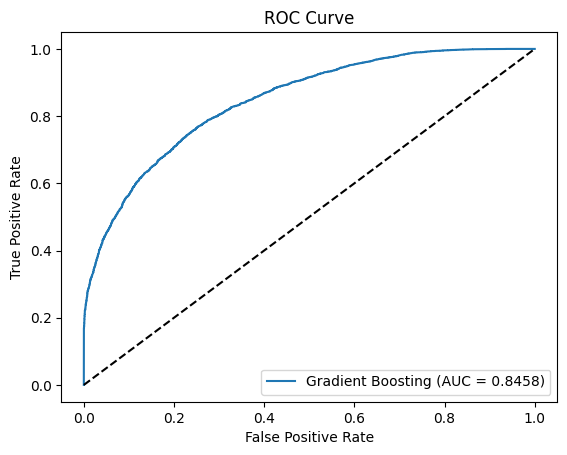

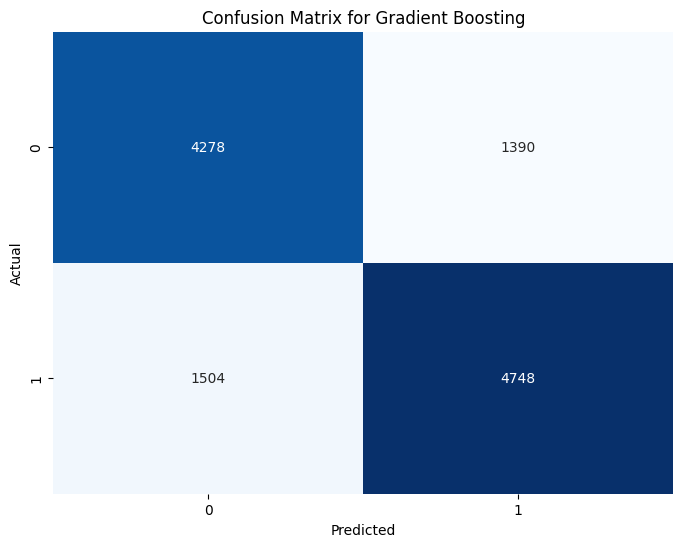

Performance of XGBoost (5-Fold Cross Validation):
ROC-AUC Scores: [0.8440599  0.8322569  0.83562554 0.83468668 0.84447293]
Average ROC-AUC: 0.8382 ± 0.0051

Performance of XGBoost:
Accuracy: 0.7488
Precision: 0.7696
Recall: 0.7438
F1-score: 0.7565
ROC-AUC: 0.8378
Confusion Matrix:
[[4276 1392]
 [1602 4650]]



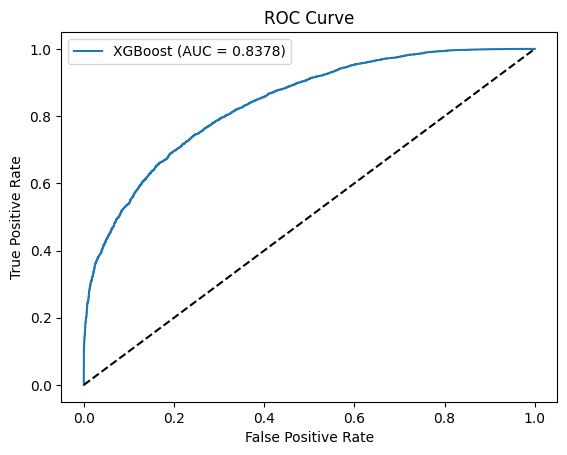

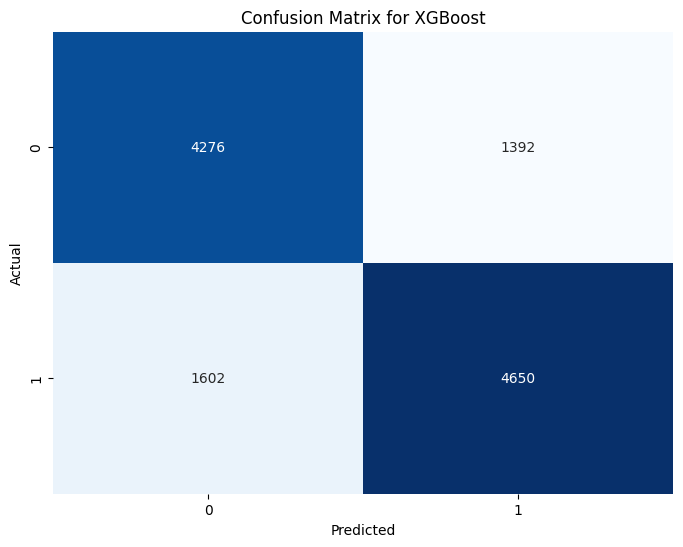

Performance of KNN (5-Fold Cross Validation):
ROC-AUC Scores: [0.74004225 0.72991759 0.72554969 0.73024945 0.77651329]
Average ROC-AUC: 0.7405 ± 0.0186

Performance of KNN:
Accuracy: 0.6618
Precision: 0.6910
Recall: 0.6427
F1-score: 0.6659
ROC-AUC: 0.7188
Confusion Matrix:
[[3871 1797]
 [2234 4018]]



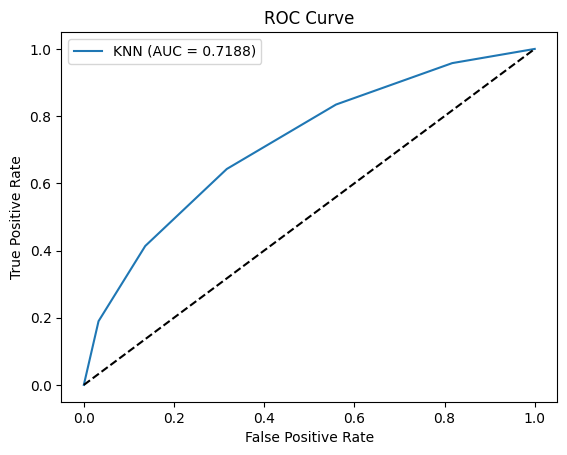

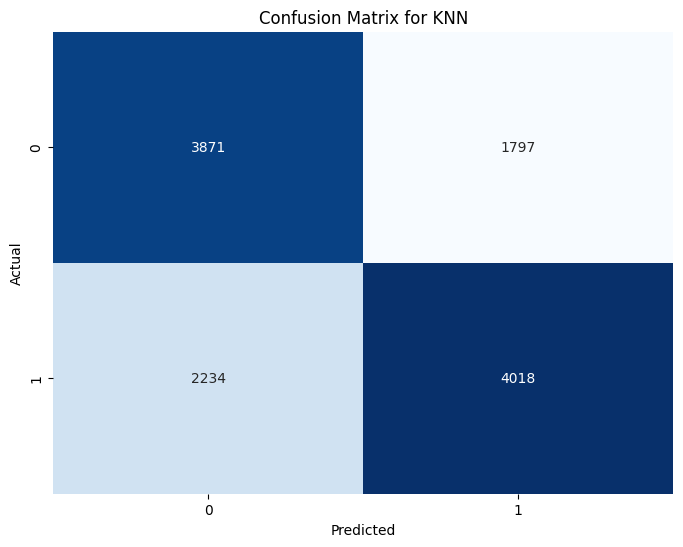

Performance of Decision Tree (5-Fold Cross Validation):
ROC-AUC Scores: [0.66673331 0.66749787 0.65610179 0.65930369 0.70528409]
Average ROC-AUC: 0.6710 ± 0.0177

Performance of Decision Tree:
Accuracy: 0.6671
Precision: 0.6841
Recall: 0.6787
F1-score: 0.6814
ROC-AUC: 0.6665
Confusion Matrix:
[[3709 1959]
 [2009 4243]]



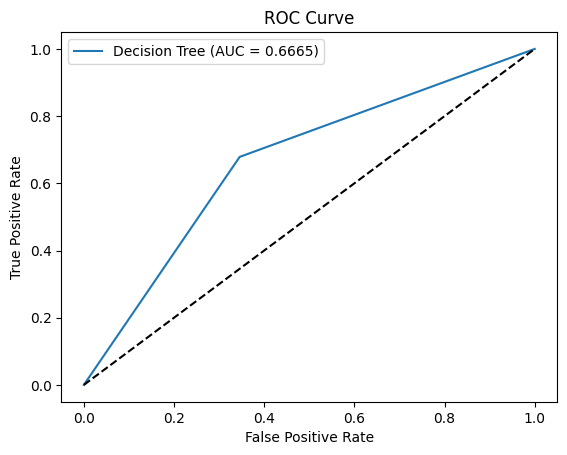

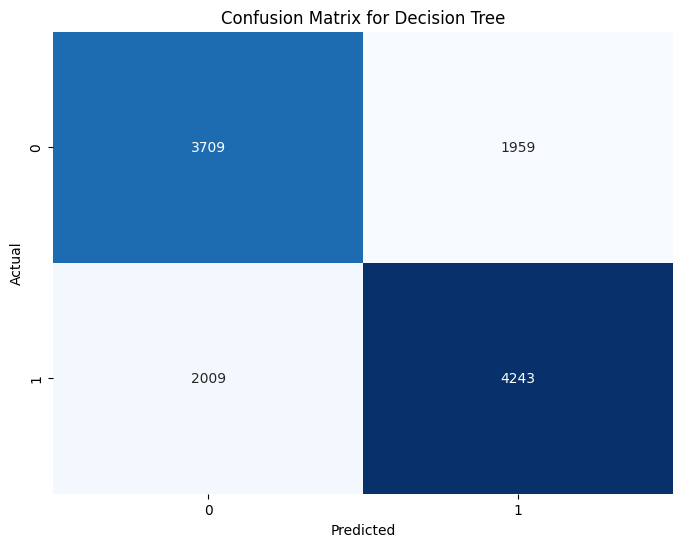

Performance of Bagging (5-Fold Cross Validation):
ROC-AUC Scores: [0.80331832 0.79090653 0.79166965 0.78834975 0.83118788]
Average ROC-AUC: 0.8011 ± 0.0159

Performance of Bagging:
Accuracy: 0.7134
Precision: 0.7535
Recall: 0.6742
F1-score: 0.7116
ROC-AUC: 0.7927
Confusion Matrix:
[[4289 1379]
 [2037 4215]]



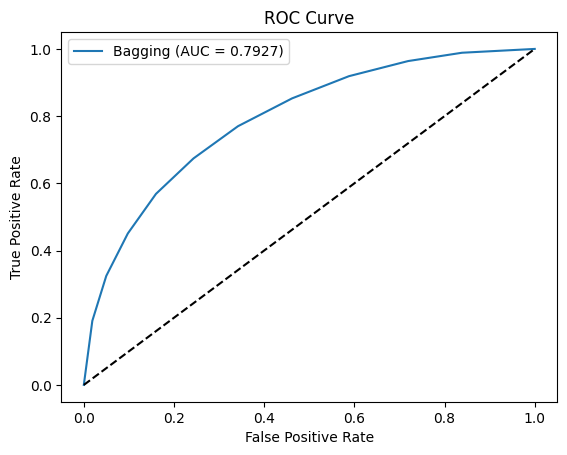

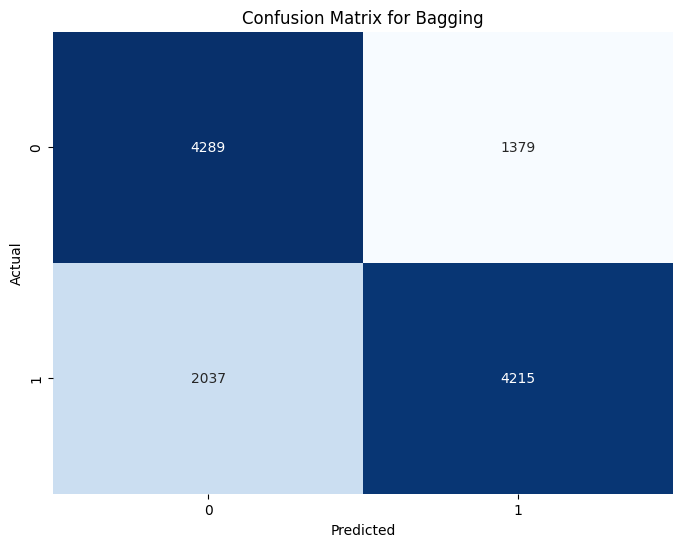

Performance of Extra Trees (5-Fold Cross Validation):
ROC-AUC Scores: [0.8410529  0.8347579  0.8323149  0.83139658 0.88573121]
Average ROC-AUC: 0.8451 ± 0.0206

Performance of Extra Trees:
Accuracy: 0.7403
Precision: 0.7535
Recall: 0.7502
F1-score: 0.7518
ROC-AUC: 0.8254
Confusion Matrix:
[[4134 1534]
 [1562 4690]]



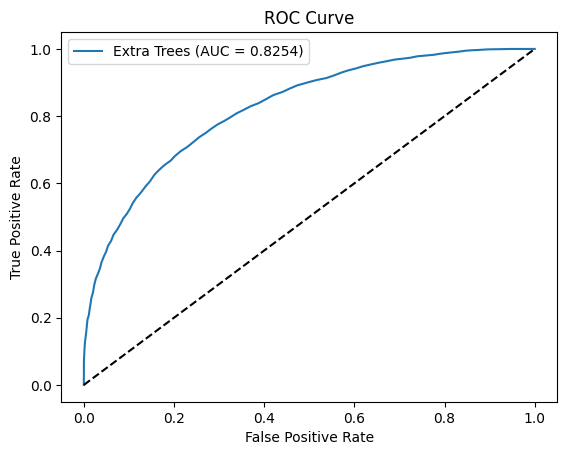

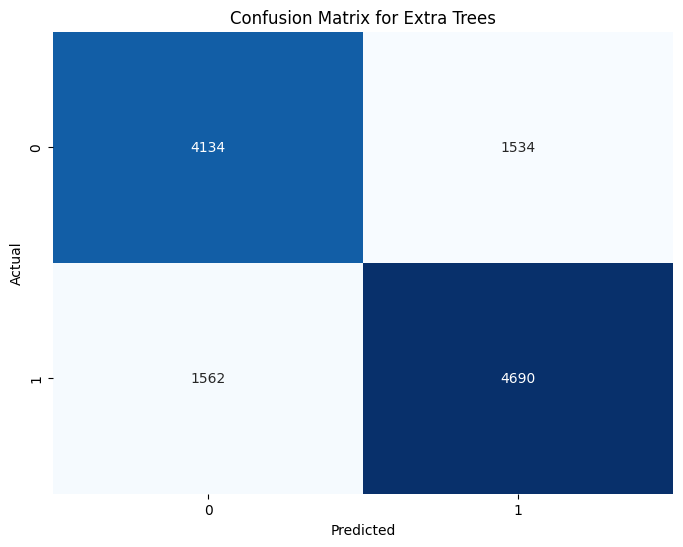

Performance of AdaBoost (5-Fold Cross Validation):
ROC-AUC Scores: [0.85404311 0.84497679 0.84401768 0.84397435 0.85236645]
Average ROC-AUC: 0.8479 ± 0.0044

Performance of AdaBoost:
Accuracy: 0.7549
Precision: 0.7674
Recall: 0.7642
F1-score: 0.7658
ROC-AUC: 0.8455
Confusion Matrix:
[[4220 1448]
 [1474 4778]]



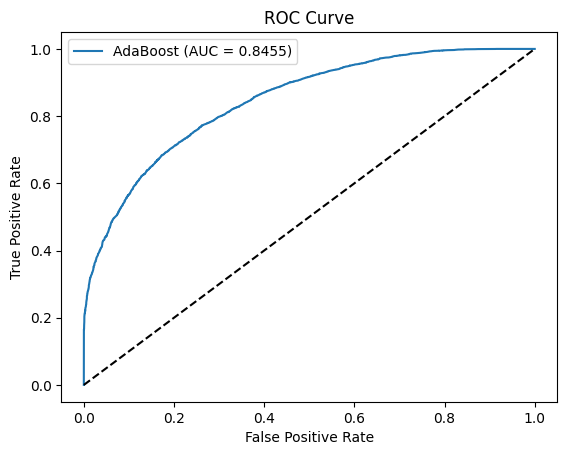

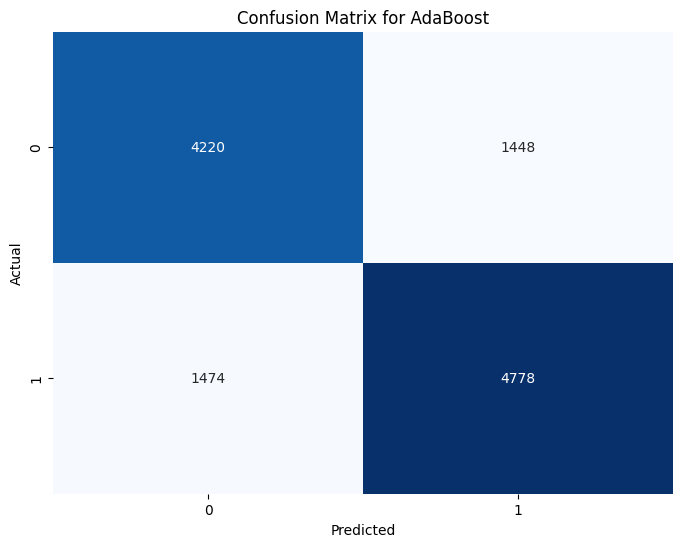

Performance of CatBoost (5-Fold Cross Validation):
ROC-AUC Scores: [0.85491657 0.84409476 0.84632662 0.84542864 0.86030351]
Average ROC-AUC: 0.8502 ± 0.0063

Performance of CatBoost:
Accuracy: 0.7581
Precision: 0.7783
Recall: 0.7532
F1-score: 0.7656
ROC-AUC: 0.8469
Confusion Matrix:
[[4327 1341]
 [1543 4709]]



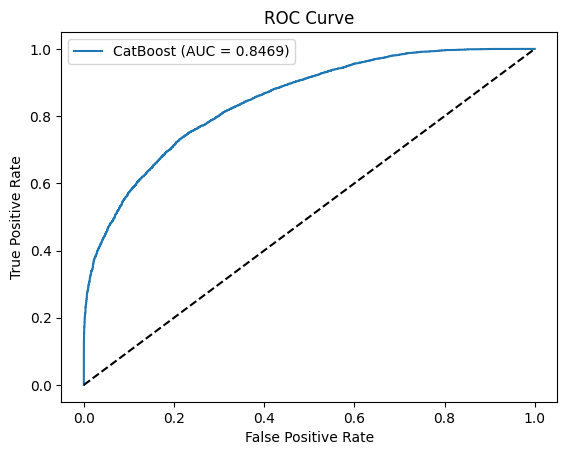

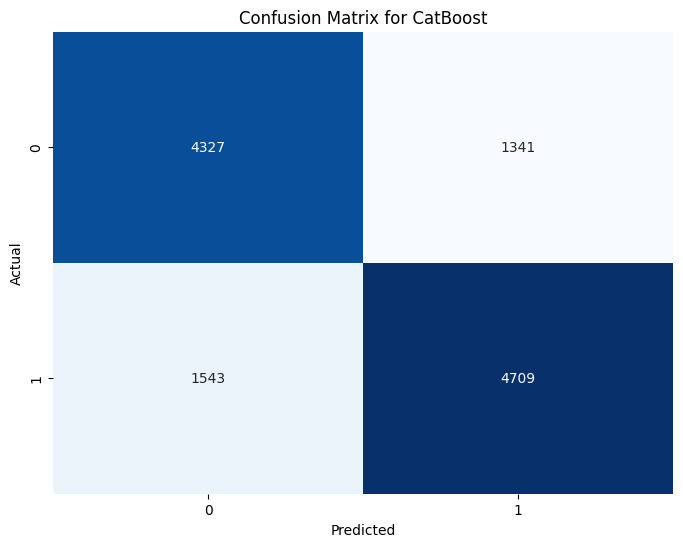

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 20006, number of negative: 20006
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004966 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4528
[LightGBM] [Info] Number of data points in the train set: 40012, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 20006, number of negative: 20007
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4528
[Light

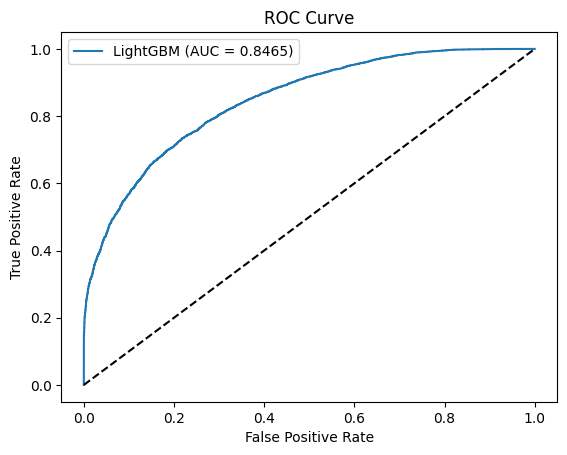

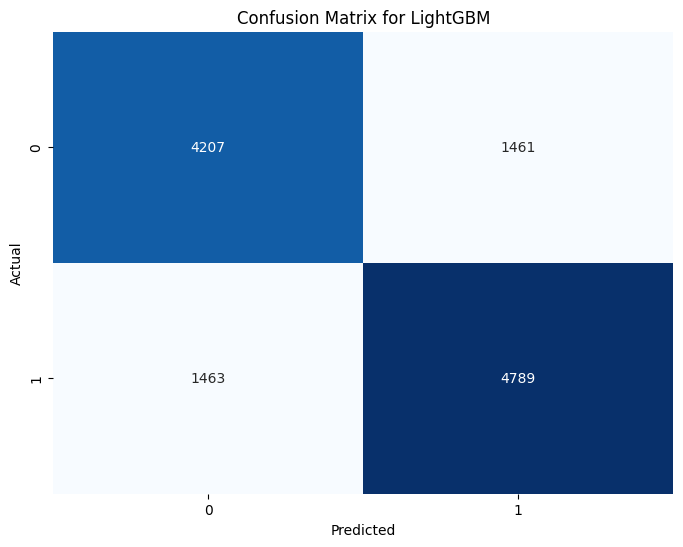

In [ ]:
metrics_before_any_thing = pd.DataFrame()

for name, model in models.items():
    results = evaluate_model(model, name, X_train_resampled, y_train_resampled, X_test, y_test)
    metrics_before_any_thing = pd.concat([metrics_before_any_thing, results], ignore_index=True)

###Metrics Before Feature Engineering

In [ ]:
# Load the After feature engineering dataset
df = pd.read_csv('/content/Final_Cleaned_Dataset.csv')
X = df.drop(columns=['Attrition'])  # Features
y = df['Attrition']  # Target

#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Performance of Logistic Regression (5-Fold Cross Validation):
ROC-AUC Scores: [0.76448565 0.74793406 0.76094018 0.75384259 0.73467606]
Average ROC-AUC: 0.7524 ± 0.0105

Performance of Logistic Regression:
Accuracy: 0.6953
Precision: 0.7109
Recall: 0.7063
F1-score: 0.7086
ROC-AUC: 0.7639
Confusion Matrix:
[[3872 1796]
 [1836 4416]]



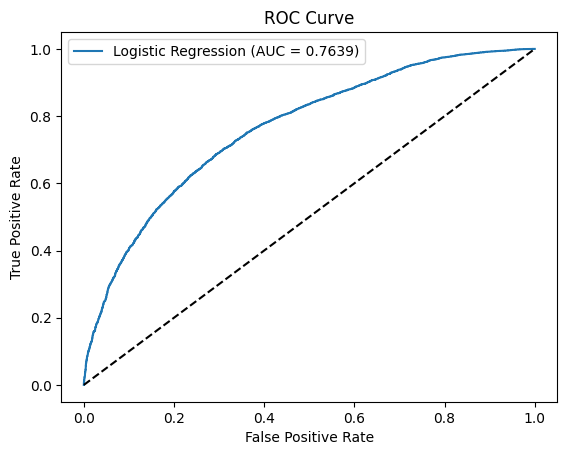

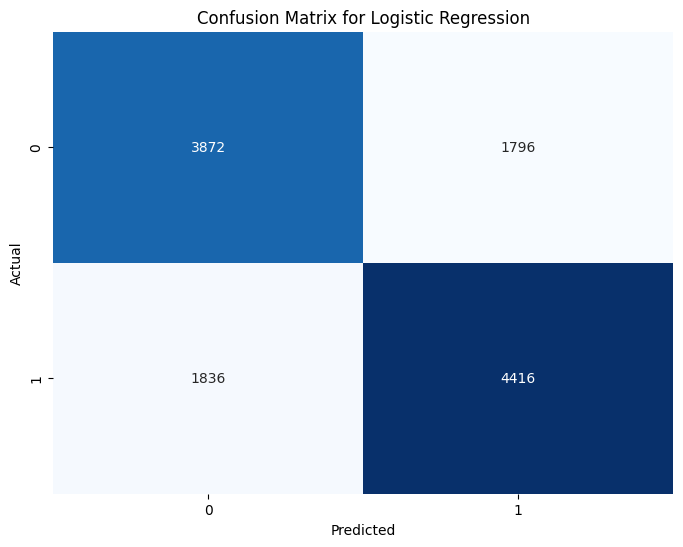

Performance of Random Forest (5-Fold Cross Validation):
ROC-AUC Scores: [0.79308896 0.78595309 0.79002548 0.78072858 0.78444477]
Average ROC-AUC: 0.7868 ± 0.0043

Performance of Random Forest:
Accuracy: 0.7061
Precision: 0.7279
Recall: 0.7022
F1-score: 0.7148
ROC-AUC: 0.7880
Confusion Matrix:
[[4027 1641]
 [1862 4390]]



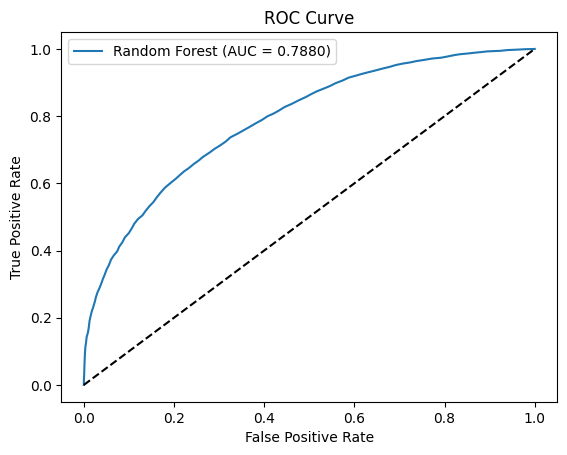

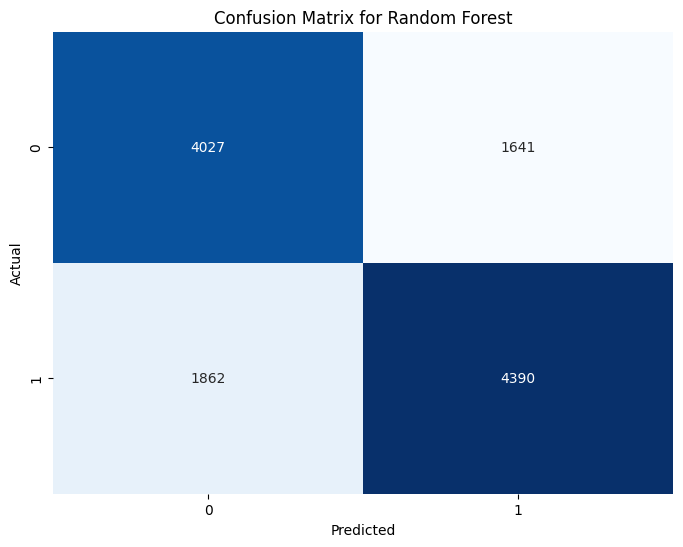

Performance of Gradient Boosting (5-Fold Cross Validation):
ROC-AUC Scores: [0.81645994 0.80792938 0.8142652  0.80690307 0.79427363]
Average ROC-AUC: 0.8080 ± 0.0078

Performance of Gradient Boosting:
Accuracy: 0.7333
Precision: 0.7604
Recall: 0.7177
F1-score: 0.7384
ROC-AUC: 0.8161
Confusion Matrix:
[[4254 1414]
 [1765 4487]]



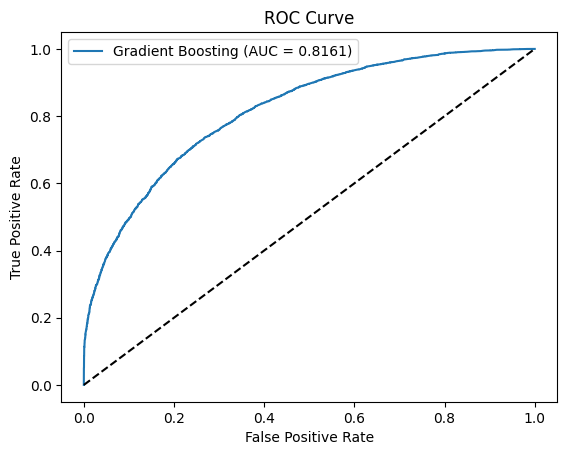

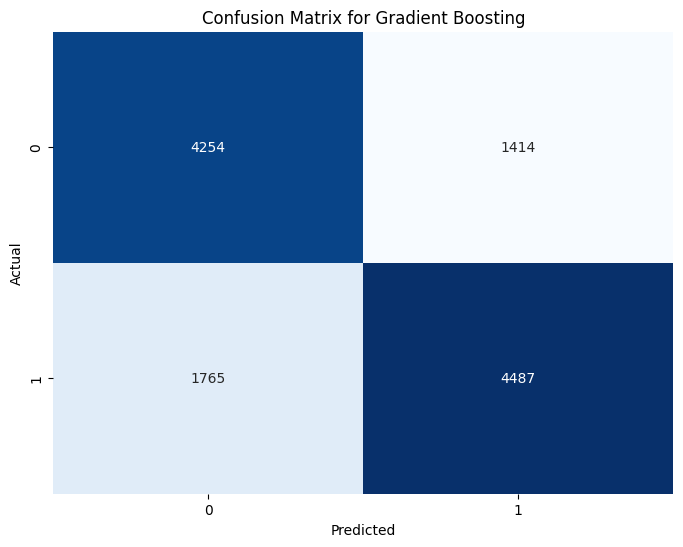

Performance of XGBoost (5-Fold Cross Validation):
ROC-AUC Scores: [0.80407881 0.79854841 0.80444317 0.79578728 0.787892  ]
Average ROC-AUC: 0.7981 ± 0.0061

Performance of XGBoost:
Accuracy: 0.7247
Precision: 0.7522
Recall: 0.7086
F1-score: 0.7298
ROC-AUC: 0.8074
Confusion Matrix:
[[4209 1459]
 [1822 4430]]



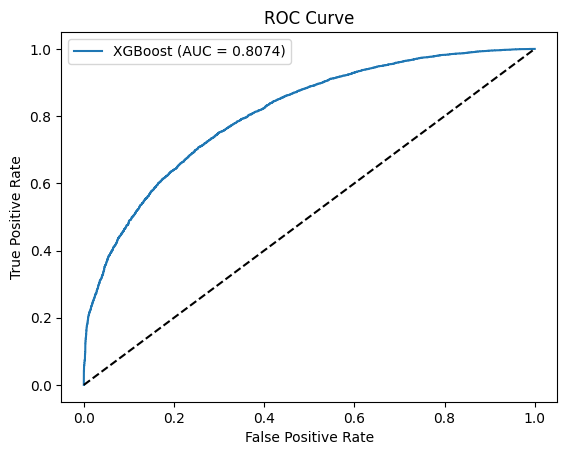

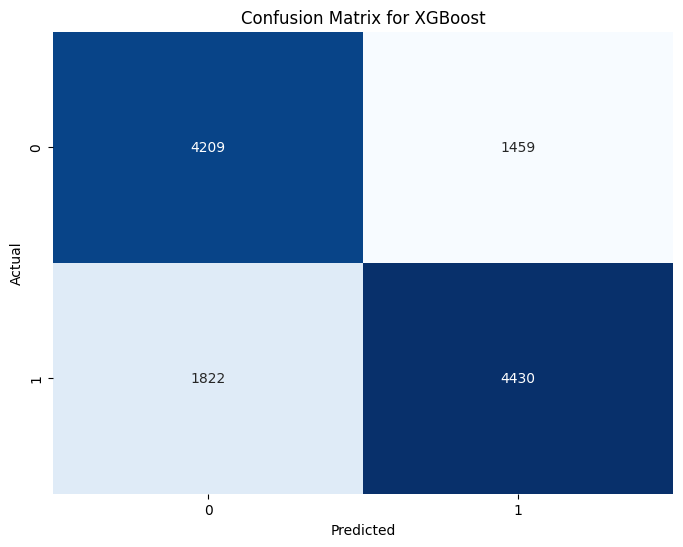

Performance of KNN (5-Fold Cross Validation):
ROC-AUC Scores: [0.62103341 0.60696741 0.62634982 0.62353539 0.66332425]
Average ROC-AUC: 0.6282 ± 0.0188

Performance of KNN:
Accuracy: 0.5753
Precision: 0.5993
Recall: 0.5744
F1-score: 0.5866
ROC-AUC: 0.6011
Confusion Matrix:
[[3267 2401]
 [2661 3591]]



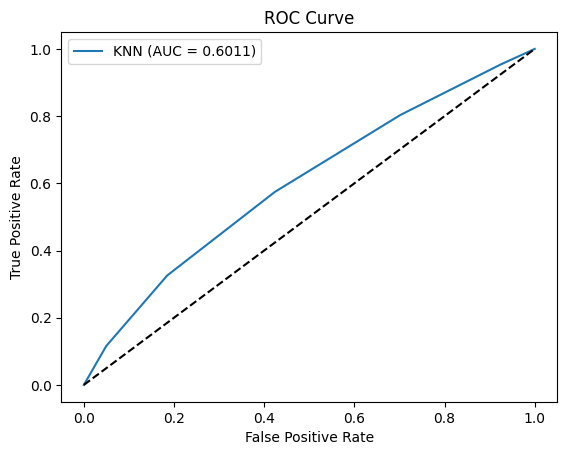

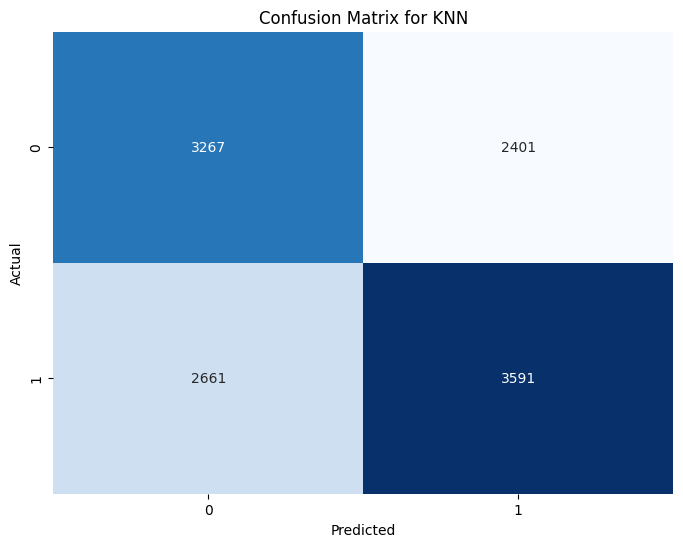

Performance of Decision Tree (5-Fold Cross Validation):
ROC-AUC Scores: [0.64154338 0.63720802 0.64010634 0.63960896 0.63241042]
Average ROC-AUC: 0.6382 ± 0.0032

Performance of Decision Tree:
Accuracy: 0.6396
Precision: 0.6592
Recall: 0.6478
F1-score: 0.6534
ROC-AUC: 0.6391
Confusion Matrix:
[[3574 2094]
 [2202 4050]]



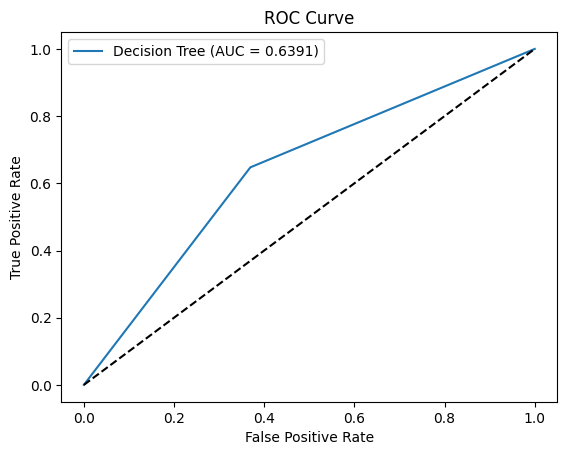

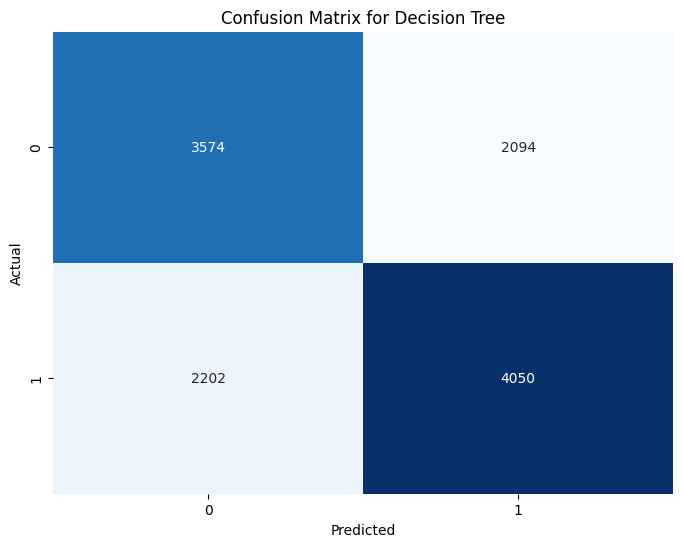

Performance of Bagging (5-Fold Cross Validation):
ROC-AUC Scores: [0.76293583 0.75453558 0.75716932 0.75185029 0.7462269 ]
Average ROC-AUC: 0.7545 ± 0.0055

Performance of Bagging:
Accuracy: 0.6815
Precision: 0.7223
Recall: 0.6379
F1-score: 0.6775
ROC-AUC: 0.7591
Confusion Matrix:
[[4135 1533]
 [2264 3988]]



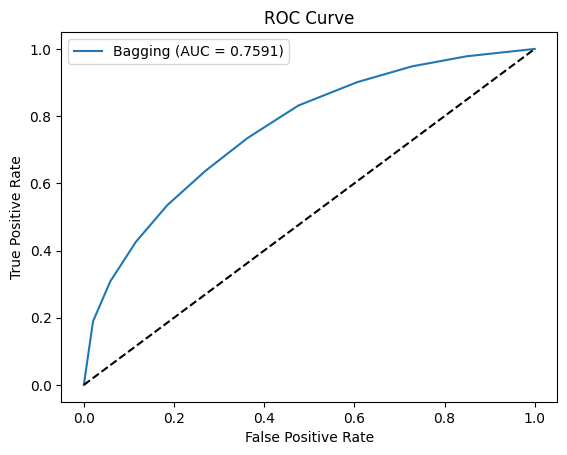

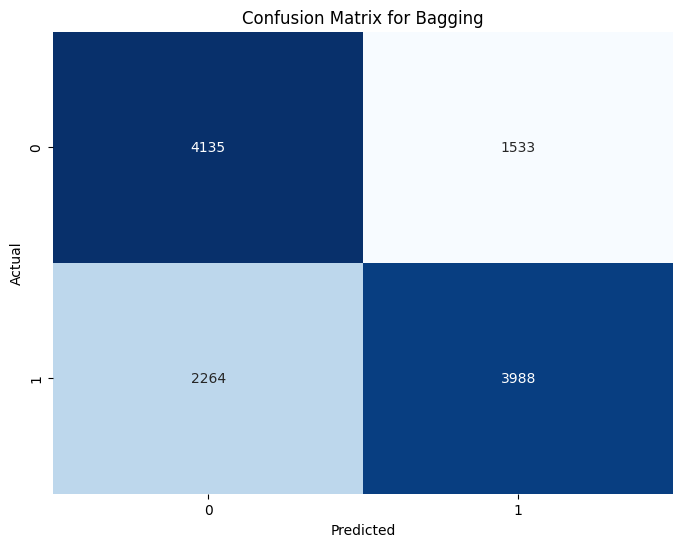

Performance of Extra Trees (5-Fold Cross Validation):
ROC-AUC Scores: [0.78168776 0.77094559 0.77813402 0.76821649 0.7788953 ]
Average ROC-AUC: 0.7756 ± 0.0051

Performance of Extra Trees:
Accuracy: 0.6965
Precision: 0.7164
Recall: 0.6974
F1-score: 0.7068
ROC-AUC: 0.7778
Confusion Matrix:
[[3942 1726]
 [1892 4360]]



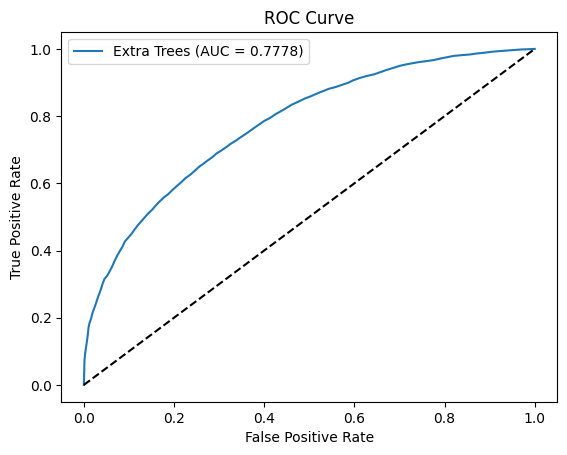

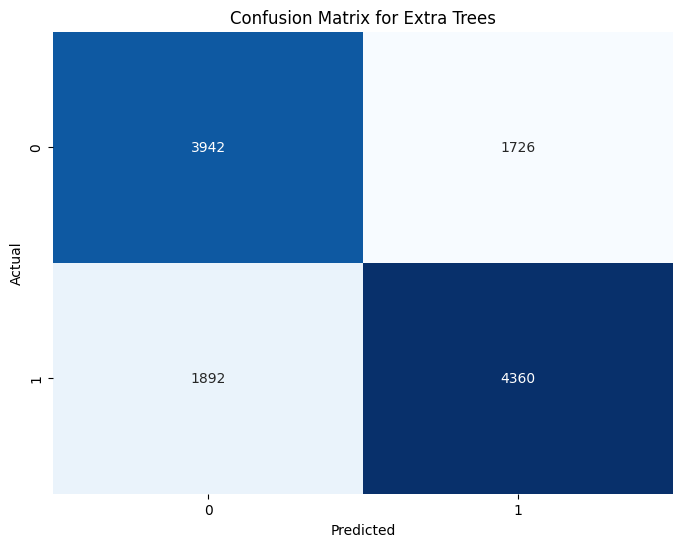

Performance of AdaBoost (5-Fold Cross Validation):
ROC-AUC Scores: [0.81687997 0.80911117 0.81393855 0.80720024 0.79476977]
Average ROC-AUC: 0.8084 ± 0.0076

Performance of AdaBoost:
Accuracy: 0.7314
Precision: 0.7607
Recall: 0.7118
F1-score: 0.7354
ROC-AUC: 0.8156
Confusion Matrix:
[[4268 1400]
 [1802 4450]]



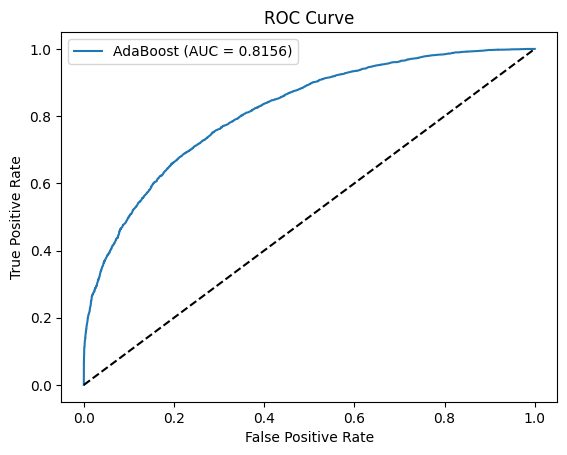

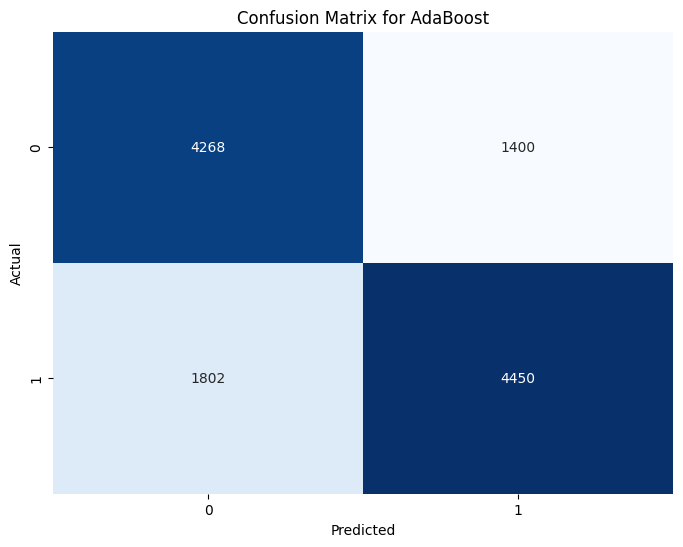

Performance of CatBoost (5-Fold Cross Validation):
ROC-AUC Scores: [0.81287825 0.8059644  0.81259786 0.80476228 0.79515153]
Average ROC-AUC: 0.8063 ± 0.0065

Performance of CatBoost:
Accuracy: 0.7306
Precision: 0.7589
Recall: 0.7129
F1-score: 0.7352
ROC-AUC: 0.8131
Confusion Matrix:
[[4252 1416]
 [1795 4457]]



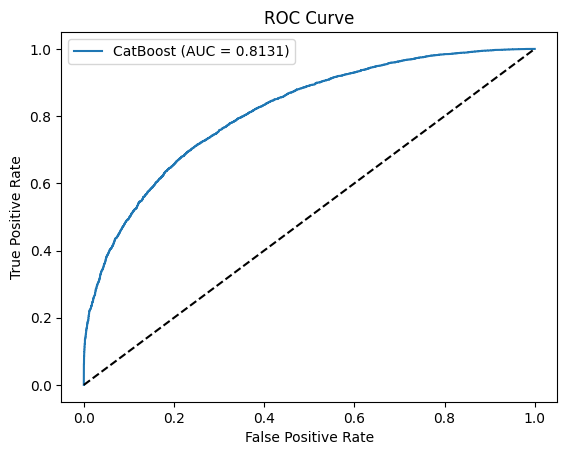

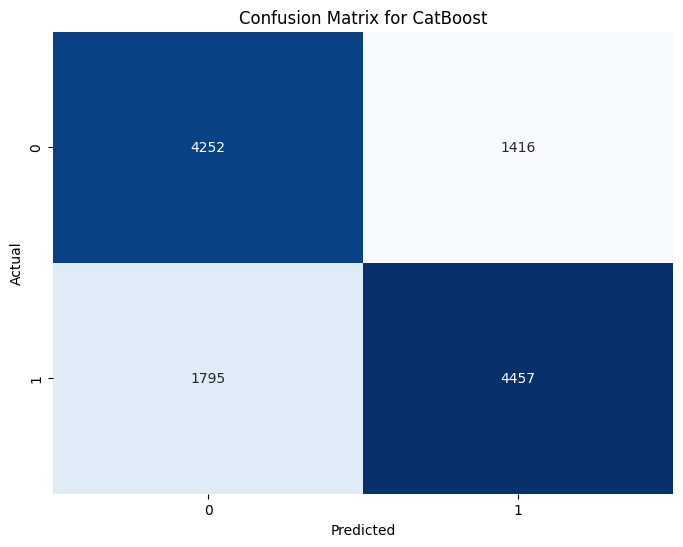

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 20006, number of negative: 20006
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1271
[LightGBM] [Info] Number of data points in the train set: 40012, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 20006, number of negative: 20007
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003595 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1272
[Light

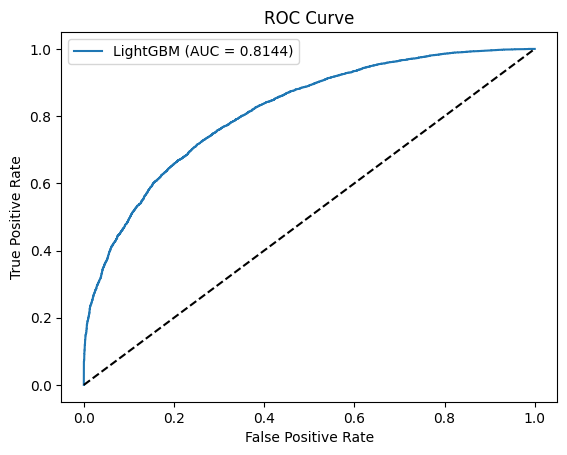

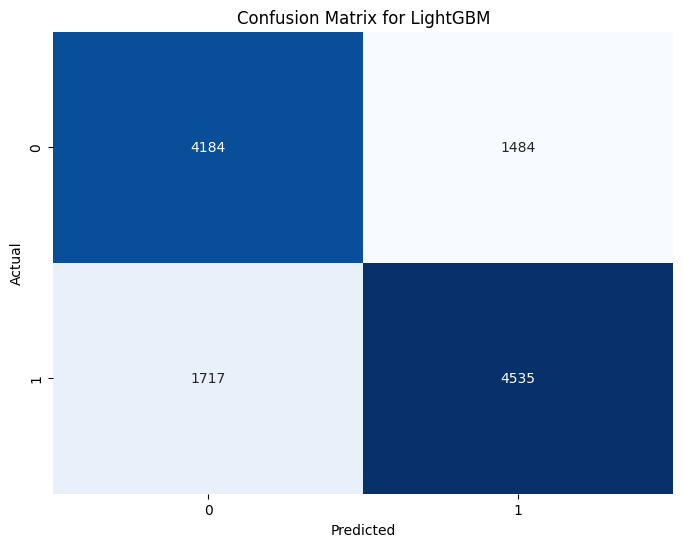

In [ ]:
metrics_before_feature_engineering = pd.DataFrame()

for name, model in models.items():
    results = evaluate_model(model, name, X_train_resampled, y_train_resampled, X_test, y_test)
    metrics_before_feature_engineering = pd.concat([metrics_before_feature_engineering, results], ignore_index=True)

###Metrics After Feature Engineering

In [ ]:
df=pd.read_csv('/content/train.csv')
# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

# Label Encoding for ordinal categories
ordinal_features = ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition']

# Apply Label Encoding
label_encoders = {}
for col in ordinal_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for future decoding

# One-Hot Encoding for nominal categories
df = pd.get_dummies(df, columns=[col for col in cat_cols if col not in ordinal_features], drop_first=True)
# Select only numerical columns
num_cols = df.select_dtypes(include=['number']).columns

# Apply Min-Max Scaling
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
# 1️⃣ Salary-to-Performance Ratio
df["Salary_Performance_Ratio"] = df["Monthly Income"] / (df["Performance Rating"] + 1)  # Avoid division by zero

# 2️⃣ Categorizing Tenure into Groups
def tenure_category(years):
    if years < 2:
        return "Short-Term"
    elif 2 <= years < 5:
        return "Medium-Term"
    else:
        return "Long-Term"

df["Tenure_Group"] = df["Years at Company"].apply(tenure_category)

# Encode Tenure Groups
tenure_mapping = {"Short-Term": 1, "Medium-Term": 2, "Long-Term": 3}
df["Tenure_Group"] = df["Tenure_Group"].map(tenure_mapping)
# 3️⃣ Interaction Feature: Work-Life Balance & Job Satisfaction
df["WorkLife_Satisfaction_Score"] = df["Work-Life Balance"] * df["Job Satisfaction"]

# 4️⃣ Normalized Income Based on Job Level
df["Income_JobLevel_Ratio"] = df["Monthly Income"] / (df["Job Level"] + 1)  # Avoid division by zero

# Display first few rows
df.head()

Employee ID       Age  Gender  Years at Company  Job Role  Monthly Income  \
0     0.112877  0.317073     1.0              0.36      0.00        0.274658   
1     0.869230  1.000000     0.0              0.06      0.75        0.284366   
2     0.406137  0.146341     0.0              0.18      0.50        0.461336   
3     0.883123  0.439024     0.0              0.12      0.00        0.180206   
4     0.872854  0.926829     1.0              0.80      0.00        0.236297   

   Work-Life Balance  Job Satisfaction  Performance Rating  \
0           0.000000          0.666667            0.000000   
1           1.000000          0.000000            1.000000   
2           0.666667          0.000000            1.000000   
3           0.666667          0.000000            0.666667   
4           0.333333          1.000000            0.000000   

   Number of Promotions  ...  Remote Work  Leadership Opportunities  \
0                  0.50  ...          0.0                       0.0   
1                  0.75  ...          0.0                       0.0   
2                  0.00  ...          0.0                       0.0   
3                  0.25  ...          1.0                       0.0   
4                  0.00  ...          0.0                       0.0   

   Innovation Opportunities  Company Reputation  Employee Recognition  \
0                       0.0            0.000000              0.666667   
1                       0.0            0.333333              0.333333   
2                       0.0            1.000000              0.333333   
3                       0.0            0.666667              0.666667   
4                       0.0            0.333333              0.666667   

   Attrition  Salary_Performance_Ratio  Tenure_Group  \
0        1.0                  0.274658             1   
1        1.0                  0.142183             1   
2        1.0                  0.230668             1   
3        1.0                  0.108124             1   
4        1.0                  0.236297             1   

   WorkLife_Satisfaction_Score  Income_JobLevel_Ratio  
0                     0.000000               0.183105  
1                     0.000000               0.189577  
2                     0.000000               0.307557  
3                     0.000000               0.120138  
4                     0.333333               0.118149  

[5 rows x 28 columns]

In [ ]:
# Define the file path for the final cleaned and edited dataset
final_dataset_path = "After_Feature_Engineering.csv"

# Save the dataset to a new CSV file without the index column
df.to_csv(final_dataset_path, index=False)

print(f"Dataset successfully saved as {final_dataset_path}")

Dataset successfully saved as After_Feature_Engineering.csv


In [ ]:
# Load the cleaned dataset
df = pd.read_csv('/content/After_Feature_Engineering.csv')
X = df.drop(columns=['Attrition'])  # Features
y = df['Attrition']  # Target

#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Performance of Logistic Regression (5-Fold Cross Validation):
ROC-AUC Scores: [0.79596402 0.78834365 0.78739766 0.78654457 0.80083104]
Average ROC-AUC: 0.7918 ± 0.0056

Performance of Logistic Regression:
Accuracy: 0.7111
Precision: 0.7343
Recall: 0.7038
F1-score: 0.7187
ROC-AUC: 0.7920
Confusion Matrix:
[[4076 1592]
 [1852 4400]]



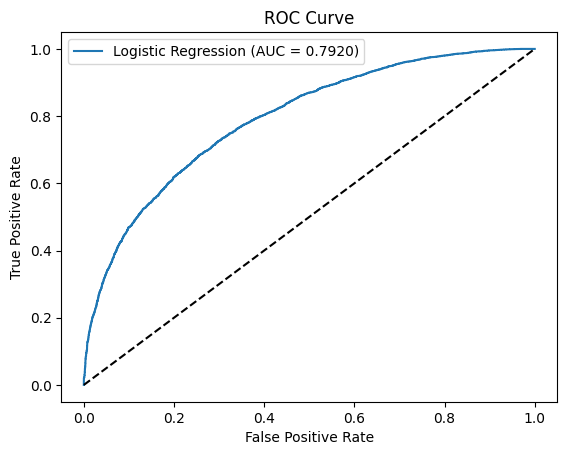

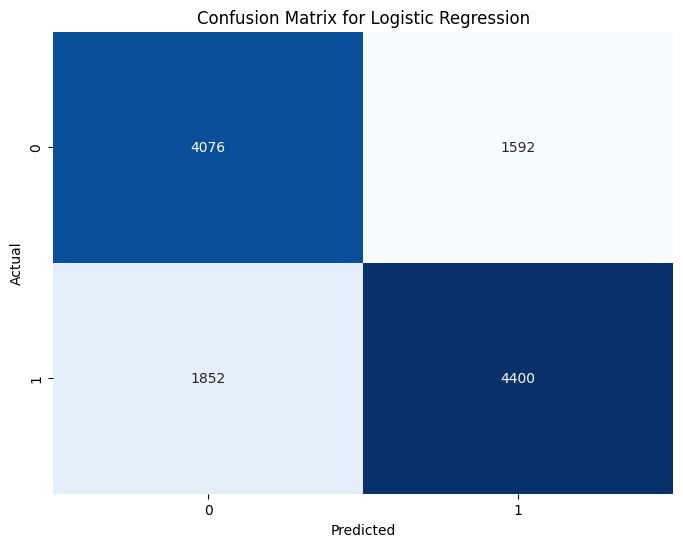

Performance of Random Forest (5-Fold Cross Validation):
ROC-AUC Scores: [0.83693334 0.82962092 0.82746741 0.82718488 0.87097734]
Average ROC-AUC: 0.8384 ± 0.0166

Performance of Random Forest:
Accuracy: 0.7392
Precision: 0.7546
Recall: 0.7450
F1-score: 0.7498
ROC-AUC: 0.8277
Confusion Matrix:
[[4153 1515]
 [1594 4658]]



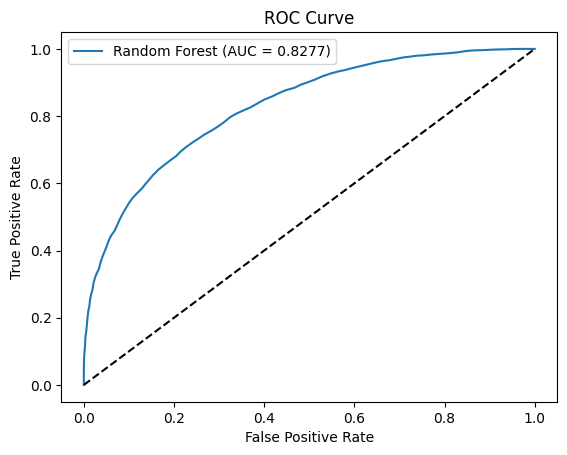

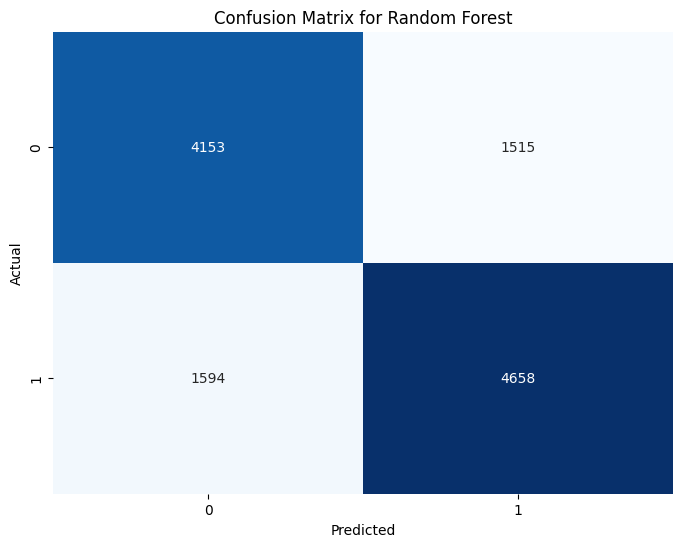

Performance of Gradient Boosting (5-Fold Cross Validation):
ROC-AUC Scores: [0.85450842 0.84371304 0.84422128 0.84418442 0.85390927]
Average ROC-AUC: 0.8481 ± 0.0050

Performance of Gradient Boosting:
Accuracy: 0.7570
Precision: 0.7727
Recall: 0.7602
F1-score: 0.7664
ROC-AUC: 0.8456
Confusion Matrix:
[[4270 1398]
 [1499 4753]]



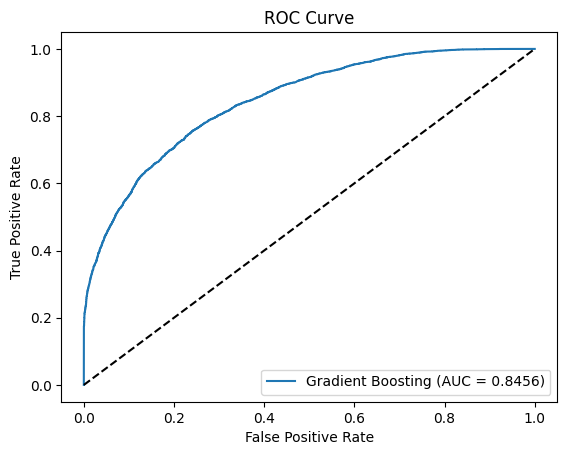

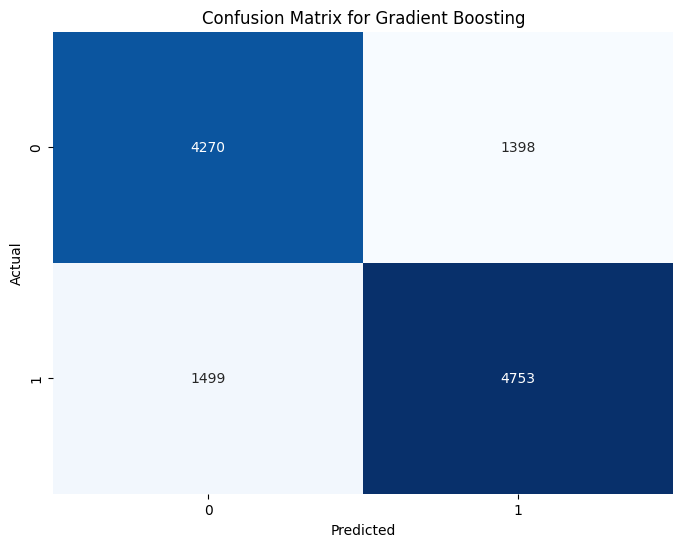

Performance of XGBoost (5-Fold Cross Validation):
ROC-AUC Scores: [0.84216341 0.83569827 0.83532534 0.83537015 0.8430152 ]
Average ROC-AUC: 0.8383 ± 0.0035

Performance of XGBoost:
Accuracy: 0.7494
Precision: 0.7705
Recall: 0.7438
F1-score: 0.7569
ROC-AUC: 0.8366
Confusion Matrix:
[[4283 1385]
 [1602 4650]]



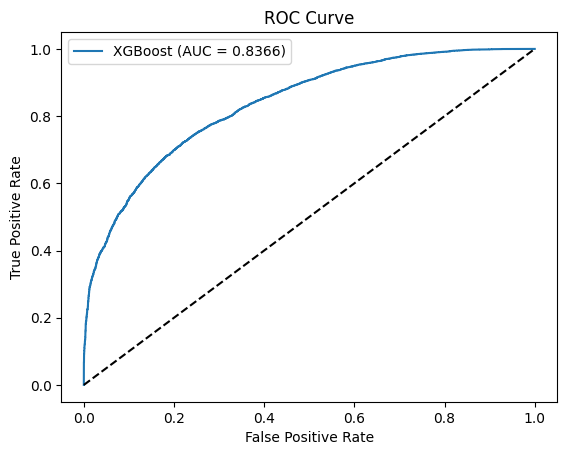

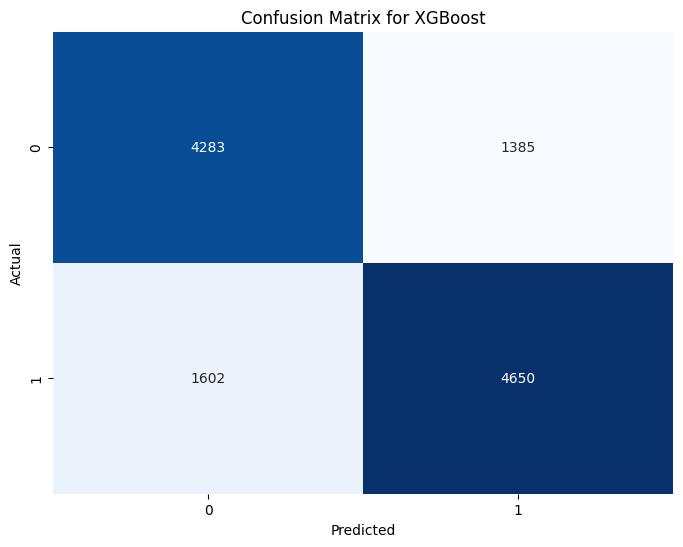

Performance of KNN (5-Fold Cross Validation):
ROC-AUC Scores: [0.7416237  0.73184052 0.72895231 0.7333971  0.77845165]
Average ROC-AUC: 0.7429 ± 0.0183

Performance of KNN:
Accuracy: 0.6635
Precision: 0.6920
Recall: 0.6459
F1-score: 0.6682
ROC-AUC: 0.7187
Confusion Matrix:
[[3871 1797]
 [2214 4038]]



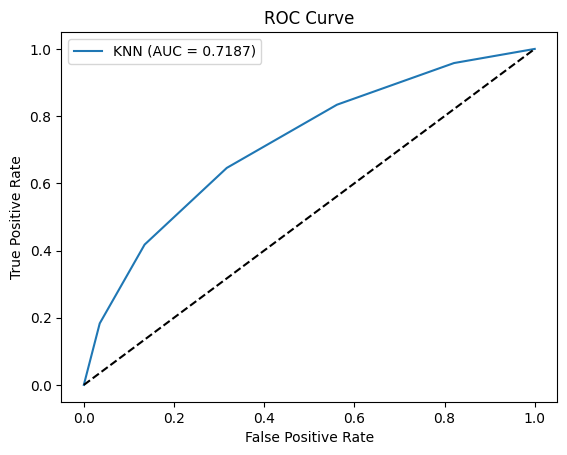

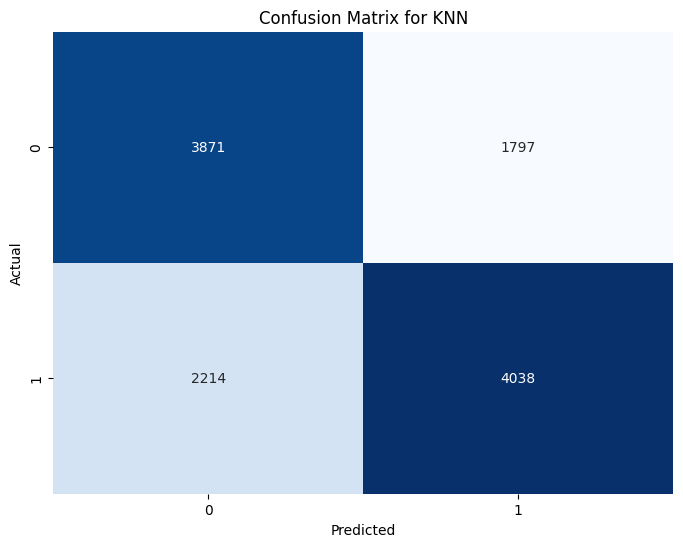

Performance of Decision Tree (5-Fold Cross Validation):
ROC-AUC Scores: [0.66093563 0.66330033 0.66389969 0.65890379 0.70558411]
Average ROC-AUC: 0.6705 ± 0.0176

Performance of Decision Tree:
Accuracy: 0.6673
Precision: 0.6871
Recall: 0.6715
F1-score: 0.6792
ROC-AUC: 0.6671
Confusion Matrix:
[[3756 1912]
 [2054 4198]]



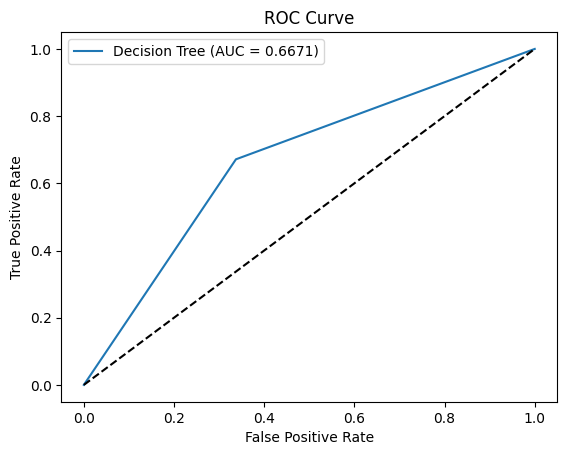

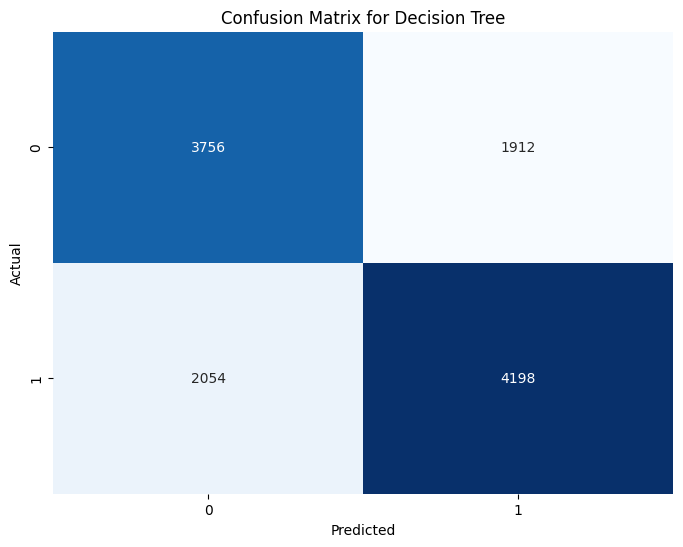

Performance of Bagging (5-Fold Cross Validation):
ROC-AUC Scores: [0.79893834 0.79308449 0.78963697 0.79096908 0.8310515 ]
Average ROC-AUC: 0.8007 ± 0.0155

Performance of Bagging:
Accuracy: 0.7129
Precision: 0.7520
Recall: 0.6753
F1-score: 0.7116
ROC-AUC: 0.7966
Confusion Matrix:
[[4276 1392]
 [2030 4222]]



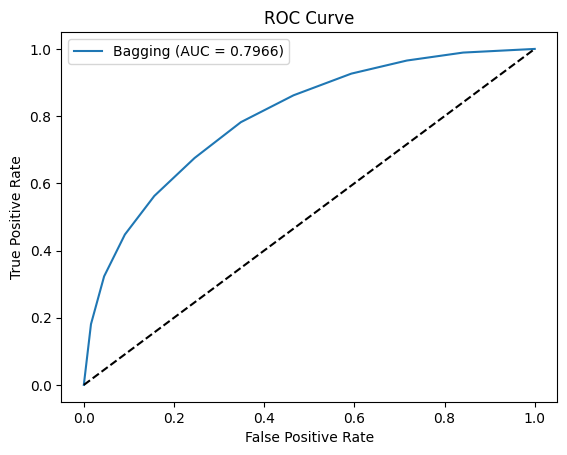

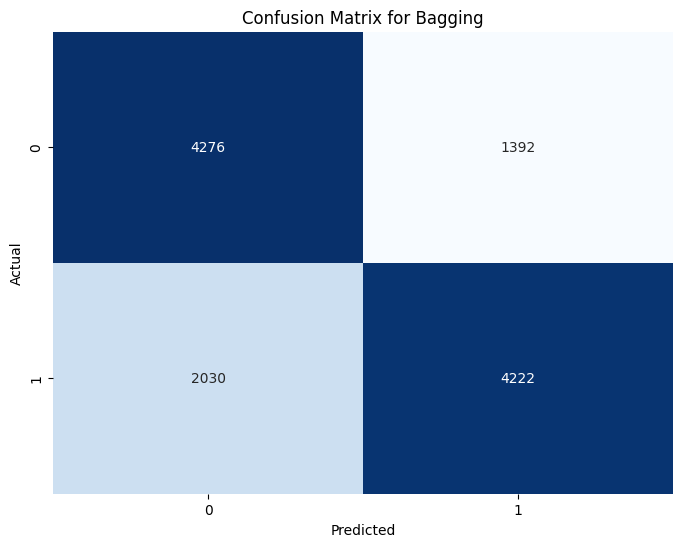

Performance of Extra Trees (5-Fold Cross Validation):
ROC-AUC Scores: [0.83882583 0.83353511 0.83237031 0.83111442 0.88486629]
Average ROC-AUC: 0.8441 ± 0.0205

Performance of Extra Trees:
Accuracy: 0.7377
Precision: 0.7542
Recall: 0.7415
F1-score: 0.7478
ROC-AUC: 0.8249
Confusion Matrix:
[[4157 1511]
 [1616 4636]]



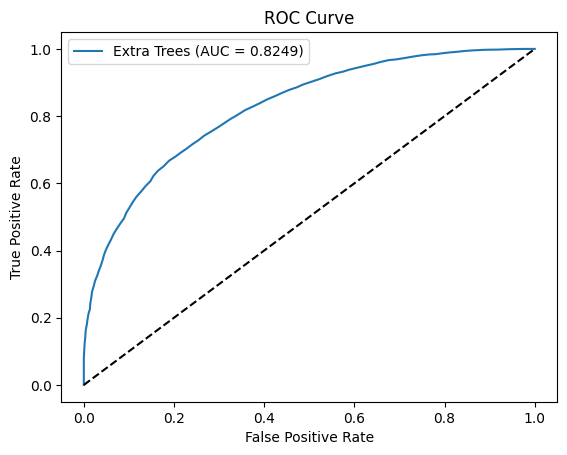

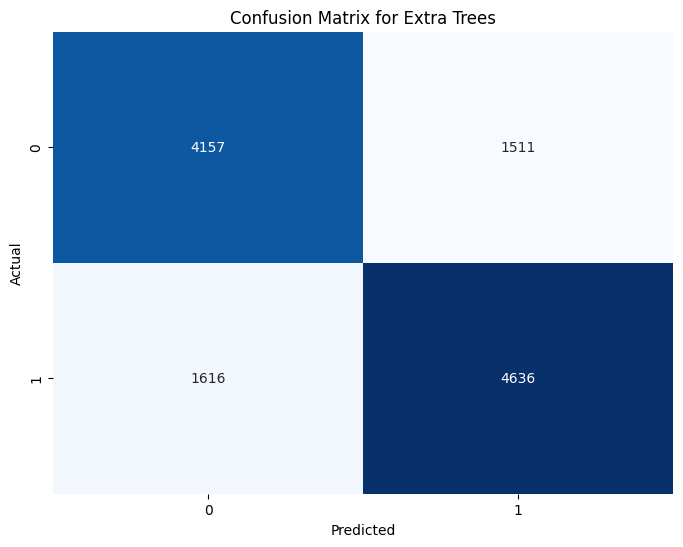

Performance of AdaBoost (5-Fold Cross Validation):
ROC-AUC Scores: [0.8523344  0.84487053 0.84357487 0.84236805 0.85236899]
Average ROC-AUC: 0.8471 ± 0.0044

Performance of AdaBoost:
Accuracy: 0.7549
Precision: 0.7675
Recall: 0.7644
F1-score: 0.7659
ROC-AUC: 0.8454
Confusion Matrix:
[[4220 1448]
 [1473 4779]]



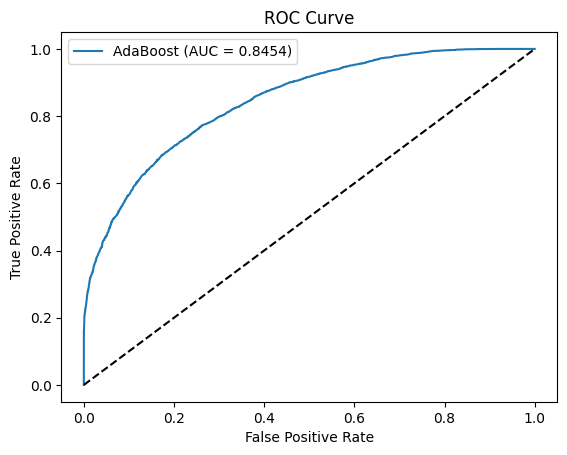

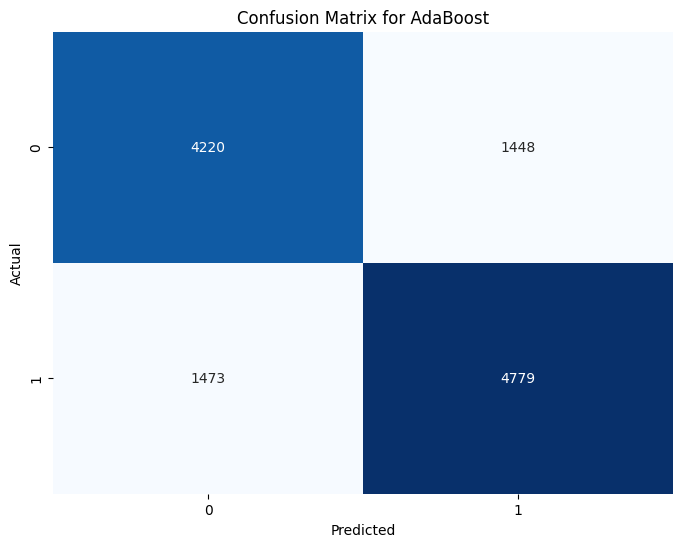

Performance of CatBoost (5-Fold Cross Validation):
ROC-AUC Scores: [0.85510734 0.84587061 0.84666074 0.84592474 0.86111402]
Average ROC-AUC: 0.8509 ± 0.0062

Performance of CatBoost:
Accuracy: 0.7557
Precision: 0.7745
Recall: 0.7537
F1-score: 0.7639
ROC-AUC: 0.8465
Confusion Matrix:
[[4296 1372]
 [1540 4712]]



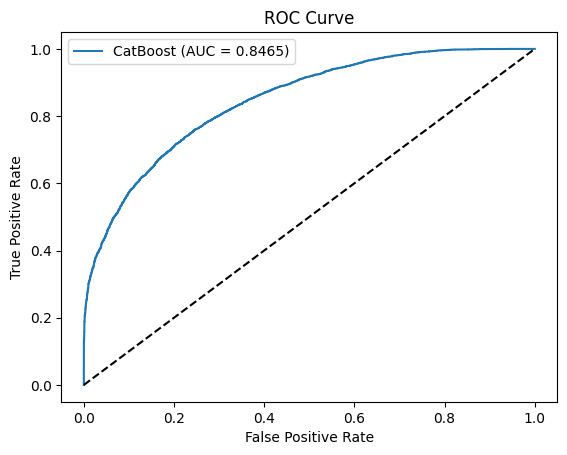

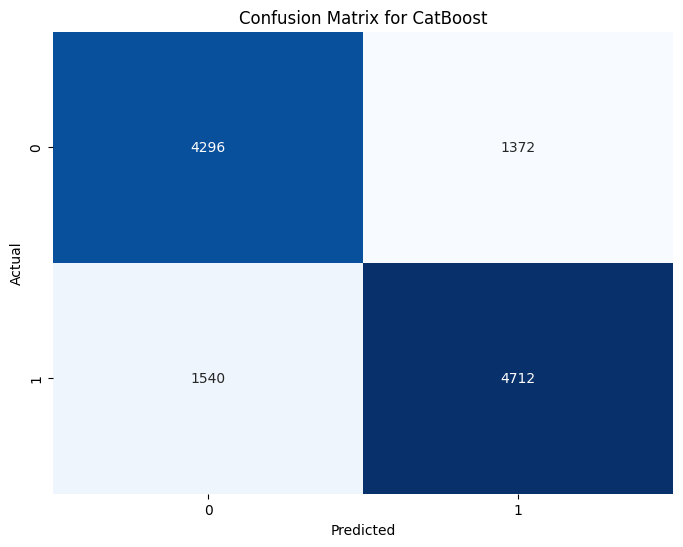

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 20006, number of negative: 20006
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004490 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5295
[LightGBM] [Info] Number of data points in the train set: 40012, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 20006, number of negative: 20007
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5296
[Light

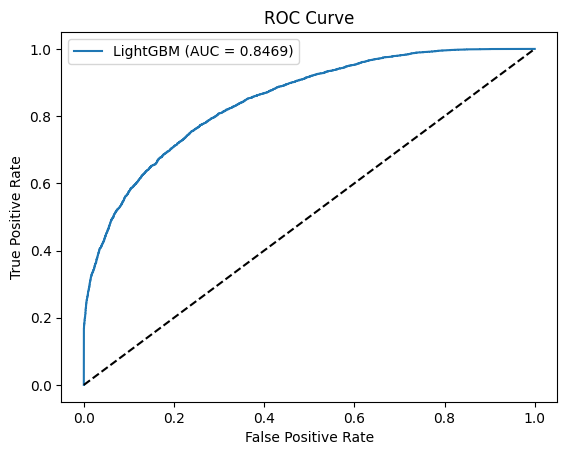

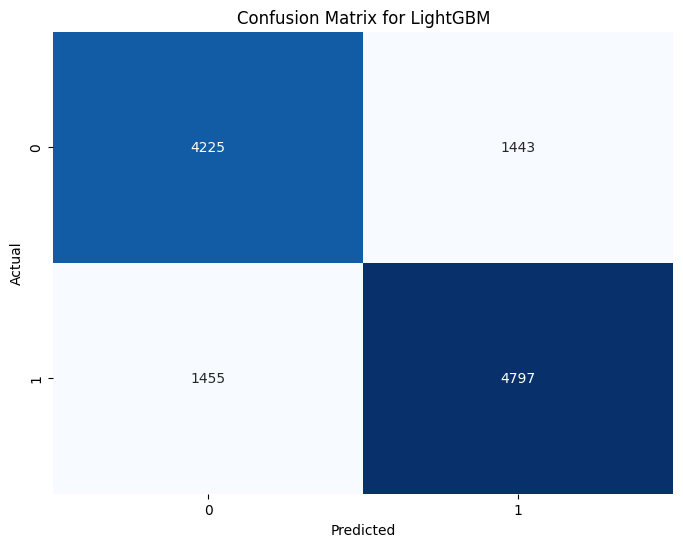

In [ ]:
metrics_after_feature_engineering = pd.DataFrame()

for name, model in models.items():
    results = evaluate_model(model, name, X_train_resampled, y_train_resampled, X_test, y_test)
    metrics_after_feature_engineering = pd.concat([metrics_after_feature_engineering, results], ignore_index=True)


### **Hyperparameter Tuning**

In [ ]:
# Define parameter grids
param_grids = {
    "Logistic Regression": {
        "C": [0.001, 0.01, 0.1, 1, 10],
        "solver": ["liblinear", "lbfgs"]
    },
    "Random Forest": {
        "n_estimators": [100, 200, 300],
        "max_depth": [5, 10, 15],
        "min_samples_split": [2, 5, 10]
    },
    "Gradient Boosting": {
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7]
    },
    "XGBoost": {
        "n_estimators": [100, 300, 500],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7]
    },
    "KNN": {
        "n_neighbors": [3, 5, 7],
        "weights": ["uniform", "distance"]
    },
    "Decision Tree": {
        "max_depth": [None, 5, 10],
        "min_samples_split": [2, 5, 10]
    },
    "Bagging": {
        "n_estimators": [10, 50, 100]
    },
    "Extra Trees": {
        "n_estimators": [100, 200],
        "max_depth": [None, 10]
    },
    "AdaBoost": {
        "n_estimators": [50, 100],
        "learning_rate": [0.01, 0.1]
    },
    "CatBoost": {
        "iterations": [100, 200],
        "depth": [4, 6]
    },
    "LightGBM": {
        "n_estimators": [100, 200],
        "max_depth": [3, 5]
    }
}

In [ ]:
def tune_model(model, param_grid, X_train, y_train, scoring="recall"):
    random_search = RandomizedSearchCV(
        model,
        param_distributions=param_grid,
        n_iter=10,
        cv=5,
        scoring=scoring,
        n_jobs=-1,
        random_state=42
    )
    random_search.fit(X_train, y_train)
    print(f"Best Params for {model.__class__.__name__}: {random_search.best_params_}\n")
    return random_search.best_estimator_

Tuning Logistic Regression...
Best Params for LogisticRegression: {'solver': 'lbfgs', 'C': 0.01}

Performance of Tuned Logistic Regression (5-Fold Cross Validation):
ROC-AUC Scores: [0.79532277 0.78800901 0.78722156 0.78611283 0.80062728]
Average ROC-AUC: 0.7915 ± 0.0056

Performance of Tuned Logistic Regression:
Accuracy: 0.7114
Precision: 0.7346
Recall: 0.7041
F1-score: 0.7190
ROC-AUC: 0.7913
Confusion Matrix:
[[4078 1590]
 [1850 4402]]



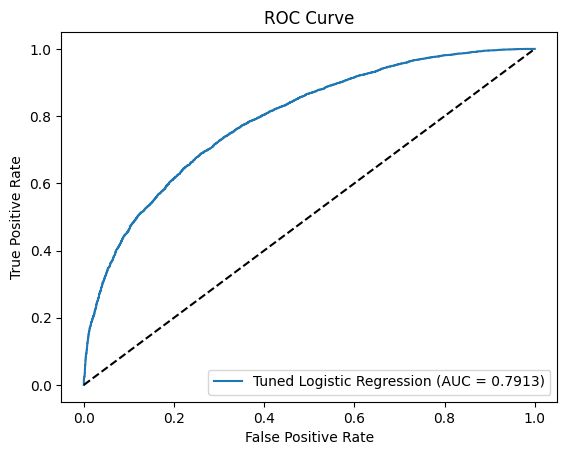

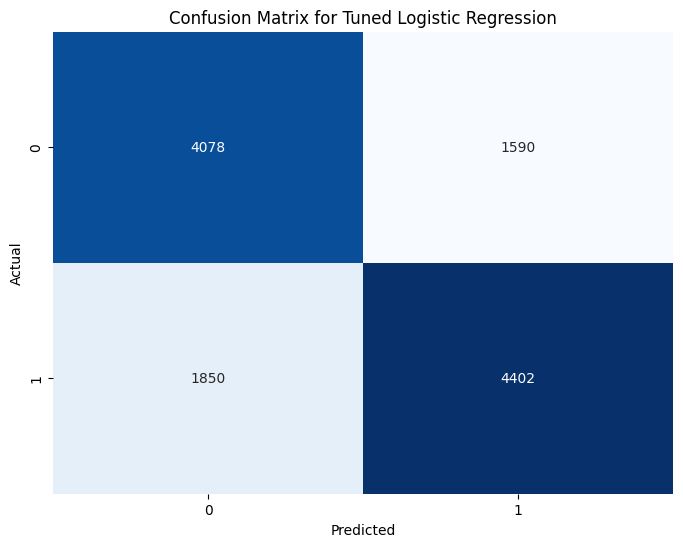

Tuning Random Forest...
Best Params for RandomForestClassifier: {'n_estimators': 100, 'min_samples_split': 10, 'max_depth': 15}

Performance of Tuned Random Forest (5-Fold Cross Validation):
ROC-AUC Scores: [0.84097481 0.82953761 0.83243827 0.83022932 0.85323039]
Average ROC-AUC: 0.8373 ± 0.0090

Performance of Tuned Random Forest:
Accuracy: 0.7451
Precision: 0.7619
Recall: 0.7478
F1-score: 0.7548
ROC-AUC: 0.8333
Confusion Matrix:
[[4207 1461]
 [1577 4675]]



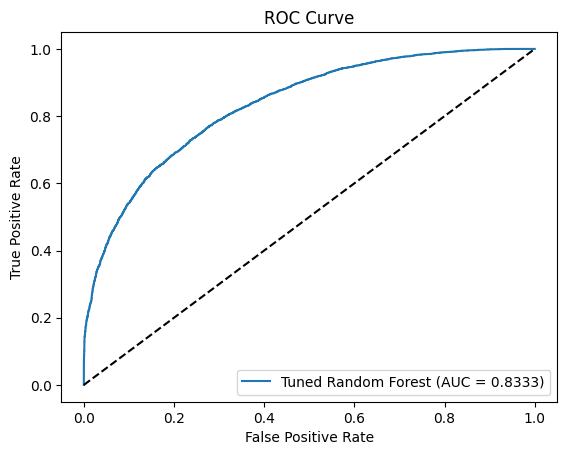

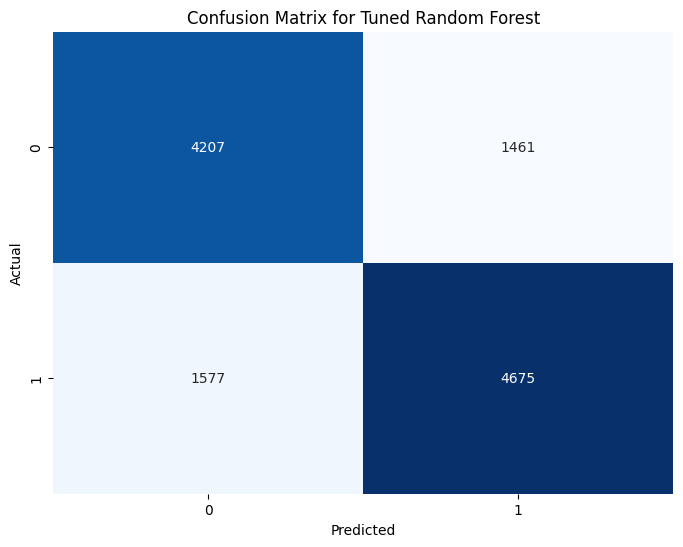

Tuning Gradient Boosting...
Best Params for GradientBoostingClassifier: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}

Performance of Tuned Gradient Boosting (5-Fold Cross Validation):
ROC-AUC Scores: [0.85428703 0.8445871  0.84528872 0.84337986 0.85763855]
Average ROC-AUC: 0.8490 ± 0.0058

Performance of Tuned Gradient Boosting:
Accuracy: 0.7574
Precision: 0.7692
Recall: 0.7678
F1-score: 0.7685
ROC-AUC: 0.8465
Confusion Matrix:
[[4228 1440]
 [1452 4800]]



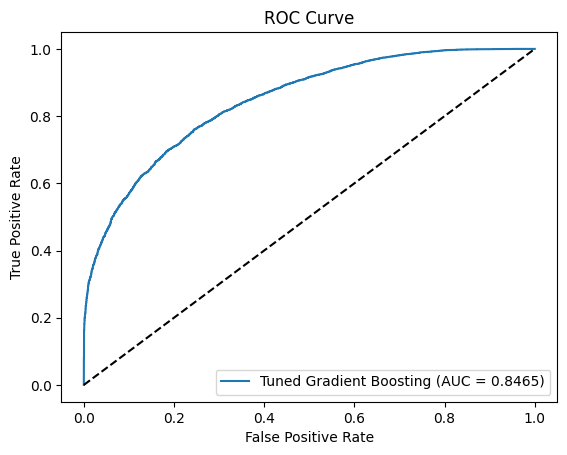

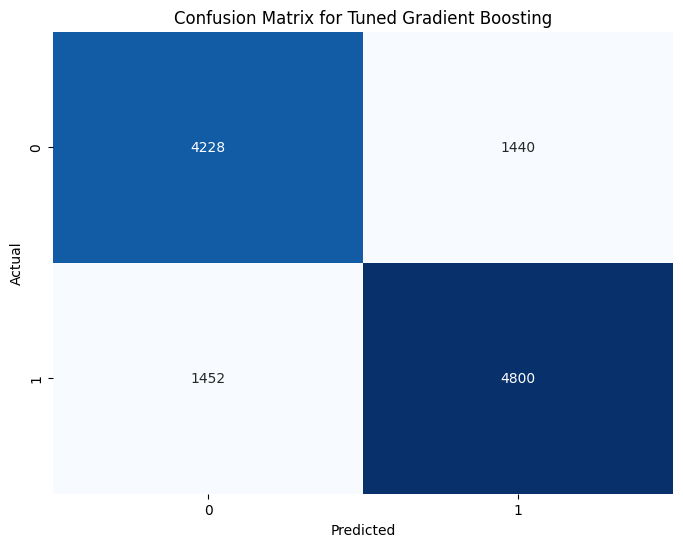

Tuning XGBoost...
Best Params for XGBClassifier: {'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.1}

Performance of Tuned XGBoost (5-Fold Cross Validation):
ROC-AUC Scores: [0.8560726  0.84568872 0.84749036 0.8466823  0.85237095]
Average ROC-AUC: 0.8497 ± 0.0039

Performance of Tuned XGBoost:
Accuracy: 0.7589
Precision: 0.7819
Recall: 0.7494
F1-score: 0.7653
ROC-AUC: 0.8477
Confusion Matrix:
[[4361 1307]
 [1567 4685]]



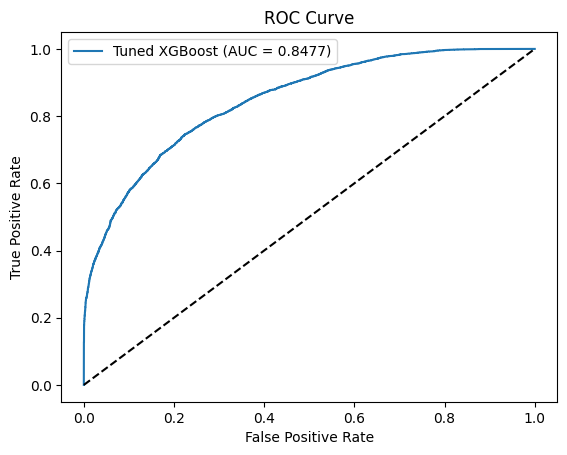

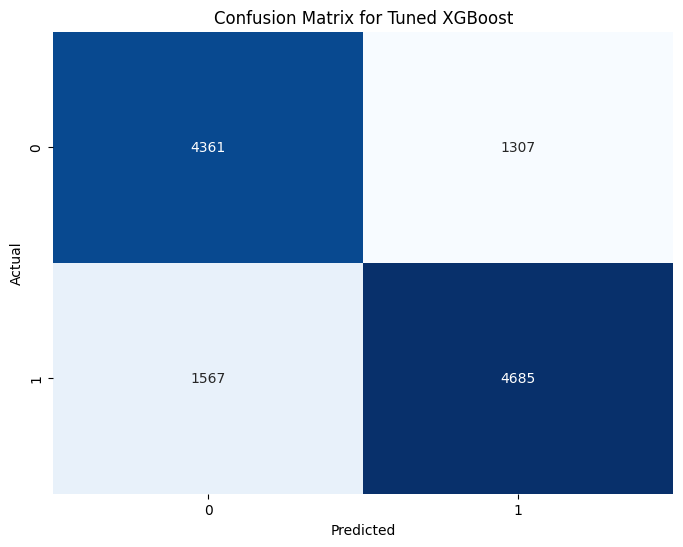

Tuning KNN...
Best Params for KNeighborsClassifier: {'weights': 'distance', 'n_neighbors': 5}

Performance of Tuned KNN (5-Fold Cross Validation):
ROC-AUC Scores: [0.75513541 0.74538743 0.74279942 0.74644215 0.818723  ]
Average ROC-AUC: 0.7617 ± 0.0288

Performance of Tuned KNN:
Accuracy: 0.6633
Precision: 0.6919
Recall: 0.6456
F1-score: 0.6679
ROC-AUC: 0.7204
Confusion Matrix:
[[3871 1797]
 [2216 4036]]



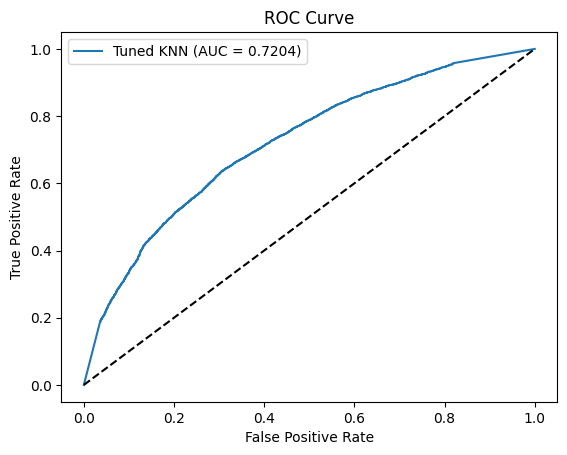

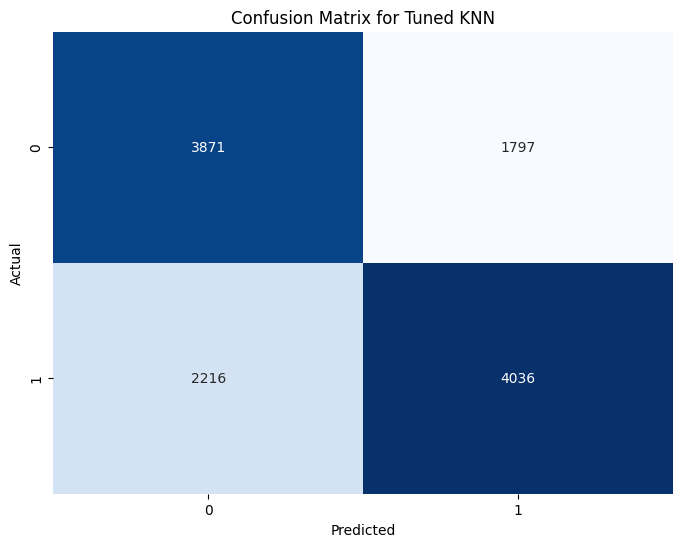

Tuning Decision Tree...
Best Params for DecisionTreeClassifier: {'min_samples_split': 2, 'max_depth': 5}

Performance of Tuned Decision Tree (5-Fold Cross Validation):
ROC-AUC Scores: [0.78848668 0.7763285  0.78191757 0.77717773 0.78621435]
Average ROC-AUC: 0.7820 ± 0.0048

Performance of Tuned Decision Tree:
Accuracy: 0.7125
Precision: 0.7117
Recall: 0.7594
F1-score: 0.7348
ROC-AUC: 0.7836
Confusion Matrix:
[[3745 1923]
 [1504 4748]]



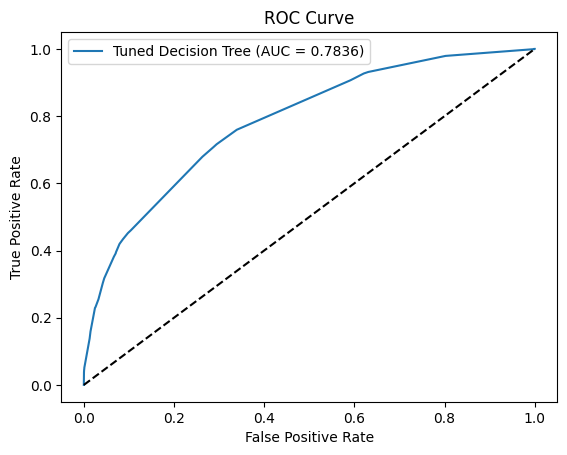

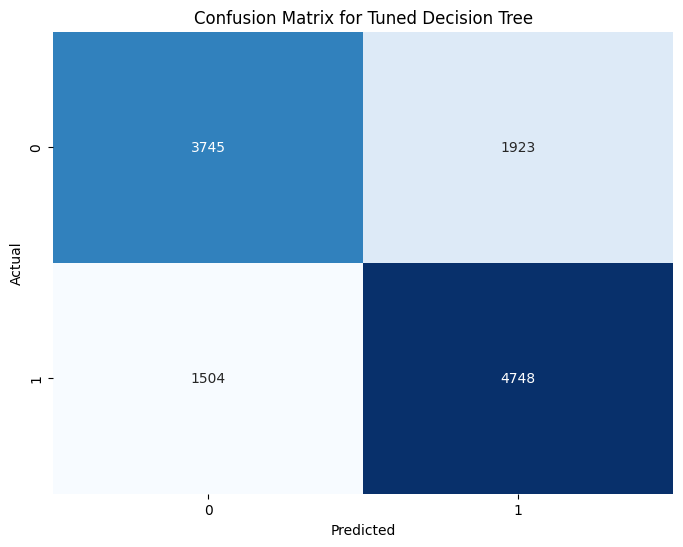

Tuning Bagging...
Best Params for BaggingClassifier: {'n_estimators': 100}

Performance of Tuned Bagging (5-Fold Cross Validation):
ROC-AUC Scores: [0.82860318 0.81847833 0.82003683 0.81936761 0.86341138]
Average ROC-AUC: 0.8300 ± 0.0171

Performance of Tuned Bagging:
Accuracy: 0.7362
Precision: 0.7569
Recall: 0.7322
F1-score: 0.7444
ROC-AUC: 0.8206
Confusion Matrix:
[[4198 1470]
 [1674 4578]]



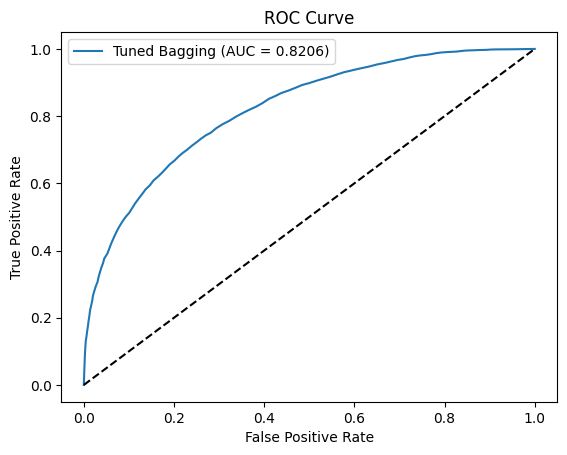

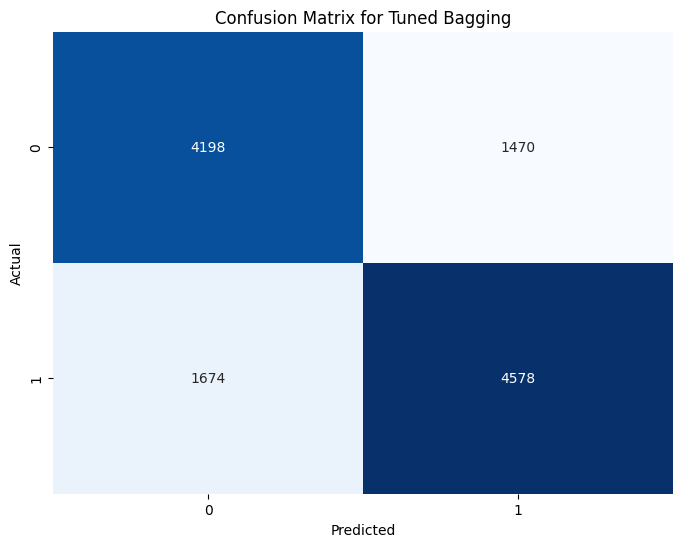

Tuning Extra Trees...
Best Params for ExtraTreesClassifier: {'n_estimators': 200, 'max_depth': None}

Performance of Tuned Extra Trees (5-Fold Cross Validation):
ROC-AUC Scores: [0.84324917 0.83464423 0.83603839 0.83419751 0.88753913]
Average ROC-AUC: 0.8471 ± 0.0205

Performance of Tuned Extra Trees:
Accuracy: 0.7362
Precision: 0.7498
Recall: 0.7462
F1-score: 0.7480
ROC-AUC: 0.8265
Confusion Matrix:
[[4111 1557]
 [1587 4665]]



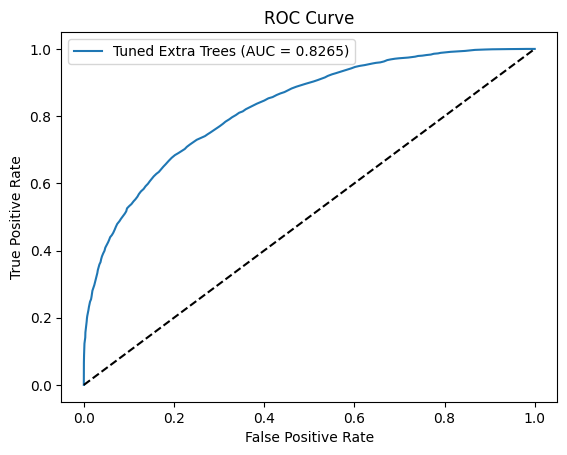

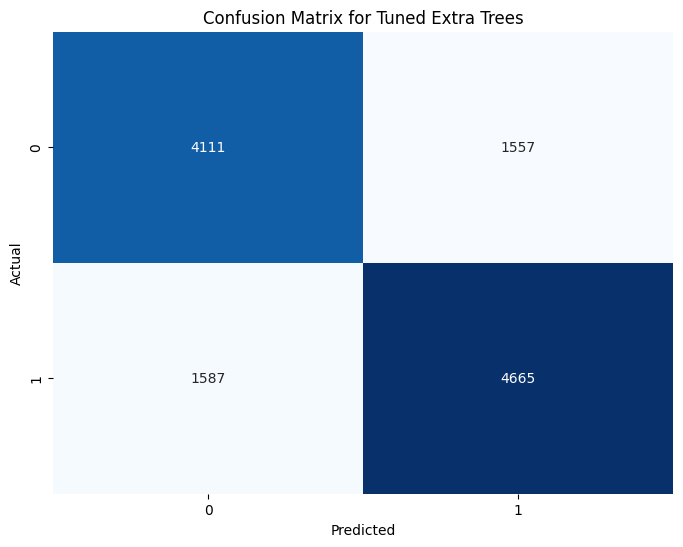

Tuning AdaBoost...
Best Params for AdaBoostClassifier: {'n_estimators': 100, 'learning_rate': 0.1}

Performance of Tuned AdaBoost (5-Fold Cross Validation):
ROC-AUC Scores: [0.7935423  0.78530823 0.78628237 0.78046784 0.78683144]
Average ROC-AUC: 0.7865 ± 0.0042

Performance of Tuned AdaBoost:
Accuracy: 0.7050
Precision: 0.7234
Recall: 0.7086
F1-score: 0.7159
ROC-AUC: 0.7889
Confusion Matrix:
[[3974 1694]
 [1822 4430]]



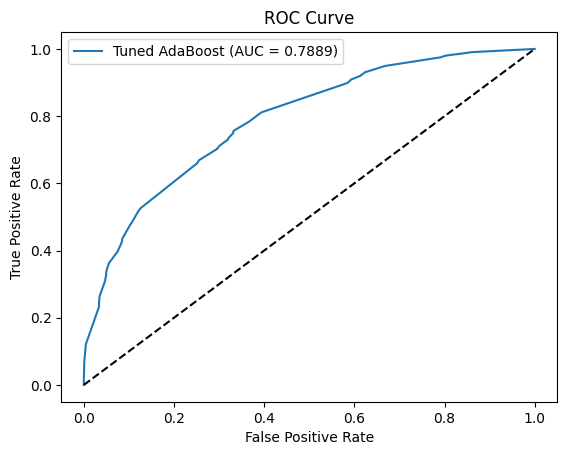

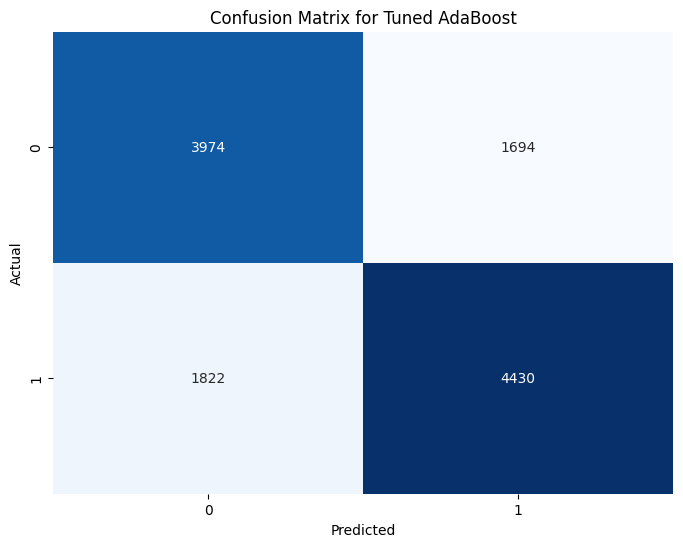

Tuning CatBoost...
Best Params for CatBoostClassifier: {'iterations': 100, 'depth': 4}

Performance of Tuned CatBoost (5-Fold Cross Validation):
ROC-AUC Scores: [0.85621377 0.84638394 0.8470537  0.84687313 0.85838026]
Average ROC-AUC: 0.8510 ± 0.0052

Performance of Tuned CatBoost:
Accuracy: 0.7565
Precision: 0.7771
Recall: 0.7513
F1-score: 0.7640
ROC-AUC: 0.8476
Confusion Matrix:
[[4321 1347]
 [1555 4697]]



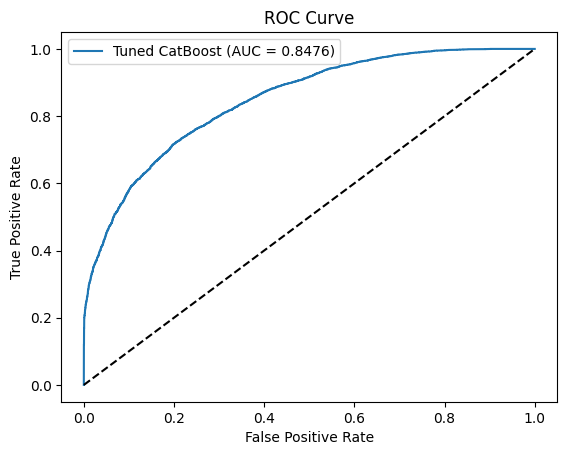

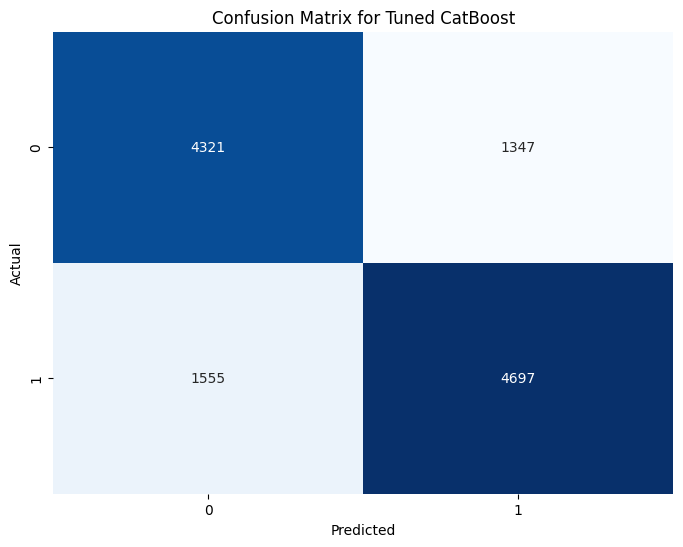

Tuning LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 25008, number of negative: 25008
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5278
[LightGBM] [Info] Number of data points in the train set: 50016, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

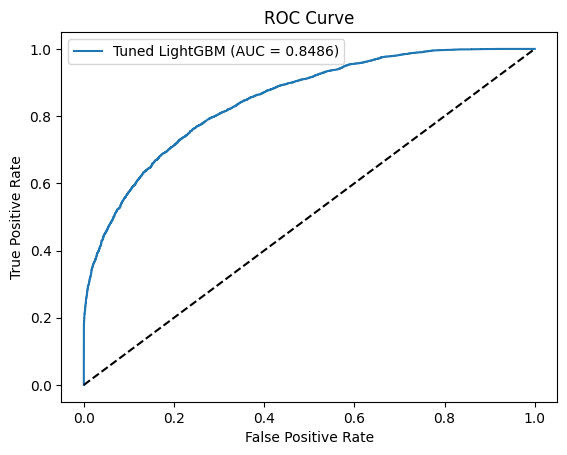

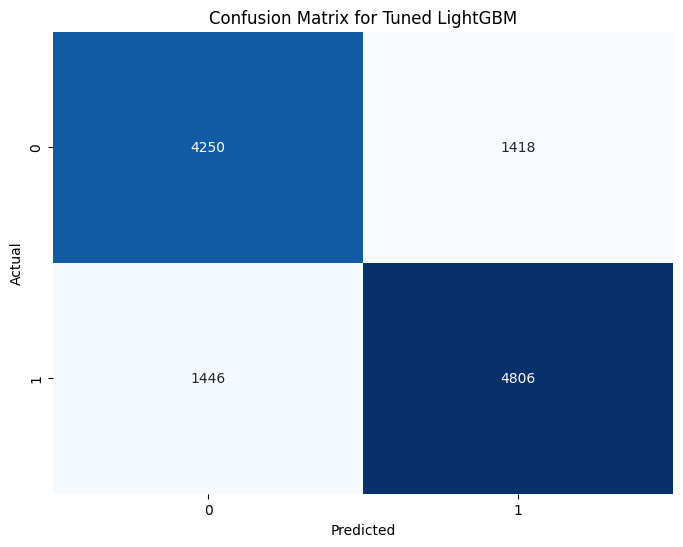

In [ ]:
metrics_after_tuning = pd.DataFrame()
for name, model in models.items():
    print(f"Tuning {name}...")
    best_model = tune_model(model, param_grids[name], X_train_resampled, y_train_resampled)
    results = evaluate_model(best_model, f"Tuned {name}", X_train_resampled, y_train_resampled, X_test, y_test)
    metrics_after_tuning = pd.concat([metrics_after_tuning, results], ignore_index=True)

### **Model Comparison**

In [ ]:
print("\nModel Performance Before any thing:")
display(metrics_before_any_thing)

print("\nModel Performance before feature engineering:")
display(metrics_before_feature_engineering)

print("\nModel Performance After Feature Engineering:")
display(metrics_after_feature_engineering)

print("\nModel Performance After Tuning:")
display(metrics_after_tuning)


Model Performance Before any thing:


Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0   Logistic Regression  0.711913   0.734365  0.706174  0.719993  0.791736
1         Random Forest  0.741023   0.756275  0.746961  0.751589  0.829436
2     Gradient Boosting  0.757215   0.773542  0.759437  0.766425  0.845837
3               XGBoost  0.748826   0.769613  0.743762  0.756467  0.837836
4                   KNN  0.661829   0.690972  0.642674  0.665948  0.718812
5         Decision Tree  0.667114   0.684134  0.678663  0.681388  0.666519
6               Bagging  0.713423   0.753486  0.674184  0.711633  0.792697
7           Extra Trees  0.740268   0.753535  0.750160  0.751844  0.825442
8              AdaBoost  0.754866   0.767427  0.764235  0.765828  0.845456
9              CatBoost  0.758054   0.778347  0.753199  0.765567  0.846873
10             LightGBM  0.754698   0.766240  0.765995  0.766117  0.846497


Model Performance before feature engineering:


Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0   Logistic Regression  0.695302   0.710882  0.706334  0.708601  0.763883
1         Random Forest  0.706124   0.727906  0.702175  0.714809  0.787999
2     Gradient Boosting  0.733305   0.760380  0.717690  0.738418  0.816114
3               XGBoost  0.724748   0.752250  0.708573  0.729759  0.807443
4                   KNN  0.575336   0.599299  0.574376  0.586573  0.601148
5         Decision Tree  0.639597   0.659180  0.647793  0.653437  0.639113
6               Bagging  0.681460   0.722333  0.637876  0.677482  0.759104
7           Extra Trees  0.696477   0.716398  0.697377  0.706760  0.777815
8              AdaBoost  0.731376   0.760684  0.711772  0.735416  0.815582
9              CatBoost  0.730621   0.758897  0.712892  0.735175  0.813122
10             LightGBM  0.731460   0.753447  0.725368  0.739141  0.814421


Model Performance After Feature Engineering:


Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0   Logistic Regression  0.711074   0.734312  0.703775  0.718719  0.791950
1         Random Forest  0.739178   0.754576  0.745042  0.749779  0.827726
2     Gradient Boosting  0.756963   0.772720  0.760237  0.766427  0.845643
3               XGBoost  0.749413   0.770505  0.743762  0.756898  0.836607
4                   KNN  0.663507   0.692031  0.645873  0.668156  0.718670
5         Decision Tree  0.667282   0.687070  0.671465  0.679178  0.667066
6               Bagging  0.712919   0.752048  0.675304  0.711613  0.796563
7           Extra Trees  0.737668   0.754189  0.741523  0.747802  0.824882
8              AdaBoost  0.754950   0.767464  0.764395  0.765927  0.845443
9              CatBoost  0.755705   0.774490  0.753679  0.763943  0.846536
10             LightGBM  0.756879   0.768750  0.767274  0.768012  0.846882


Model Performance After Tuning:


Model  Accuracy  Precision    Recall  F1-Score  \
0   Tuned Logistic Regression  0.711409   0.734646  0.704095  0.719046   
1         Tuned Random Forest  0.745134   0.761897  0.747761  0.754763   
2     Tuned Gradient Boosting  0.757383   0.769231  0.767754  0.768492   
3               Tuned XGBoost  0.758893   0.781876  0.749360  0.765273   
4                   Tuned KNN  0.663339   0.691925  0.645553  0.667935   
5         Tuned Decision Tree  0.712500   0.711737  0.759437  0.734814   
6               Tuned Bagging  0.736242   0.756944  0.732246  0.744390   
7           Tuned Extra Trees  0.736242   0.749759  0.746161  0.747956   
8              Tuned AdaBoost  0.705034   0.723383  0.708573  0.715902   
9              Tuned CatBoost  0.756544   0.777134  0.751280  0.763988   
10             Tuned LightGBM  0.759732   0.772172  0.768714  0.770439   

     ROC-AUC  
0   0.791321  
1   0.833280  
2   0.846541  
3   0.847719  
4   0.720448  
5   0.783606  
6   0.820562  
7   0.826511  
8   0.788885  
9   0.847587  
10  0.848601

In [ ]:
print(best_model)

LGBMClassifier(class_weight='balanced', max_depth=3, n_estimators=200)


In [ ]:
joblib.dump(best_model, 'final_model.pkl')

['final_model.pkl']

## **MLOps, Deployment, and Monitoring**

#### **step 1 : MLOps Implementation**

In [ ]:
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 110.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 700.0/700.0 kB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.4 MB/s eta 0:00:00


In [ ]:
import mlflow
import mlflow.sklearn
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from lightgbm import LGBMClassifier

# Load dataset
df = pd.read_csv("Final_Cleaned_Dataset.csv")

# Remove spaces from column names
df.columns = df.columns.str.replace(' ', '_')

# Convert integer columns to float64 if needed
X = df.drop(columns=['Attrition'])
X = X.astype({col: 'float64' for col in X.select_dtypes(include=['int']).columns})

y = df['Attrition']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set MLflow experiment
mlflow.set_experiment("Employee_Attrition_Analysis")

with mlflow.start_run():
    # Initialize and train the LGBMClassifier model
    model = LGBMClassifier(class_weight='balanced', max_depth=3, n_estimators=200, random_state=42, verbose=-1)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    # Log parameters, metrics, and model in MLflow
    mlflow.log_param("class_weight", "balanced")
    mlflow.log_param("max_depth", 3)
    mlflow.log_param("n_estimators", 200)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)

    # Log the trained model with an example input
    mlflow.sklearn.log_model(model, "lgbm_classifier_model",
                             input_example=X_train.iloc[0].to_dict())

    # Save the model locally using joblib
    joblib.dump(model, 'final_model.pkl')

    # Print logged model accuracy
    print(f"Model logged with accuracy: {accuracy}")


FileNotFoundError: [Errno 2] No such file or directory: 'Final_Cleaned_Dataset.csv'

#### **step 2 : Model Deployment**

In [ ]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd


# Load the trained model
model = joblib.load("final_model.pkl")

app = Flask(__name__)

@app.route('/')
def home():
    return "Welcome to the Employee Attrition Prediction API!"

@app.route('/favicon.ico')
def favicon():
    return '', 204  # Return an empty response with status 204 (No Content)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get JSON data from request
        data = request.get_json()
        df = pd.DataFrame([data])  # Convert JSON to DataFrame

        # Make prediction
        prediction = model.predict(df)
        return jsonify({'attrition_prediction': int(prediction[0])})

    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    app.run(debug=False, use_reloader=False)


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


#### step 3 : Model Monitoring

In [ ]:
import mlflow
from prometheus_client import start_http_server, Gauge, REGISTRY
import time
import numpy as np
from joblib import load
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
import logging
import pandas as pd

# Logging setup
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# Clear old metrics if already exist
for collector in list(REGISTRY._names_to_collectors.values()):
    try:
        REGISTRY.unregister(collector)
    except KeyError:
        pass

# Load the trained model
model_path = 'final_model.pkl'
model = load(model_path)

# Define Prometheus metrics
g_model_accuracy = Gauge('model_accuracy', 'Model accuracy over time')
g_model_precision = Gauge('model_precision', 'Model precision over time')
g_model_recall = Gauge('model_recall', 'Model recall over time')
g_model_f1 = Gauge('model_f1_score', 'Model F1 score over time')
g_attrition_rate = Gauge('predicted_attrition_rate', 'Predicted attrition rate over time')

# Evaluate model performance
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    return accuracy, precision, recall, f1

def monitor_model(X_test, y_true, run_iterations=5, sleep_time=60):
    start_http_server(8000)

    for i in range(run_iterations):
        logging.info(f"Monitoring Iteration: {i + 1}")

        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            y_pred = model.predict(X_test)

        accuracy, precision, recall, f1 = evaluate_model(y_true, y_pred)

        attrition_rate = np.mean(y_pred)  # predicted % of attrition

        logging.info(f"Accuracy: {accuracy} | Precision: {precision} | Recall: {recall} | F1 Score: {f1}")
        logging.info(f"Predicted Attrition Rate: {attrition_rate}")

        # Update Prometheus metrics
        g_model_accuracy.set(accuracy)
        g_model_precision.set(precision)
        g_model_recall.set(recall)
        g_model_f1.set(f1)
        g_attrition_rate.set(attrition_rate)

        # Alerts
        if accuracy < 0.7:
            logging.warning("ALERT: Model accuracy dropped below 70%")

        if attrition_rate > 0.3:
            logging.warning("ALERT: Predicted attrition rate exceeded 30%")

        with mlflow.start_run():
            mlflow.log_metric("accuracy", accuracy)
            mlflow.log_metric("precision", precision)
            mlflow.log_metric("recall", recall)
            mlflow.log_metric("f1_score", f1)
            mlflow.log_metric("predicted_attrition_rate", attrition_rate)

        time.sleep(sleep_time)

if __name__ == "__main__":
    data = pd.read_csv("Final_cleaned_Dataset.csv")

    X_test = data.drop(columns=["Attrition"])
    y_true = data["Attrition"]

    X_test = X_test.values
    y_true = y_true.values

    monitor_model(X_test, y_true, run_iterations=5, sleep_time=60)


ModuleNotFoundError: No module named 'mlflow'

#### Step 4 : Model Retraining Strategy

In [ ]:
import pandas as pd
import numpy as np
from joblib import dump, load
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import mlflow
import logging

logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

def train_model(X_train, y_train):
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    return accuracy, precision, recall, f1

if __name__ == "__main__":

    data = pd.read_csv("Final_cleaned_Dataset.csv")

    X = data.drop(columns=["Attrition"])
    y = data["Attrition"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    old_model = load("final_model.pkl")
    old_acc, old_prec, old_rec, old_f1 = evaluate_model(old_model, X_test, y_test)

    new_model = train_model(X_train, y_train)
    new_acc, new_prec, new_rec, new_f1 = evaluate_model(new_model, X_test, y_test)

    logging.info(f"Old Model -> Acc: {old_acc} | Prec: {old_prec} | Rec: {old_rec} | F1: {old_f1}")
    logging.info(f"New Model -> Acc: {new_acc} | Prec: {new_prec} | Rec: {new_rec} | F1: {new_f1}")

    if new_f1 > old_f1:
        dump(new_model, "final_model.pkl")
        logging.info("New model deployed successfully!")
    else:
        logging.info("Old model retained (new model not better).")

    with mlflow.start_run():
        mlflow.log_metric("old_accuracy", old_acc)
        mlflow.log_metric("new_accuracy", new_acc)
        mlflow.log_metric("old_f1", old_f1)
        mlflow.log_metric("new_f1", new_f1)
